<a href="https://colab.research.google.com/github/sanjana-2302/sanjana-2302.github.io/blob/main/projects/CreditRiskAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start of Project 1**


### **1.2: Defining the problem:**

Predicting whether a loan applicant will be able to repay the loan based on their demographic, employment, and financial information at the time of loan application?

**Why it is problem interesting or important?**

I am particularly interested in the intersection of finance and data science, having gained some relevant experience at a fintech startup.
As my first data science project, I see credit risk modeling as a meaningful starting point which includes a high-impact application where machine learning helps banks and fintech firms minimize loan losses and ensure responsible lending.
This project will also give me the opportunity to apply the full data science workflow, from data cleaning and feature engineering to predictive modeling and interpretability in a way that closely reflects industry practice.

**Approach:**

This problem statement will be formulated as a supervised classification problem, with the goal of predicting the binary outcome (TARGET) indicating whether an applicant will default or not. Model performance will be evaluated using metrics such as ROC-AUC, precision, recall, and F1-score.

### **1.3: Describing the Population:**

*   The population of interest for this project consists of individuals who have applied for consumer loans through Home Credit during a specific period covered by the dataset (approximately 2018).
* Each row in the dataset represents a unique loan application, including detailed demographic information (age, gender, marital status), employment characteristics (occupation type, length of employment), financial attributes (income, loan amount, annuity), and other relevant factors related to creditworthiness.


### **1.4: Defining the Variables**

**4.1 Independant Variables for this problem statement**
*   AMT_INCOME_TOTAL --> Annual Income
*   AMT_CREDIT --> Total Loan Amount
*   DAYS_EMPLOYED --> Length of Employment
*   DAYS_BIRTH --> Age
*   NAME_FAMILY_STATUS --> Marital Status
*   NAME_HOUSING_TYPE --> Housing Status

**4.2 Dependant variables for this problem statement**
*   TARGET --> Loan Default Categorization {1 = default, 0 = repaid}

**4.3 Confounding Variables**

**4.3.1 Definition :**
This is an External factor(or variable) that may affect the relationship between the independent and the dependent variables. It can create a false/ misleading association between them, leading to biased or incorrect conclusions.

**4.3.2 Pontential Confounding variables in this problem statement (Using the column-names from the dataset)**

*   OCCUPATION_TYPE : Applicant’s occupation type which impacts income (IV) and default probability (DV)
*   REGION_POPULATION_RELATIVE : Region of residence which is linked to both economic conditions and repayment ability

**4.3.3 How to deal with the confounding variables in this problem statement?**


**1] Include them in the model as predictors:**

*   By explicitly including confounders like "OCCUPATION_TYPE" or "REGION_POPULATION_RELATIVE" in the feature set, we can allow the model to account for their influence directly, reducing bias in the relationship between your main independent variables (Annual Income) and the dependent variable (Loan Default).

**2] Use feature importance and SHAP analysis to check their impact:**

*   Feature importance methods and interpretability tools such as SHAP (SHapley Additive exPlanations) will let us measure how much each feature contributes to the model’s predictions.
*   If a confounder is disproportionately influencing predictions, SHAP values will highlight this. Upon analysing this we can decide whether to
Keep it (if it makes sense for prediction) or Transform it (e.g: group rare occupation types) or test the model with and without it to see how much bias it introduces.

**3] Control for external conditions (if feasible):**

*   The dataset may not capture all relevant external factors. For instance, while the data includes a client's region (REGION_POPULATION_RELATIVE), it lacks specific local economic data like unemployment rates or cost of living, which are likely better predictors of financial stress.
*   To address this, we could merge external economic data from sources like the World Bank or government statistics. This would improve the model by accounting for the broader economic environment, reducing potential bias from using location alone.


### **1.5: Hypothesis**

Applicants with higher and more stable income, along with longer employment histories, will have a significantly lower probability of default.

### **1.6: Plan for data collection:**



*   For this project, I will be using the publicly available dataset from the Home Credit Default Risk competition on Kaggle. Specifically, I will focus on the primary files application_train.csv and application_test.csv, which contain borrower-level information such as demographics, employment history, income, and loan details, along with the target variable indicating default status in the training set. As this dataset is publicly available and commonly used for research, it offers an ethical and suitable foundation for developing credit risk prediction models.

*   To ensure representativeness, I will use the full training dataset rather than restricting to a smaller subsample, as it contains a large and diverse pool of loan applicants (approximately 300,000 data rows). Within the analysis pipeline, I will apply stratified sampling for splitting into training, validation, and test subsets so that the class balance (default vs. non-default) is preserved. Additionally, I will examine subgroup distributions (e.g: by income, region, or occupation type) to check for over or under representation. Additionally, if needed, I also plan on using reweighting or resampling techniques to address class imbalance.

*   Since the dataset has already been compiled by the lender and made publicly available, my data collection process will involve retrieving the files from Kaggle and then focusing on cleaning, preprocessing, and preparing them for analysis. Each transformation step will be carried out in a reproducible manner and clearly documented to ensure transparency and clarity.



### **1.7: Dataset Selection**

**1] Why this dataset is interesting to me?**

Predicting loan defaults is directly relevant to how banks and fintech firms manage risk. The dataset is particularly interesting because it includes a rich set of features, such as income (AMT_INCOME_TOTAL), credit amount (AMT_CREDIT), employment details (DAYS_EMPLOYED, OCCUPATION_TYPE), and demographic attributes (CODE_GENDER, REGION_POPULATION_RELATIVE), which allow for a nuanced analysis of applicant risk and behavior.

**2] What is in the dataset?**

* The dataset contains detailed information on loan applicants from Home Credit Group. It includes borrower-level data such as demographic details (e.g: age, occupation), financial history (e.g: income, credit amount), and loan-specific information.
* The key component for this project is the target variable in the training set, which indicates whether an applicant defaulted on their loan.
*    The dataset contains approximately 300,000 unique loan applications.
* The primary files for analysis are application_train.csv and application_test.csv

**3] Where is the dataset from?**

The dataset was created and made publicly available by Home Credit Group through a Kaggle competition. It can be accessed through the following link:
[Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/data)

**4] When is the dataset from?**

The dataset was released in 2018 for a Kaggle competition and contains historical loan application data collected by Home Credit Group, reflecting their lending operations in previous years.

In [ ]:
#To import the dataset to colab

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/CreditRisk/application_train.csv')
test = pd.read_csv('/content/drive/MyDrive/CreditRisk/application_test.csv')

print(train.shape, test.shape)

Mounted at /content/drive
(307511, 122) (48744, 121)


In [ ]:
#To print the first five rows from the dataset
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
#To list all the columns along with their datatype
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
#Concise summary for the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#Summary statistics for numeric columns
train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

#**Start of Project 2**

### **2.2: Preliminary Information**

In [ ]:
# Shape of the dataset
train.shape

(307511, 122)

In [ ]:
# List of all Datatypes for the given dataset
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
# List of the first 20 columns and their respective datatypes (Please change the value within to view the first 'n' rows)
pd.DataFrame(train.dtypes, columns=['Data Type']).head(20)


Data Type
SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
CNT_CHILDREN                   int64
AMT_INCOME_TOTAL             float64
AMT_CREDIT                   float64
AMT_ANNUITY                  float64
AMT_GOODS_PRICE              float64
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
REGION_POPULATION_RELATIVE   float64
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_REGISTRATION            float64

In [ ]:
# Number of columns for each datatype
train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
# List of the columns/variables in the dataset
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# Printing all the variables as a list - covers all 122 columns/variables here
list(train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
# List with the number of unique elements for each column(variable) in the dataset
train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [ ]:
#Another approach with a list consisting of the number of unique vales per column

# Here, we are creating another dataframe that stores the column name & the subsequent count value
unique_counts = pd.DataFrame({'Column Name': train.columns,'Unique Values': [train[col].nunique() for col in train.columns]})
unique_counts.head(10)  # shows first 10 columns


Column Name  Unique Values
0          SK_ID_CURR         307511
1              TARGET              2
2  NAME_CONTRACT_TYPE              2
3         CODE_GENDER              3
4        FLAG_OWN_CAR              2
5     FLAG_OWN_REALTY              2
6        CNT_CHILDREN             15
7    AMT_INCOME_TOTAL           2548
8          AMT_CREDIT           5603
9         AMT_ANNUITY          13672

In [ ]:
# Descriptive statistics for the overall data
train.describe(include = 'all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

### **2.3: Specific Data Needs**



**1. No Merging of datasets required**


  > For this project, I am using only the application_train.csv dataset, which contains all the necessary information about each loan applicant, including demographic, financial, and employment-related variables, along with the target variable **(TARGET)** indicating whether the applicant defaulted on a loan.
  
  > Since all the relevant features are available within this single dataset, no merging of additional datasets is required. My focus will be on exploring, cleaning, and preparing the existing data, handling missing values, encoding categorical variables, and performing feature scaling, to build a robust predictive model.


**2. Data Partitioning**

  > Since the dataset already includes a separate file, **application_test.csv** which is provided specifically for testing, I will use the **application_train.csv**  file for model development and validation.

  > Within this training data (**application_train.csv**), I plan to split the samples into training and validation sets (for example, 80-20) using stratified sampling to maintain the same proportion of default and non-default cases across subsets.

  > This ensures balanced model evaluation while reserving the application_test.csv dataset for final model testing and performance assessment.

### **2.4: Identifing potential Data Issues**

#### **1. Checking for duplicates within the dataset**

In [ ]:
# To check for total number of duplicate rows
duplicates_count = train.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)

# Display the duplicate rows if any
if duplicates_count > 0:
    print(train[train.duplicated()])

Number of duplicate rows: 0


> This indicates that there are no identical rows across all 122 columns in the dataset.

Checking if the unique identifier in the dataset --> (SK_ID_CURR) has no repeated values

In [ ]:
# Check for duplicate IDs
duplicate_ids = train['SK_ID_CURR'].duplicated().sum()
print("Number of duplicate SK_ID_CURR values:", duplicate_ids)

Number of duplicate SK_ID_CURR values: 0


> As the output is 0, it confirms that each applicant ID is unique i.e one record per applicant.

**Hence we can confirm that there's no issue in terms of duplicates**

#### **2. Checking for Null/Empty values for a particular column/variable**

In [ ]:
# Check for missing values across all columns
missing_count = train.isnull().sum()
missing_count = missing_count[missing_count > 0]
print(f"Total columns with missing values: {missing_count.shape[0]}")

Total columns with missing values: 67


In [ ]:
# Calculate number and percentage of missing values organized into a DataFrame
missing_count = train.isnull().sum()
missing_percent = 100 * train.isnull().sum() / len(train)

# Combine into a single DataFrame
missing_summary = pd.DataFrame({'Column Name': missing_count.index,'Missing Values': missing_count.values,'Percentage (%)': missing_percent.values, 'Data Type': train.dtypes.values })

# Filter only columns that have missing data
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Sort by percentage (descending)
missing_summary = missing_summary.sort_values(by='Percentage (%)', ascending=False).reset_index(drop=True)

# Displaying the columns (Can adjust number as needed)
print("Columns with missing data:\n")
missing_summary.head(30)

#missing_summary.tail(30) ---> if we require the last 'n' values


Columns with missing data:



Column Name  Missing Values  Percentage (%) Data Type
0            COMMONAREA_MEDI          214865       69.872297   float64
1            COMMONAREA_MODE          214865       69.872297   float64
2             COMMONAREA_AVG          214865       69.872297   float64
3   NONLIVINGAPARTMENTS_MODE          213514       69.432963   float64
4   NONLIVINGAPARTMENTS_MEDI          213514       69.432963   float64
5    NONLIVINGAPARTMENTS_AVG          213514       69.432963   float64
6         FONDKAPREMONT_MODE          210295       68.386172    object
7       LIVINGAPARTMENTS_AVG          210199       68.354953   float64
8      LIVINGAPARTMENTS_MEDI          210199       68.354953   float64
9      LIVINGAPARTMENTS_MODE          210199       68.354953   float64
10            FLOORSMIN_MEDI          208642       67.848630   float64
11            FLOORSMIN_MODE          208642       67.848630   float64
12             FLOORSMIN_AVG          208642       67.848630   float64
13          YEARS_BUILD_MODE          204488       66.497784   float64
14          YEARS_BUILD_MEDI          204488       66.497784   float64
15           YEARS_BUILD_AVG          204488       66.497784   float64
16               OWN_CAR_AGE          202929       65.990810   float64
17              LANDAREA_AVG          182590       59.376738   float64
18             LANDAREA_MEDI          182590       59.376738   float64
19             LANDAREA_MODE          182590       59.376738   float64
20         BASEMENTAREA_MODE          179943       58.515956   float64
21         BASEMENTAREA_MEDI          179943       58.515956   float64
22          BASEMENTAREA_AVG          179943       58.515956   float64
23              EXT_SOURCE_1          173378       56.381073   float64
24        NONLIVINGAREA_MEDI          169682       55.179164   float64
25         NONLIVINGAREA_AVG          169682       55.179164   float64
26        NONLIVINGAREA_MODE          169682       55.179164   float64
27            ELEVATORS_MEDI          163891       53.295980   float64
28            ELEVATORS_MODE          163891       53.295980   float64
29             ELEVATORS_AVG          163891       53.295980   float64

**Analysis based on the observations above:**

1. Upon examining the dataset, several columns were found to contain missing values, with varying degrees of missingness. Out of the 122 variables, 67 contain at least some missing entries.

2. The variables with the highest proportion of missing data are primarily related to property and housing characteristics — for example, **COMMONAREA_MEDI**, **COMMONAREA_MODE**, **NONLIVINGAPARTMENTS_MODE**, **NONLIVINGAPARTMENTS_MEDI**, among roughly 20 similar columns. Each of these columns is missing values in approximately 55–70% of the records. These features capture details about the applicant’s housing, which are often not applicable for all individuals. For instance, those who possibly rent or live in shared accommodations. As such, this missingness is expected and is likely categorized as “Missing Not At Random (MNAR)”.

3. Other columns like **AMT_ANNUITY**, **CNT_FAM_MEMBERS**, and **DAYS_LAST_PHONE_CHANGE** have very few missing values, almost less than 1% as a whole. These gaps likely occur due to occasional missing or incomplete information provided during the loan application process. This type of missingness is considered “Missing Completely At Random (MCAR)”, as it does not depend on other observed variables

4. In contrast, features such as **OCCUPATION_TYPE** and **EXT_SOURCE_1** often have moderate missingness (~30–50%) that may depend on employment status or documentation availability, which could be categorized as “Missing At Random (MAR)”.



 > *Overall, the missing data in this dataset is understandable, as it reflects differences among applicants and the varying importance of housing and employment details. To address this, columns with a high percentage of missing values (over 50%) will be removed, while those with fewer missing entries will be filled in (imputed) using suitable statistical methods or domain knowledge.*



#### **3. Checking for Type Inconsistencies**

In [ ]:
# Complete List: Try converting numeric columns to numbers and catch any errors
for col in train.select_dtypes(include=['object']).columns:
    print(f"{col}:")
    print(train[col].unique()[:])  # view first few unique values
    print("-" * 40)

NAME_CONTRACT_TYPE:
['Cash loans' 'Revolving loans']
----------------------------------------
CODE_GENDER:
['M' 'F' 'XNA']
----------------------------------------
FLAG_OWN_CAR:
['N' 'Y']
----------------------------------------
FLAG_OWN_REALTY:
['Y' 'N']
----------------------------------------
NAME_TYPE_SUITE:
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
----------------------------------------
NAME_INCOME_TYPE:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
----------------------------------------
NAME_EDUCATION_TYPE:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------
NAME_FAMILY_STATUS:
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
----------------------------------------
NAME_HOUSING_TYPE:
['House / apartment' 'Rented apar

In [ ]:
# Cleaner view: Create a DataFrame to store categorical columns and their unique values
cat_summary = pd.DataFrame({ 'Column Name': train.select_dtypes(include=['object']).columns, 'Unique Values': [train[col].unique().tolist() for col in train.select_dtypes(include=['object']).columns], 'Count of Unique Values': [train[col].nunique() for col in train.select_dtypes(include=['object']).columns]})

# Display the first few rows for readability
cat_summary.head(15)


Column Name  \
0           NAME_CONTRACT_TYPE   
1                  CODE_GENDER   
2                 FLAG_OWN_CAR   
3              FLAG_OWN_REALTY   
4              NAME_TYPE_SUITE   
5             NAME_INCOME_TYPE   
6          NAME_EDUCATION_TYPE   
7           NAME_FAMILY_STATUS   
8            NAME_HOUSING_TYPE   
9              OCCUPATION_TYPE   
10  WEEKDAY_APPR_PROCESS_START   
11           ORGANIZATION_TYPE   
12          FONDKAPREMONT_MODE   
13              HOUSETYPE_MODE   
14          WALLSMATERIAL_MODE   

                                        Unique Values  Count of Unique Values  
0                       [Cash loans, Revolving loans]                       2  
1                                         [M, F, XNA]                       3  
2                                              [N, Y]                       2  
3                                              [Y, N]                       2  
4   [Unaccompanied, Family, Spouse, partner, Child...                       7  
5   [Working, State servant, Commercial associate,...                       8  
6   [Secondary / secondary special, Higher educati...                       5  
7   [Single / not married, Married, Civil marriage...                       6  
8   [House / apartment, Rented apartment, With par...                       6  
9   [Laborers, Core staff, Accountants, Managers, ...                      18  
10  [WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY...                       7  
11  [Business Entity Type 3, School, Government, R...                      58  
12  [reg oper account, nan, org spec account, reg ...                       4  
13  [block of flats, nan, terraced house, specific...                       3  
14  [Stone, brick, Block, nan, Panel, Mixed, Woode...                       7

**Analaysis from the above data**

| Column Name (Variable) | Observed Values(Issue) | My Inference |
| -------- | -------- | -------- |
| "CODE_GENDER" | ['XNA'] | Here, 'XNA' seems like an unknown value |
| "NAME_TYPE_SUITE" | ['Other_A',nan,'Other_B'] | Here, “Other_A/B” can be merged into a single “Other” group for clarity |
| ORGANIZATION_TYPE | ['XNA']  | Here, 'XNA' seems like an unknown value |
| NAME_FAMILY_STATUS | ['Unknown'] | Here, “Unknown” can be treated as missing or a separate category depending on the context |



Upon reviewing the categorical variables, most columns are clean and consistent, with well defined and interpretable categories.

  > However, a few inconsistencies were identified. For example, columns such as **"CODE_GENDER"** and **"ORGANIZATION_TYPE"** contain the placeholder value ‘XNA’, which likely represents missing information and should be recoded as NaN.

  > Similarly, **"NAME_FAMILY_STATUS"** includes ‘Unknown’, which can either be treated as a missing value or kept as a separate category depending on the scenario (modeling needs).

  > In **"NAME_TYPE_SUITE"**, the values ‘Other_A’ and ‘Other_B’ refer to similar cases and can be merged into a single ‘Other’ category for simplicity.

Overall, these small inconsistencies are common in real-world data. Cleaning them will make the dataset more accurate and easier to use for modeling later.

#### **4. Checking for "Misspellings" / "Mistypings"**


Here, I will check the unique values in each categorical column and verify whether any values are repeated due to spelling mistakes or differences in capitalization.

In [ ]:
import pandas as pd

# Looping through all categorical i.e the object-type columns
for col in train.select_dtypes(include='object').columns:
    unique_vals = train[col].dropna().unique()
    # Check for suspicious values (mixed case, spaces, similar text)
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(sorted(unique_vals)[:])  # We can print all or select the slice that is required



Column: NAME_CONTRACT_TYPE
Number of unique values: 2
['Cash loans', 'Revolving loans']

Column: CODE_GENDER
Number of unique values: 3
['F', 'M', 'XNA']

Column: FLAG_OWN_CAR
Number of unique values: 2
['N', 'Y']

Column: FLAG_OWN_REALTY
Number of unique values: 2
['N', 'Y']

Column: NAME_TYPE_SUITE
Number of unique values: 7
['Children', 'Family', 'Group of people', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied']

Column: NAME_INCOME_TYPE
Number of unique values: 8
['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']

Column: NAME_EDUCATION_TYPE
Number of unique values: 5
['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']

Column: NAME_FAMILY_STATUS
Number of unique values: 6
['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Unknown', 'Widow']

Column: NAME_HOUSING_TYPE
Number of unique values: 6
['Co-op apartment', 'House 

**Analysis from the above data**

* All categorical columns use consistent capitalization (mostly title or uppercase).

* There are no duplicate categories caused by spacing /typos / case variations (e.g: “yes” v/s “Yes”).

* Some columns include codes like ‘XNA’ (e.g: CODE_GENDER and ORGANIZATION_TYPE) which mostly represent missing or unknown data not spelling errors.

> *There are no problematic misspellings or typographical errors in the categorical columns.
All categorical values appear to be clean and standardized, except for coded placeholders such as “XNA,” which will be treated as missing values rather than as text inconsistencies.*

####**5. Checking for Outliers**

*   First, I will examine the skewness of the dataset to determine the most appropriate method for outlier detection.
*   I’ll begin by visually inspecting the distribution of key numeric variables using histograms to identify any clear skewness or asymmetry.
*   Then, I’ll calculate the skewness values for all numeric columns to quantitatively assess the degree and direction of skewness across the dataset.

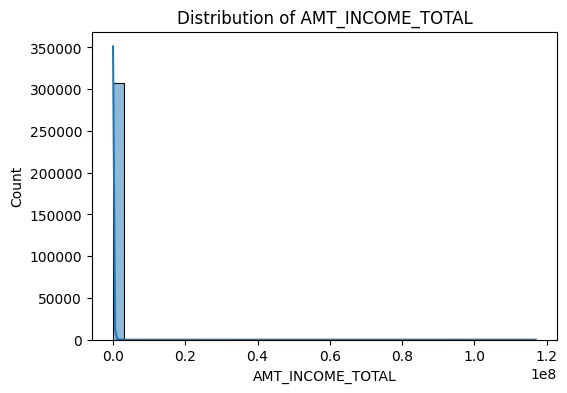

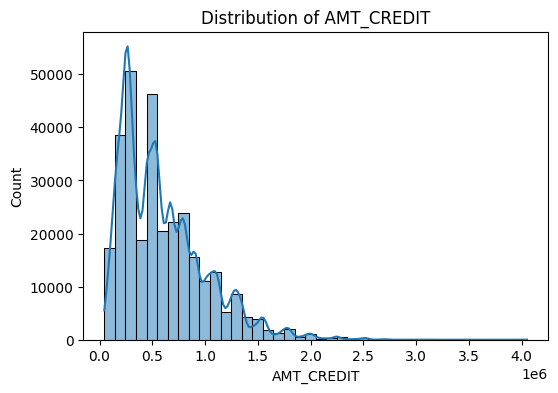

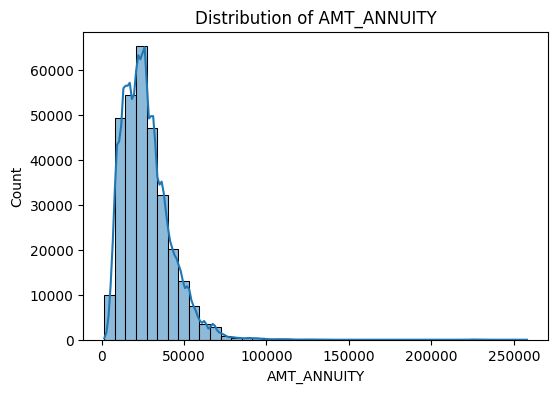

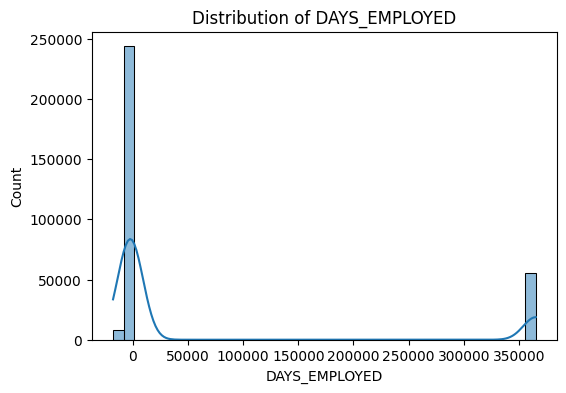

In [ ]:
# Histogram for the key-variables
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Example: plot distribution of key numeric variables
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_EMPLOYED']:
    plt.figure(figsize=(6,4))
    sns.histplot(train[col].dropna(), kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.show()

The histogram plots for key financial variables like AMT_INCOME_TOTAL, AMT_CREDIT, and DAYS_EMPLOYED show a right-skewed distribution. This means that most applicants have lower income or loan amounts, while only a few have very high values.

This kind of pattern is common in financial data, where a small number of people earn or borrow much more than average.

Because the data is not normally distributed, it’s better to use methods like the IQR approach (instead of Z-score) to detect outliers. Later, log transformations can also be used to reduce skewness and make the model perform better.

In [ ]:
import numpy as np

# Select only numeric columns
numeric_cols = train.select_dtypes(include=[np.number])

# Exclude binary or near-binary columns (values only 0 or 1)
continuous_cols = [col for col in numeric_cols.columns if train[col].nunique() > 2]

# Compute skewness for continuous numeric columns
skew_values = train[continuous_cols].skew().sort_values(ascending=False)

# Create a clean DataFrame to display results
skew_df = pd.DataFrame({ 'Column': skew_values.index, 'Skewness': skew_values.values })

# Display the top 10 most skewed columns
print("Skewness for continuous numeric columns:")
display(skew_df.head(10))


Skewness for continuous numeric columns:


Column    Skewness
0            AMT_INCOME_TOTAL  391.559654
1   AMT_REQ_CREDIT_BUREAU_QRT  134.365776
2   AMT_REQ_CREDIT_BUREAU_DAY   27.043505
3    NONLIVINGAPARTMENTS_MODE   16.251819
4    NONLIVINGAPARTMENTS_MEDI   15.671995
5     NONLIVINGAPARTMENTS_AVG   15.541185
6  AMT_REQ_CREDIT_BUREAU_HOUR   14.534062
7    OBS_30_CNT_SOCIAL_CIRCLE   12.139598
8    OBS_60_CNT_SOCIAL_CIRCLE   12.070829
9  AMT_REQ_CREDIT_BUREAU_WEEK    9.293573

The skewness analysis was conducted for continuous numeric variables in the dataset, excluding binary flag indicators. The results show that several features, such as AMT_INCOME_TOTAL, AMT_CREDIT, and DAYS_EMPLOYED, exhibit high positive skewness, indicating that most applicants have lower values with a few individuals having extremely high values.

This pattern is common in financial data, where income, loan amount, and employment duration often have long right tails.

Since the data is non-normally distributed, using the IQR (Interquartile Range) method is preferred over the Z-score for detecting outliers, as it is more robust to skewed distributions.

In [ ]:
# Select only numeric columns for outlier detection
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Temporary list to store outlier information
outlier_data = []

# Loop through each numeric column
for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count how many values fall outside the IQR range
    outliers = ((train[col] < lower_bound) | (train[col] > upper_bound)).sum()
    percent = (outliers / len(train)) * 100

    # Append results to list
    outlier_data.append([col, outliers, round(percent, 2)])

# Create final DataFrame once
outlier_summary = pd.DataFrame(outlier_data, columns=['Column', 'Outlier_Count', 'Outlier_Percentage'])

# Sort by percentage of outliers
outlier_summary = outlier_summary.sort_values(by='Outlier_Percentage', ascending=False).reset_index(drop=True)

# Display summary
print("Outlier summary for numeric columns:\n")
outlier_summary.head(55)

Outlier summary for numeric columns:



Column  Outlier_Count  Outlier_Percentage
0          REGION_RATING_CLIENT          80527               26.19
1   REGION_RATING_CLIENT_W_CITY          78027               25.37
2                 DAYS_EMPLOYED          72217               23.48
3        REG_CITY_NOT_WORK_CITY          70867               23.05
4               FLAG_WORK_PHONE          61308               19.94
5                FLAG_EMP_PHONE          55386               18.01
6       LIVE_CITY_NOT_WORK_CITY          55215               17.96
7     AMT_REQ_CREDIT_BUREAU_QRT          50575               16.45
8     AMT_REQ_CREDIT_BUREAU_MON          43759               14.23
9      DEF_30_CNT_SOCIAL_CIRCLE          35166               11.44
10              FLAG_DOCUMENT_6          27078                8.81
11     DEF_60_CNT_SOCIAL_CIRCLE          25769                8.38
12              FLAG_DOCUMENT_8          25024                8.14
13                       TARGET          24825                8.07
14       REG_CITY_NOT_LIVE_CITY          24039                7.82
15     OBS_30_CNT_SOCIAL_CIRCLE          19971                6.49
16     OBS_60_CNT_SOCIAL_CIRCLE          19564                6.36
17           NONLIVINGAREA_MODE          18817                6.12
18                   FLAG_EMAIL          17442                5.67
19           NONLIVINGAREA_MEDI          17254                5.61
20            NONLIVINGAREA_AVG          16546                5.38
21   REG_REGION_NOT_WORK_REGION          15612                5.08
22      NONLIVINGAPARTMENTS_AVG          15580                5.07
23     NONLIVINGAPARTMENTS_MEDI          15215                4.95
24              AMT_GOODS_PRICE          14728                4.79
25     NONLIVINGAPARTMENTS_MODE          14224                4.63
26             AMT_INCOME_TOTAL          14035                4.56
27              LIVINGAREA_MODE          13105                4.26
28              LIVINGAREA_MEDI          12907                4.20
29  LIVE_REGION_NOT_WORK_REGION          12503                4.07
30               LIVINGAREA_AVG          12517                4.07
31               TOTALAREA_MODE          12091                3.93
32              APARTMENTS_MEDI          10728                3.49
33               APARTMENTS_AVG          10655                3.46
34                ELEVATORS_AVG          10420                3.39
35              APARTMENTS_MODE          10397                3.38
36               ELEVATORS_MEDI          10383                3.38
37               ELEVATORS_MODE           9732                3.16
38   AMT_REQ_CREDIT_BUREAU_WEEK           8536                2.78
39   REGION_POPULATION_RELATIVE           8412                2.74
40              COMMONAREA_MEDI           8004                2.60
41               COMMONAREA_AVG           7942                2.58
42              COMMONAREA_MODE           7938                2.58
43        LIVINGAPARTMENTS_MEDI           7927                2.58
44         LIVINGAPARTMENTS_AVG           7881                2.56
45                  AMT_ANNUITY           7504                2.44
46        LIVINGAPARTMENTS_MODE           7469                2.43
47            BASEMENTAREA_MEDI           7188                2.34
48             BASEMENTAREA_AVG           7190                2.34
49                LANDAREA_MODE           7033                2.29
50            BASEMENTAREA_MODE           6910                2.25
51                 LANDAREA_AVG           6888                2.24
52                LANDAREA_MEDI           6873                2.24
53                   AMT_CREDIT           6562                2.13
54               FLOORSMAX_MEDI           5360                1.74

The IQR analysis shows that many numeric columns have a lot of outliers.
After checking what these columns represent, it seems that some outliers are real (like very high income or credit values), while others are likely errors or placeholders in the data.

The plan is to resolve these issues:
1. Impute or remove invalid values (e.g: DAYS_EMPLOYED = 365243)
2. Cap genuine but extreme values using IQR limits

### **2.5: Reorganization**


For this step, I will start by listing all the column names used in the dataset, and check to see if they are complex to understand

In [ ]:
train.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

Upon analyzing the column names, my opinion is that updating certain names would significantly improve the clarity of the dataset.


Current Name |  Suggested Rename |   Reason to rename
-------------|---------------|------------
"FLAG_OWN_CAR" | "HAS_OWN_CAR"  | Easier to understand as "Flag" means "Has/Owns"
"FLAG_OWN_REALTY" | "HAS_OWN_REALTY" | Easier to understand as "Flag" means "Has/Owns"
"NAME_TYPE_SUITE" | "COMPANION_TYPE"  | Previous column name was unclear; this shows the applicant’s accompanying party

---


 > Additionally, I will be dropping columns with more than 50% missing data, including housing-related variables such as **"COMMONAREA_AVG"**, **"COMMONAREA_MEDI"**, **"COMMONAREA_MODE"**, **"NONLIVINGAPARTMENTS_.."**, **"LIVINGAPARTMENTS_.."**, **"BASEMENTAREA_.."**, **"LANDAREA_.."**, and similar features. Since these columns will be removed, renaming them is unnecessary.

In [ ]:
#Incorporating the naming changes to the DataFrame

# Define a dictionary of current names and new names
rename_dict = {"FLAG_OWN_CAR": "HAS_OWN_CAR", "FLAG_OWN_REALTY": "HAS_OWN_REALTY", "NAME_TYPE_SUITE": "COMPANION_TYPE"}

# Rename columns
train.rename(columns=rename_dict, inplace=True)

# Verify the changes
train[['HAS_OWN_CAR', 'HAS_OWN_REALTY', 'COMPANION_TYPE']].head()


HAS_OWN_CAR HAS_OWN_REALTY COMPANION_TYPE
0           N              Y  Unaccompanied
1           N              N         Family
2           Y              Y  Unaccompanied
3           N              Y  Unaccompanied
4           N              Y  Unaccompanied

### **2.6: Detailed plan for Data Cleaning/Data Pre-processing**

#### **1. Addressing Duplicate rows**


An initial check for duplicate rows in the dataset was  performed, and no duplicates were found.

Conclusion: No further action is required regarding duplicates.

#### **2. Addressing Null or Empty values for a particular column/variable**

Upon examining the dataset, out of the 122 total columns (variables), around 67 have some missing entries.
However, the degree and nature of missingness vary across these columns, some are random, while others result from structural reasons (e.g: property related data would not applicable to all applicants).

Below is a dataframe from an earlier section that displays the columns(variables) along with their corresponding percentages of missing values.

In [ ]:
# This is only to display the top 30 values, the number can be changed as required
missing_summary.head(30)

Column Name  Missing Values  Percentage (%) Data Type
0            COMMONAREA_MEDI          214865       69.872297   float64
1            COMMONAREA_MODE          214865       69.872297   float64
2             COMMONAREA_AVG          214865       69.872297   float64
3   NONLIVINGAPARTMENTS_MODE          213514       69.432963   float64
4   NONLIVINGAPARTMENTS_MEDI          213514       69.432963   float64
5    NONLIVINGAPARTMENTS_AVG          213514       69.432963   float64
6         FONDKAPREMONT_MODE          210295       68.386172    object
7       LIVINGAPARTMENTS_AVG          210199       68.354953   float64
8      LIVINGAPARTMENTS_MEDI          210199       68.354953   float64
9      LIVINGAPARTMENTS_MODE          210199       68.354953   float64
10            FLOORSMIN_MEDI          208642       67.848630   float64
11            FLOORSMIN_MODE          208642       67.848630   float64
12             FLOORSMIN_AVG          208642       67.848630   float64
13          YEARS_BUILD_MODE          204488       66.497784   float64
14          YEARS_BUILD_MEDI          204488       66.497784   float64
15           YEARS_BUILD_AVG          204488       66.497784   float64
16               OWN_CAR_AGE          202929       65.990810   float64
17              LANDAREA_AVG          182590       59.376738   float64
18             LANDAREA_MEDI          182590       59.376738   float64
19             LANDAREA_MODE          182590       59.376738   float64
20         BASEMENTAREA_MODE          179943       58.515956   float64
21         BASEMENTAREA_MEDI          179943       58.515956   float64
22          BASEMENTAREA_AVG          179943       58.515956   float64
23              EXT_SOURCE_1          173378       56.381073   float64
24        NONLIVINGAREA_MEDI          169682       55.179164   float64
25         NONLIVINGAREA_AVG          169682       55.179164   float64
26        NONLIVINGAREA_MODE          169682       55.179164   float64
27            ELEVATORS_MEDI          163891       53.295980   float64
28            ELEVATORS_MODE          163891       53.295980   float64
29             ELEVATORS_AVG          163891       53.295980   float64


**Step 1:**

For columns with **over 50% missing data**, we will drop those.
Columns with a large proportion of missing values,particularly those related to housing and property characteristics (e.g: **COMMONAREA_..**, **LANDAREA_..**, **NONLIVINGAPARTMENTS_..**) will be removed, as they contribute very little analytical value and can introduce some bias into the model.

In [ ]:
#Only keeping columns with at least 50% non-missing values
train = train.dropna(axis=1, thresh=len(train) * 0.5)

#Displaying the final no. of columns after dropping
print(f"Number of columns after dropping: {train.shape[1]}")

Number of columns after dropping: 81


**Step 2:**

For columns with low missingness i.e, **less than 5% of  missing data**, imputation techniques can be applied to fill or correct the missing entries.

Since the proportion of missing data is minimal, simple statistical imputation methods such as using the mean, median, or mode depending on the data type and distribution will be appropriate to preserve data integrity without affecting the overall variability.

I will now display all the cloumns with low missingness along with their respective data-type to help figure out the necessary technique to resolve it

In [ ]:
# Filter only columns with less than 5% missing data
low_missing = missing_summary[(missing_summary['Percentage (%)'] > 0) & (missing_summary['Percentage (%)'] < 5)]

# Sort results by percentage (Descending)
low_missing = low_missing.sort_values(by='Percentage (%)', ascending=False).reset_index(drop=True)

print(f"\nNumber of columns with less than 5% missing data: {len(low_missing)}\n")
display(low_missing)



Number of columns with less than 5% missing data: 10



Column Name  Missing Values  Percentage (%) Data Type
0           NAME_TYPE_SUITE            1292        0.420148    object
1  DEF_30_CNT_SOCIAL_CIRCLE            1021        0.332021   float64
2  DEF_60_CNT_SOCIAL_CIRCLE            1021        0.332021   float64
3  OBS_30_CNT_SOCIAL_CIRCLE            1021        0.332021   float64
4  OBS_60_CNT_SOCIAL_CIRCLE            1021        0.332021   float64
5              EXT_SOURCE_2             660        0.214626   float64
6           AMT_GOODS_PRICE             278        0.090403   float64
7               AMT_ANNUITY              12        0.003902   float64
8           CNT_FAM_MEMBERS               2        0.000650   float64
9    DAYS_LAST_PHONE_CHANGE               1        0.000325   float64

Based on the observations above, we have

*   1 column with Categorical Data ("COMPANION_TYPE")
*   remaining 9 columns that belong to Numerical Data (OBS_.., DEF_.., CNT_FAM_MEMBERSAMT_GOODS_PRICE, AMT_ANNUITY, EXT_SOURCE_2)

**Step 1: Median Imputation for the Numeric Columns**

Numeric columns in our dataset are heavily right-skewed. Using the median to impute missing values is ideal because it is robust to outliers and does not get affected by the long tail, unlike the mean. This ensures the central tendency is maintained without biasing the distribution.

First, I will identify all numeric columns. Then, for each numeric column, missing values (NaN) will be replaced with the column’s median. Finally, I will verify the imputation by printing the number of missing values in each numeric column to ensure all gaps have been filled

In [ ]:
# Numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Impute numeric columns with median (avoiding chained assignment)
for col in numeric_cols:
    median_val = train[col].median()
    train[col] = train[col].fillna(median_val)  # assign back instead of using inplace

# Verify numeric imputation
print("Missing values in numeric columns after median imputation:\n")
print(train[numeric_cols].isnull().sum())

Missing values in numeric columns after median imputation:

SK_ID_CURR                    0
TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 68, dtype: int64


**Step 2: Mode Imputation for Categorical Columns**

For categorical columns, we use mode imputation because it represents the most common category, which is a logical replacement for missing entries. This method helps maintain the natural distribution of categories and is suitable when the proportion of missing values is low.

First, I identify all categorical columns in the dataset. For each categorical column, the code determines the most frequent value (mode) and replaces any missing entries (NaN) with this mode. Finally, I verify the imputation by checking the number of missing values in each categorical column to ensure all gaps have been filled.

In [ ]:
# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Impute categorical columns with mode
for col in categorical_cols:
    mode_val = train[col].mode()[0]  # get the most frequent value
    train[col] = train[col].fillna(mode_val)  # assign back to avoid chained assignment

# Verify categorical imputation
print("Missing values in categorical columns after mode imputation:")
print(train[categorical_cols].isnull().sum())


Missing values in categorical columns after mode imputation:
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
HAS_OWN_CAR                   0
HAS_OWN_REALTY                0
COMPANION_TYPE                0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
dtype: int64


#### **3. Addressing Type Inconsistencies**

Most categorical columns are clean and consistent.
However, a few minor inconsistencies were found, such as   

1. Values like ‘XNA’ in CODE_GENDER and ORGANIZATION_TYPE should be treated as missing (NaN).

2. In NAME_FAMILY_STATUS, the value ‘Unknown’ can either be kept as a separate category or treated as missing, depending on modeling needs.

3. In NAME_TYPE_SUITE (Column has been renamed to "COMPANION_TYPE"), the categories ‘Other_A’ and ‘Other_B’ can be merged into a single ‘Other’ category for simplicity.

**For point-1, replacing 'XNA' with NaN in the relevant categorical columns**

*  Identifing the columns that contain the value 'XNA'
*   Using the replace() function, we convert all 'XNA' values in these columns to NaN, which is pandas's standard way to represent missing data
*   Finally, we verify the change by checking the number of missing values in these columns using isnull().sum()

In [ ]:
# List of columns where 'XNA' should be treated as missing
cols_with_xna = ['CODE_GENDER', 'ORGANIZATION_TYPE']

# Replace 'XNA' with np.nan in these columns
for col in cols_with_xna:
    train[col] = train[col].replace('XNA', np.nan)

# Verify the replacement
train[cols_with_xna].isnull().sum()


CODE_GENDER              4
ORGANIZATION_TYPE    55374
dtype: int64

**Revisting the Missing values Correction**

Following the correction of type inconsistencies, several columns now contain missing values (NaN). To address this, we need to revisit the step of missing values (iterative process).

Specifically for the affected columns: **'CODE_GENDER' and 'ORGANIZATION_TYPE'** which are categorical.

Hence, we will impute their missing entries using the mode (most frequent value), ensuring that the categorical distributions remain consistent and meaningful for subsequent analysis and modeling.

1. We loop through each column in cols_to_impute.
For each column:

2. The mode (most frequent value) is calculated using mode()[0]. All missing entries (NaN) are filled with that mode using fillna().

3. Finally, we print the count of missing values after imputation

In [ ]:
# Categorical columns affected by type correction
cols_to_impute2 = ['CODE_GENDER', 'ORGANIZATION_TYPE']

# Impute missing values with mode for each column
for col in cols_to_impute2:
    mode_val = train[col].mode()[0]  # Get the most frequent value
    train[col] = train[col].fillna(mode_val)  # Fill missing values with mode

# Verify imputation
print("Missing values in corrected categorical columns after mode imputation: \n")
print(train[cols_to_impute2].isnull().sum())

Missing values in corrected categorical columns after mode imputation: 

CODE_GENDER          0
ORGANIZATION_TYPE    0
dtype: int64


**For Point 2, 'Unknown' in 'NAME_FAMILY_STATUS'**

At this stage, we will retain 'Unknown' as a separate and distinct category within the 'NAME_FAMILY_STATUS' column. Since it may carry meaningful information depending on the modeling approach, no changes or recoding will be applied for now, and it will remain as is."

**For Point 3, Merging 'Other_A' and 'Other_B' into 'Other' in 'COMPANION_TYPE'**

*   Identify that cases that represent 'Other_A' and 'Other_B' and can be consolidated
*   Use replace() to merge these two categories into a single 'Other' category
*   Verify by counting the occurrences

In [ ]:
# Merge 'Other_A' and 'Other_B' into 'Other'
train['COMPANION_TYPE'] = train['COMPANION_TYPE'].replace(['Other_A', 'Other_B'], 'Other')

# Verify the change
train['COMPANION_TYPE'].value_counts()

COMPANION_TYPE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other                2636
Group of people       271
Name: count, dtype: int64

#### **4. Addressing "Misspellings" / "Mistypings"**


All categorical columns are clean and consistently formatted, with no issues related to capitalization, spacing, or typographical errors (e.g: “yes” vs. “Yes”).
Placeholder codes such as ‘XNA’ in columns like CODE_GENDER and ORGANIZATION_TYPE represent missing or unknown data rather than true misspellings, and have been handled as missing values.

Conclusion: No further action is required regarding duplicates or text inconsistencies.

#### **5. Addressing Outliers**

The IQR-based analysis reveals that many numeric columns contain a high proportion of outliers. Upon closer inspection:

Some of these outliers are legitimate (e.g., very high income or credit amounts), while others likely result from data entry errors or placeholder values (e.g., DAYS_EMPLOYED = 365243).

To handle these effectively, the following steps will be applied:

1. Identify and correct invalid placeholders (e.g: replace DAYS_EMPLOYED = 365243 with NaN, then impute using median).

2. Cap unrealistic extremes using IQR-based upper and lower limits, but only for variables where outliers are unlikely to represent true variation.

This approach ensures that we minimize noise from invalid data while preserving genuine variation in the dataset.

**For Point 1, to detect placeholder values**

1. Identify all numeric columns and compute the frequency for each unique value.

2. Flag columns where a single value dominates (>50% of rows) or matches common placeholder patterns (e.g: 365243, 11111, etc).

3. Record the top value, its frequency, and unique value count for each flagged column.

In [ ]:
# Select only numeric columns
num_cols = train.select_dtypes(include=[np.number]).columns

# Dictionary to store potential placeholder values
placeholder_summary = {}

for col in num_cols:
    counts = train[col].value_counts(dropna=False)
    top_value = counts.index[0]
    top_freq = counts.iloc[0] / len(train)

    # Flag column if a single value dominates or looks suspicious
    if (top_freq > 0.5 or (top_value in [999999, 365243, -999999, 111111, 777777, 888888, 0])):
        placeholder_summary[col] = {
            'Top_Value': top_value,
            'Frequency_%': round(top_freq * 100, 2),
            'Unique_Values': train[col].nunique()
        }

# Convert to DataFrame for easier viewing
placeholder_df = pd.DataFrame(placeholder_summary).T

# Display top 50 (or all if fewer)
print("\n Potential Placeholder Summary:\n ")
display(placeholder_df.head(20))


 Potential Placeholder Summary:
 


Top_Value  Frequency_%  Unique_Values
TARGET                            0.0000        91.93            2.0
CNT_CHILDREN                      0.0000        70.04           15.0
DAYS_EMPLOYED                365243.0000        18.01        12574.0
FLAG_MOBIL                        1.0000       100.00            2.0
FLAG_EMP_PHONE                    1.0000        81.99            2.0
FLAG_WORK_PHONE                   0.0000        80.06            2.0
FLAG_CONT_MOBILE                  1.0000        99.81            2.0
FLAG_PHONE                        0.0000        71.89            2.0
FLAG_EMAIL                        0.0000        94.33            2.0
CNT_FAM_MEMBERS                   2.0000        51.50           17.0
REGION_RATING_CLIENT              2.0000        73.81            3.0
REGION_RATING_CLIENT_W_CITY       2.0000        74.63            3.0
REG_REGION_NOT_LIVE_REGION        0.0000        98.49            2.0
REG_REGION_NOT_WORK_REGION        0.0000        94.92            2.0
LIVE_REGION_NOT_WORK_REGION       0.0000        95.93            2.0
REG_CITY_NOT_LIVE_CITY            0.0000        92.18            2.0
REG_CITY_NOT_WORK_CITY            0.0000        76.95            2.0
LIVE_CITY_NOT_WORK_CITY           0.0000        82.04            2.0
YEARS_BEGINEXPLUATATION_AVG       0.9816        50.08          285.0
FLOORSMAX_AVG                     0.1667        69.88          403.0

Now, I'm trying to detect statistically abnormal or logically impossible values across key numeric features such as income, age, and loan amounts.
This step will help identify records that contradict real world logic, for instance, negative income, positive age, or zero loan amounts which often result from data entry errors or placeholder coding inconsistencies.

In [ ]:
checks = {
    'Invalid_Income': (train['AMT_INCOME_TOTAL'] <= 0).sum(),
    'Invalid_Birth': ((train['DAYS_BIRTH'] >= 0) | (train['DAYS_BIRTH'] < -36500)).sum(),
    'Invalid_Employment': ((train['DAYS_EMPLOYED'] < -36500) | (train['DAYS_EMPLOYED'] > 0)).sum(),
    'Invalid_Credit': (train['AMT_CREDIT'] <= 0).sum(),
    'Invalid_Annuity': (train['AMT_ANNUITY'] <= 0).sum(),
    'Invalid_Goods_Price': (train['AMT_GOODS_PRICE'] <= 0).sum()
}
pd.DataFrame.from_dict(checks, orient='index', columns=['Count'])


Count
Invalid_Income           0
Invalid_Birth            0
Invalid_Employment   55374
Invalid_Credit           0
Invalid_Annuity          0
Invalid_Goods_Price      0

Upon performing this check, it was identified that the column **"DAYS_EMPLOYED"** contains invalid placeholder values.
The most frequent value in this column is 365243, which accounts for approximately 18% of the records.

The DAYS_EMPLOYED variable represents the number of days since an individual began their current employment. Therefore, all valid entries should be negative values (indicating days in the past) and fall within a realistic range, typically between 0 and -20,000 days (approx. 55 years).

Any values that deviate from this logical range, such as 365243, are considered invalid placeholders and should be treated as missing values (NaN) for subsequent imputation.

for "DAYS_EMPLOYED" Correction, I will perform the below mentioned steps

1. Identify positive DAYS_EMPLOYED values that are logically invalid.
2. Replace the placeholder value 365243 with NaN.
3. Count and confirm how many invalid values were replaced.
4. Impute missing entries using the median of valid values (Iterative step to handle missing values).
5. Verify that no missing values remain after correction.

In [ ]:
# Example: Values that should be negative
invalid_employed = train[train['DAYS_EMPLOYED'] > 0]
print(invalid_employed['DAYS_EMPLOYED'].unique())

[365243]


In [ ]:
# Store the placeholder value
placeholder_value = 365243

# Replace with NaN
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace(placeholder_value, np.nan)

# Check how many were replaced
invalid_count = train['DAYS_EMPLOYED'].isnull().sum()
print(f"Number of invalid placeholder values replaced in DAYS_EMPLOYED: {invalid_count}")

# Impute missing values using the median
median_days_employed = train['DAYS_EMPLOYED'].median()
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].fillna(median_days_employed)

# Verify imputation
print("Missing values in DAYS_EMPLOYED after correction:", train['DAYS_EMPLOYED'].isnull().sum())


Number of invalid placeholder values replaced in DAYS_EMPLOYED: 55374
Missing values in DAYS_EMPLOYED after correction: 0


**Addressing Point 2, to cap unrealistic extremes using IQR**

In this step, I applied IQR-based outlier capping to selected numeric features **("AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "AMT_INCOME_TOTAL",** and **"DAYS_BIRTH")**

The Interquartile Range (IQR) method identifies unusually extreme values beyond 1.5×IQR from the 25th and 75th percentiles.

Such values are capped to the nearest valid boundary, ensuring that genuine data variability is preserved while preventing extreme outliers from skewing model training.

In [ ]:
# Define columns where extreme values are likely to be true outliers
iqr_columns = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL','DAYS_BIRTH']

# Apply IQR-based capping for selected columns
for col in iqr_columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values outside the range
    before_outliers = ((train[col] < lower_limit) | (train[col] > upper_limit)).sum()
    train[col] = np.where(train[col] < lower_limit, lower_limit, train[col])
    train[col] = np.where(train[col] > upper_limit, upper_limit, train[col])
    after_outliers = ((train[col] < lower_limit) | (train[col] > upper_limit)).sum()

    print(f"{col}: {before_outliers} outliers capped. Remaining outliers after capping: {after_outliers}")

AMT_CREDIT: 6562 outliers capped. Remaining outliers after capping: 0
AMT_ANNUITY: 7504 outliers capped. Remaining outliers after capping: 0
AMT_GOODS_PRICE: 14728 outliers capped. Remaining outliers after capping: 0
AMT_INCOME_TOTAL: 14035 outliers capped. Remaining outliers after capping: 0
DAYS_BIRTH: 0 outliers capped. Remaining outliers after capping: 0


### **2.7: Cleaning the Data**

The dataset has been successfully cleaned following the preprocessing steps outlined in Section 2.6 (Data Planning), which details the approach and subsequent process for resolving data issues.

### **2.8: Saving the cleaned data into a new file**

In [ ]:
clean_train_path = '/content/drive/MyDrive/CreditRisk/train_cleaned.csv'

train.to_csv(clean_train_path, index=False)

### **2.9: Importing the cleaned data file**

In [ ]:
train_cleaned = pd.read_csv('/content/drive/MyDrive/CreditRisk/train_cleaned.csv')

print("Train shape:", train_cleaned.shape)

Train shape: (307511, 81)


### **2.10: Display new DataFrame**

Displaying the first 5 data entries from the cleaned data file

In [ ]:
train_cleaned.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER HAS_OWN_CAR  \
0      100002       1         Cash loans           M           N   
1      100003       0         Cash loans           F           N   
2      100004       0    Revolving loans           M           Y   
3      100006       0         Cash loans           F           N   
4      100007       0         Cash loans           M           N   

  HAS_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0              Y             0          202500.0    406597.5      24700.5   
1              N             0          270000.0   1293502.5      35698.5   
2              Y             0           67500.0    135000.0       6750.0   
3              Y             0          135000.0    312682.5      29686.5   
4              Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 81 columns]

Displaying the last 5 data entries from the cleaned data file

In [ ]:
train_cleaned.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER HAS_OWN_CAR  \
307506      456251       0         Cash loans           M           N   
307507      456252       0         Cash loans           F           N   
307508      456253       0         Cash loans           F           N   
307509      456254       1         Cash loans           F           N   
307510      456255       0         Cash loans           F           N   

       HAS_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506              N             0          157500.0    254700.0   
307507              Y             0           72000.0    269550.0   
307508              Y             0          153000.0    677664.0   
307509              Y             0          171000.0    370107.0   
307510              N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        0.0                       0.0   
307507                0                        0.0                       0.0   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         0.0                        0.0   
307507                         0.0                        0.0   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        0.0                         1.0  
307507                        0.0                         1.0  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 81 columns]

# **Start of Project 3**

### **3.2: Initial Thoughts**

**1. Do you think you have the right data? Why or why not?**

*   Yes, the dataset appears to be appropriate for analyzing and predicting credit risk. It contains a comprehensive mix of demographic, financial, and employment-related variables such as income, credit amount, days employed, and education type which are typically strong indicators of creditworthiness.
*   However, its suitability ultimately depends on data quality, completeness, and the clarity of feature meanings.



**2. initial questions before knowing much about the data?**

* What does each variable represent, are there any unconventional values?

* How balanced is the target variable?

* Are there missing values that could affect results?

* Which factors most strongly influence credit risk?

* Are there redundant or correlated features?

### **3.3: Characteristics of the data**

**1. Shape of the data**

In [ ]:
print("Original Train shape:", train.shape)
print("Cleaned Train shape:", train_cleaned.shape)

Original Train shape: (307511, 81)
Cleaned Train shape: (307511, 81)


**2. What does each record/row represent?**

In [ ]:
# Inspect the structure of the dataset
train_cleaned.info()

# Display a few rows to understand what each record looks like
train_cleaned.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   HAS_OWN_CAR                   307511 non-null  object 
 5   HAS_OWN_REALTY                307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  COMPANION_TYPE                307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER HAS_OWN_CAR  \
0      100002       1         Cash loans           M           N   
1      100003       0         Cash loans           F           N   
2      100004       0    Revolving loans           M           Y   

  HAS_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0              Y             0          202500.0    406597.5      24700.5   
1              N             0          270000.0   1293502.5      35698.5   
2              Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 81 columns]

**3. What are the variables and columns within the dataset?**

In [ ]:
# Get data types and counts by type
print("\nColumn type summary:\n")
print(train_cleaned.dtypes.value_counts())

# Optional: display sample of each type
print("\nNumeric columns:\n", train_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist())
print("\nCategorical columns:\n", train_cleaned.select_dtypes(include=['object']).columns.tolist())


Column type summary:

int64      39
float64    29
object     13
Name: count, dtype: int64

Numeric columns:
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 

**4. Are there any duplicates?**

I will perform a check to look for duplicate records within the dataset.

In [ ]:
#Check for duplicate rows
duplicate_count = train_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    display(train_cleaned[train_cleaned.duplicated()].head())
else:
    print("No duplicate records found in the dataset.")

Number of duplicate rows: 0
No duplicate records found in the dataset.


This check shows that there are no duplicate records, confirming that each observation in the dataset represents a unique loan application. Since no duplicates were detected, no additional data cleaning steps are required for this aspect of the dataset.

###**3.4 Additional Mapping and Transformations**

**1. Categorical Data Cleaning**

Most categorical variables were already well-structured and consistent.

However a few inconsistencies were identified and corrected:

* Placeholder values such as **‘XNA’** in **"CODE_GENDER"** and **"ORGANIZATION_TYPE"** were treated as missing values (NaN) and later imputed using mode imputation.

* Merged the categories **'Other_A'** and **'Other_B'** in the **"COMPANION_TYPE"** column into a single category called **'Other'**  for simplicity.

**2. Numeric Data Adjustments**

* An invalid placeholder value (Eg: 365243) in the DAYS_EMPLOYED column, which indicated unrealistic employment length, was replaced with the median value.

* For financial and duration related columns, extreme outliers were capped using the Interquartile Range (IQR) method to reduce their influence on the model.

**3. Data Consistency and Standardization**

* Performed a comprehensive cleanup to ensure data uniformity. This involved standardizing all column names to a consistent style, correcting data types, and harmonizing values within categorical columns

**4. Future Condsiderations (Logarithmic transformations & Feature Engineering)**

* Log transformations can be applied later to highly skewed variables (like income or credit amounts) to make the data more balanced.

* Feature engineering (such as creating ratios or new derived features) may be explored in the modeling phase to improve prediction accuracy.

###**3.5 Exploring the variables in the dataset**

**1. Complete list of Variables/Columns (Including the data-types)**

In [ ]:
#Complete Overview
train_cleaned.info()

print("\n")

# Basic summary statistics
train_cleaned.describe(include='all').T.head(20)  #first 20 variables for readability

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   HAS_OWN_CAR                   307511 non-null  object 
 5   HAS_OWN_REALTY                307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  COMPANION_TYPE                307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

count unique                            top  \
SK_ID_CURR                  307511.0    NaN                            NaN   
TARGET                      307511.0    NaN                            NaN   
NAME_CONTRACT_TYPE            307511      2                     Cash loans   
CODE_GENDER                   307511      2                              F   
HAS_OWN_CAR                   307511      2                              N   
HAS_OWN_REALTY                307511      2                              Y   
CNT_CHILDREN                307511.0    NaN                            NaN   
AMT_INCOME_TOTAL            307511.0    NaN                            NaN   
AMT_CREDIT                  307511.0    NaN                            NaN   
AMT_ANNUITY                 307511.0    NaN                            NaN   
AMT_GOODS_PRICE             307511.0    NaN                            NaN   
COMPANION_TYPE                307511      6                  Unaccompanied   
NAME_INCOME_TYPE              307511      8                        Working   
NAME_EDUCATION_TYPE           307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS            307511      6                        Married   
NAME_HOUSING_TYPE             307511      6              House / apartment   
REGION_POPULATION_RELATIVE  307511.0    NaN                            NaN   
DAYS_BIRTH                  307511.0    NaN                            NaN   
DAYS_EMPLOYED               307511.0    NaN                            NaN   
DAYS_REGISTRATION           307511.0    NaN                            NaN   

                              freq           mean            std       min  \
SK_ID_CURR                     NaN  278180.518577  102790.175348  100002.0   
TARGET                         NaN       0.080729       0.272419       0.0   
NAME_CONTRACT_TYPE          278232            NaN            NaN       NaN   
CODE_GENDER                 202452            NaN            NaN       NaN   
HAS_OWN_CAR                 202924            NaN            NaN       NaN   
HAS_OWN_REALTY              213312            NaN            NaN       NaN   
CNT_CHILDREN                   NaN       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL               NaN  162626.947877   73303.150927   25650.0   
AMT_CREDIT                     NaN  592313.037054  380316.240537   45000.0   
AMT_ANNUITY                    NaN    26797.65715   13281.285661    1615.5   
AMT_GOODS_PRICE                NaN  527855.325029  337010.362814   40500.0   
COMPANION_TYPE              249818            NaN            NaN       NaN   
NAME_INCOME_TYPE            158774            NaN            NaN       NaN   
NAME_EDUCATION_TYPE         218391            NaN            NaN       NaN   
NAME_FAMILY_STATUS          196432            NaN            NaN       NaN   
NAME_HOUSING_TYPE           272868            NaN            NaN       NaN   
REGION_POPULATION_RELATIVE     NaN       0.020868       0.013831   0.00029   
DAYS_BIRTH                     NaN  -16036.995067    4363.988632  -25229.0   
DAYS_EMPLOYED                  NaN   -2251.606131    2136.193492  -17912.0   
DAYS_REGISTRATION              NaN   -4986.120328    3522.886321  -24672.0   

                                 25%       50%       75%        max  
SK_ID_CURR                  189145.5  278202.0  367142.5   456255.0  
TARGET                           0.0       0.0       0.0        1.0  
NAME_CONTRACT_TYPE               NaN       NaN       NaN        NaN  
CODE_GENDER                      NaN       NaN       NaN        NaN  
HAS_OWN_CAR                      NaN       NaN       NaN        NaN  
HAS_OWN_REALTY                   NaN       NaN       NaN        NaN  
CNT_CHILDREN                     0.0       0.0       1.0       19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0   337500.0  
AMT_CREDIT                  270000.0  513531.0  808650.0  1616625.0  
AMT_ANNUITY                  16524.0   24903.0   3459


---

---

Although the cleaned dataset contains 81 variables, the scope of this project is narrowed to 10 core features which are selected for their direct relevance and strong potential to influence the target variable, **"TARGET"**.

| No. | Variable                | Type    | Why It’s Important                                                                                                     |
| --- | ----------------------- | ------- | ---------------------------------------------------------------------------------------------------------------------- |
| 1   | **TARGET**              | int64   | The dependent variable , indicates whether the client defaulted (1) or not (0).                                        |
| 2   | **AMT_INCOME_TOTAL**    | float64 | Applicant’s total income, a key determinant of repayment ability.                                                       |
| 3   | **AMT_CREDIT**          | float64 | Total credit amount,larger loans may carry greater default risk.                                                     |
| 4   | **AMT_ANNUITY**         | float64 | Monthly installment,represents applicant’s debt burden.                                                              |
| 5   | **DAYS_BIRTH**          | float64 | Applicant’s age (in negative days), can be converted to positive years; age often correlates with financial behavior. |
| 6   | **DAYS_EMPLOYED**       | float64 | Employment duration, longer employment usually means higher stability.                                                |
| 7   | **NAME_EDUCATION_TYPE** | object  | Education level, affects earning potential and financial literacy.                                                    |
| 8   | **NAME_INCOME_TYPE**    | object  | Type of income (Working, Pensioner, etc.),indicates stability of income source.                                      |
| 9  | **CNT_CHILDREN**        | int64   | Number of dependents, impacts disposable income and risk.                                                             |
| 10  | **HAS_OWN_REALTY**      | object  | Indicates property ownership, associated with financial security.                                                     |


I’ll now explore each of the selected variables in detail to better understand their behavior, identify trends, and assess how they may impact the target variable.

---

---

####**Variable 1: "TARGET"**

**1. Datatype of the Variable**

The "TARGET" column is of integer (int64) datatype as checked below.

In [ ]:
train_cleaned['TARGET'].dtype

dtype('int64')

**2. Unit of the variable, how is it determined?**

"TARGET" is not measured in physical units, its a categorical (binary) variable that encodes credit behavior as 0 or 1.
The meaning is derived from dataset documentation.

**3. What does the variable represent?**

This variable represents a binary classification ('0' or '1'), typically:

'0': Client has repaid the loan

'1': Client defaulted on the loan

**4. Any transformations/manipulations needed to better analyze the variable?**

No transformation is needed since it’s already binary ('0'/'1').

However, I will encode it as category type to optimize memory.

In [ ]:
train_cleaned['TARGET'] = train_cleaned['TARGET'].astype('category')

The **"TARGET"** behaves as expected, its a binary indicator variable defining the default status of each applicant.

**5. Any missing data or extreme outliers?**

In [ ]:
train_cleaned['TARGET'].unique()

[1, 0]
Categories (2, int64): [0, 1]

There are be no missing values, every record must have a defined target (0 or 1).

Since it’s binary, there are no outliers as well.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
train_cleaned['TARGET'].describe()

count     307511
unique         2
top            0
freq      282686
Name: TARGET, dtype: int64

**7. Distribution of the values of the variable**

/tmp/ipython-input-3060171892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=train_cleaned, palette='viridis')


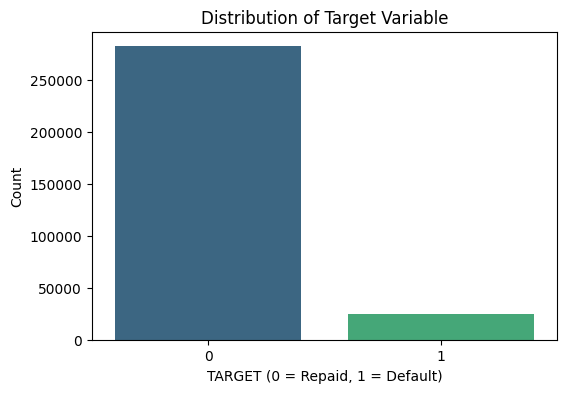

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=train_cleaned, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('TARGET (0 = Repaid, 1 = Default)')
plt.ylabel('Count')
plt.show()

**8. Frequency of the variable**

In [ ]:
train_cleaned['TARGET'].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

The dataset is imbalanced, with more non-defaulters ('0') than defaulters ('1').

#### **Variable 2: "AMT_INCOME_TOTAL"**

**1. Datatype of the Variable**

The "AMT_INCOME_TOTAL" column is of float (float64) datatype as checked below.

In [ ]:
train_cleaned['AMT_INCOME_TOTAL'].dtype

dtype('float64')

**2. Unit of the variable, how is it determined?**

The values in this variable are in **Russian Rubles (RUB)**.

This is confirmed by the dataset's documentation and is consistent with the value amounts, which typically range from zero to over a million.

**3. What does the variable represent?**

"AMT_INCOME_TOTAL" represents the applicant’s total annual income at the time of the loan application.

It includes all income sources (salary, business, etc), and is one of the strongest predictors of creditworthiness.

**4. Any transformations/manipulations needed to better analyze the variable?**

<Axes: >

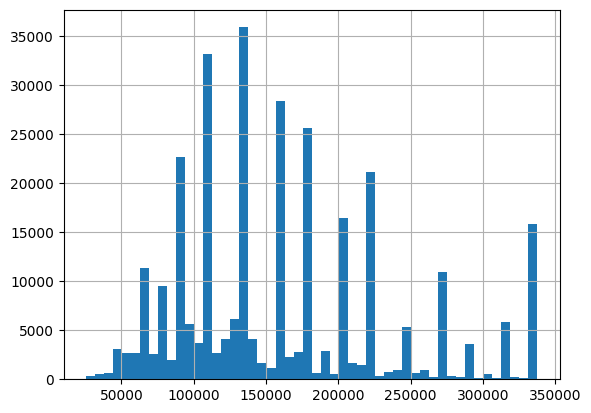

In [ ]:
# Checking the distribution
train_cleaned['AMT_INCOME_TOTAL'].describe()
train_cleaned['AMT_INCOME_TOTAL'].hist(bins=50)

* The histogram shows a slightly right-skewed distribution, with most incomes between 100,000–200,000.

* The skewness is not severe, so no log transformation is needed at this stage.

**5. Any missing data or extreme outliers?**

In [ ]:
train_cleaned['AMT_INCOME_TOTAL'].isnull().sum()

np.int64(0)

As shown in the output above, this variable contains no missing values.

I'm using the Interquartile Range (IQR) method to detect statistical outliers in the "AMT_INCOME_TOTAL" variable.

The method defines outliers as values falling below 'Q1 - 1.5×IQR' or above 'Q3 + 1.5×IQR', which establishes boundaries for the "typical" data range.


In [ ]:
# Check for outliers using IQR
Q1 = train_cleaned['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = train_cleaned['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

outliers = train_cleaned[
    (train_cleaned['AMT_INCOME_TOTAL'] < (Q1 - 1.5 * IQR)) |
    (train_cleaned['AMT_INCOME_TOTAL'] > (Q3 + 1.5 * IQR))
]
print("Number of potential outliers:", len(outliers))


Number of potential outliers: 0


The output, "Number of potential outliers: 0", indicates that after the previous data cleaning (where incomes above the 95th percentile were capped at 337,500 RUB), no values in the current dataset exceed these statistical thresholds. This confirms that the variable no longer contains extreme outliers according to the IQR criterion.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
train_cleaned['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean     162626.947877
std       73303.150927
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

**7. Distribution and Frequency of the values of the variable**

The below code snippet generates a histogram with a Kernel Density Estimate (KDE) line to visualize the distribution shape of total income values.

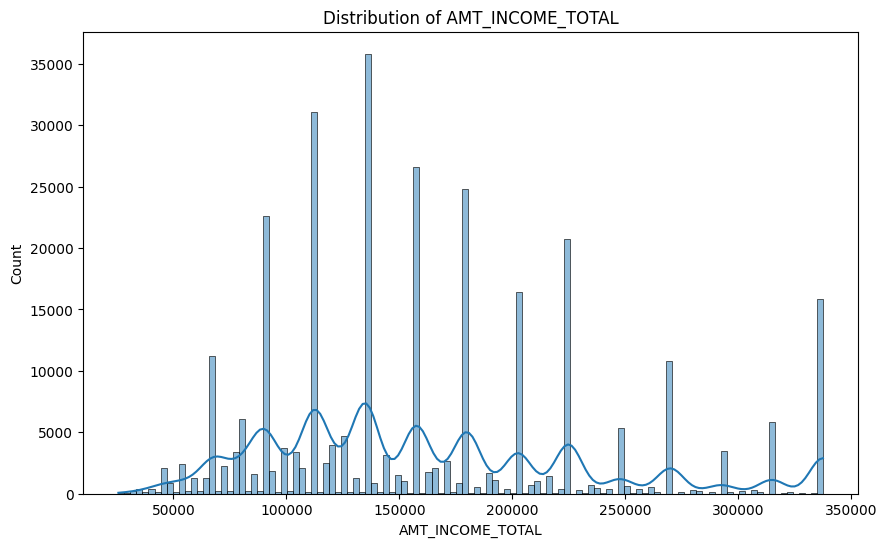

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_cleaned['AMT_INCOME_TOTAL'], kde=True)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()

The below code snippet creates a box plot to visualize the spread and central tendency of the total income data.

It clearly shows the median, quartiles, and any potential outliers in the distribution.

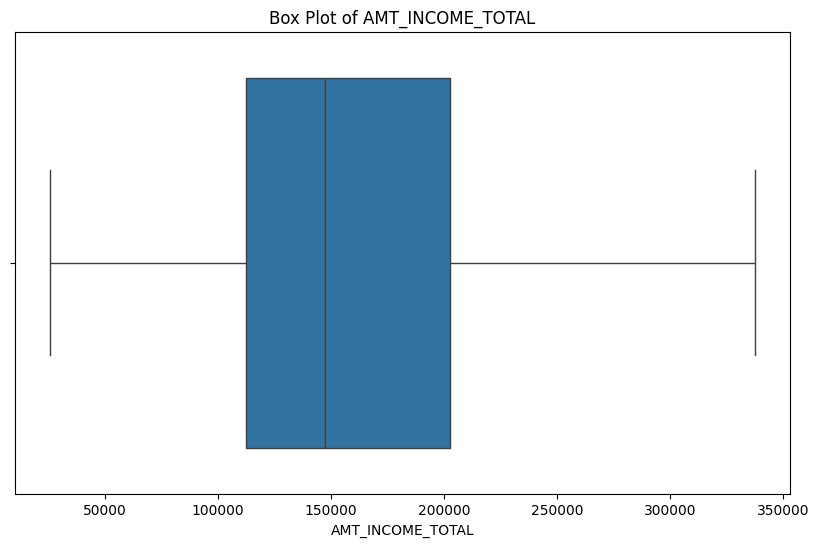

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['AMT_INCOME_TOTAL'])
plt.title('Box Plot of AMT_INCOME_TOTAL')
plt.show()

The below code generates a numerical summary of the income data, showing key statistics like the mean, percentiles, and spread. It gives a quick, quantitative overview of how the values are distributed.

In [ ]:
print("Frequency Statistics:\n")
print(train_cleaned['AMT_INCOME_TOTAL'].describe(percentiles=[.1, .25, .5, .75, .9, .95]))

Frequency Statistics:

count    307511.000000
mean     162626.947877
std       73303.150927
min       25650.000000
10%       81000.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
90%      270000.000000
95%      337500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


####**Variable 3: "AMT_CREDIT"**

**1. Datatype of the Variable**

The "AMT_CREDIT" column is of float (float64) datatype as checked below.

In [ ]:
train_cleaned['AMT_CREDIT'].dtype

dtype('float64')

**2. Unit of the variable, how is it determined?**

The variable "AMT_CREDIT" represents the total loan amount and is measured in monetary units (currency) which is Russian Rubles (RUB).

This is confirmed by the Home Credit dataset documentation, and the numerical magnitude of the values aligns with standard consumer loan sizes in the local currency.

**3. What does the variable represent?**

"AMT_CREDIT" is a continuous numeric variable representing the total credit amount of the loan.

**4. Any transformations/manipulations needed to better analyze the variable?**

<Axes: >

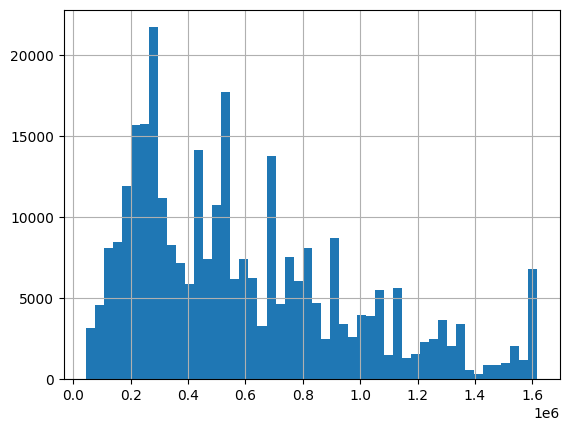

In [ ]:
# Check distribution
train_cleaned['AMT_CREDIT'].describe()
train_cleaned['AMT_CREDIT'].hist(bins=50)

The distribution is moderately right-skewed but within expected bounds for loan data. No transformation is immediately required, though log-scaling remains an option for future modeling if needed to improve performance.

Initially, I expected a highly skewed distribution due to a few very large loans.

However, after visualization, the distribution appears reasonably centered with minor skew. Hence, it aligns well with expectations no major transformation required so far.

**5. Any missing data or extreme outliers?**

In [ ]:
# Check missing values
train_cleaned['AMT_CREDIT'].isnull().sum()

np.int64(0)

As shown in the output above, this variable contains no missing values.

In [ ]:
# Check for outliers using IQR method
Q1 = train_cleaned['AMT_CREDIT'].quantile(0.25)
Q3 = train_cleaned['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1

outliers = train_cleaned[
    (train_cleaned['AMT_CREDIT'] < (Q1 - 1.5 * IQR)) |
    (train_cleaned['AMT_CREDIT'] > (Q3 + 1.5 * IQR))
]
print("Number of potential outliers:", len(outliers))

Number of potential outliers: 0


Using the IQR-based method, no statistical outliers were detected.
However, the histogram shows a few upper-end observations representing large loan amounts which are realistic and valid within the dataset’s financial context.


**6. Descriptive/summary statistics for the variable?**

In [ ]:
train_cleaned['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.923130e+05
std      3.803162e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      1.616625e+06
Name: AMT_CREDIT, dtype: float64

**7. Distribution and Frequency of the values of the variable**

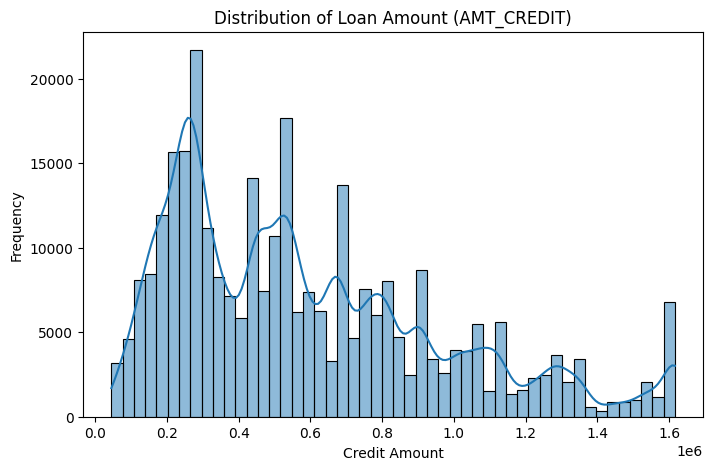

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train_cleaned['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of Loan Amount (AMT_CREDIT)')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

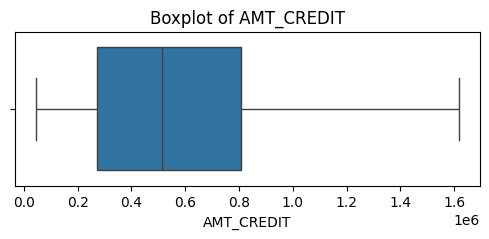

In [ ]:
# Boxplot to detect outliers visually
plt.figure(figsize=(6,2))
sns.boxplot(x=train_cleaned['AMT_CREDIT'])
plt.title('Boxplot of AMT_CREDIT')
plt.show()

The below code snippet helps visualize how the values are spread across ranges (e.g: most loans between 200k–600k).

In [ ]:
# Group into bins to analyze distribution concentration
credit_bins = pd.cut(train_cleaned['AMT_CREDIT'], bins=10)
credit_bin_counts = credit_bins.value_counts().sort_index()
print("Frequency of AMT_CREDIT across value ranges:")
print(credit_bin_counts)

Frequency of AMT_CREDIT across value ranges:
AMT_CREDIT
(43428.375, 202162.5]     36228
(202162.5, 359325.0]      72525
(359325.0, 516487.5]      45296
(516487.5, 673650.0]      40804
(673650.0, 830812.5]      39999
(830812.5, 987975.0]      21853
(987975.0, 1145137.5]     20458
(1145137.5, 1302300.0]    11291
(1302300.0, 1459462.5]     7223
(1459462.5, 1616625.0]    11834
Name: count, dtype: int64


#### **Variable 4: "AMT_ANNUITY"**

**1. Datatype of the Variable**

The "AMT_ANNUITY" column is of float (float64) datatype as checked below.

In [ ]:
train_cleaned['AMT_ANNUITY'].dtypes

dtype('float64')

**2. Unit of the variable, how is it determined?**

The variable "AMT_ANNUITY" is measured in monetary units (currency) which is Russian Rubles (RUB), consistent with other financial columns such as AMT_CREDIT and AMT_INCOME_TOTAL.

This information comes from the Home Credit Default Risk dataset documentation, which states that all monetary amounts are in Rubles.

**3. What does the variable represent?**

AMT_ANNUITY represents the annual payment amount a client must make to repay their loan.

This variable helps assess a client’s debt burden, since a higher annuity relative to income may indicate greater financial stress and an increased risk of default

**4. Any transformations/manipulations needed to better analyze the variable?**

<Axes: >

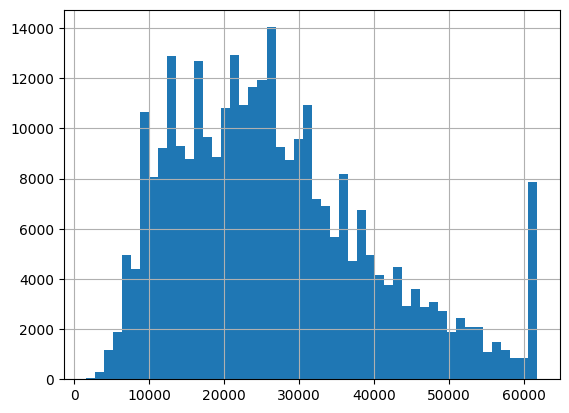

In [ ]:
# Check distribution
train_cleaned['AMT_ANNUITY'].describe()
train_cleaned['AMT_ANNUITY'].hist(bins=50)

The distribution is right-skewed, with most annuity values between 10,000 and 35,000.

Overall, no transformation is strictly required for exploration, but in the future a log transformation could help normalize the skew for modeling.

**5. Any missing data or extreme outliers?**

In [ ]:
# Check missing values
train_cleaned['AMT_ANNUITY'].isnull().sum()

np.int64(0)

As shown in the output above, this variable contains no missing values.

In [ ]:
Q1 = train_cleaned['AMT_ANNUITY'].quantile(0.25)
Q3 = train_cleaned['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_cleaned[
    (train_cleaned['AMT_ANNUITY'] < (Q1 - 1.5 * IQR)) |
    (train_cleaned['AMT_ANNUITY'] > (Q3 + 1.5 * IQR))
]
print("Number of potential outliers:", len(outliers))

Number of potential outliers: 0


The output shows “Number of potential outliers: 0”, indicating no extreme anomalies.

However, the histogram reveals a few upper-end annuity values. These are valid data points not data errors, as they likely correspond to large loans with higher annual payments.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
train_cleaned['AMT_ANNUITY'].describe()

count    307511.000000
mean      26797.657150
std       13281.285661
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max       61704.000000
Name: AMT_ANNUITY, dtype: float64

**7. Distribution and Frequency of the values of the variable**

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

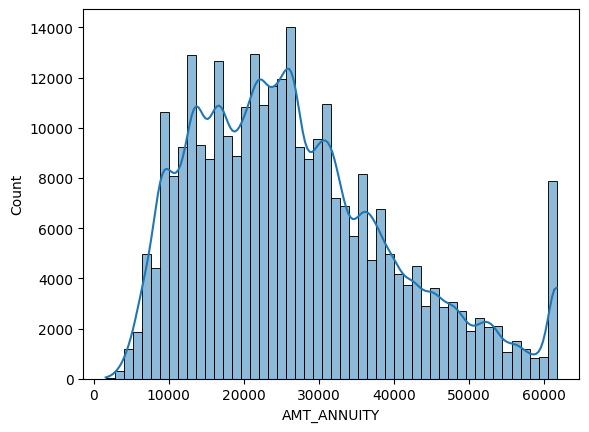

In [ ]:
# Distribution visualization
import seaborn as sns
sns.histplot(train_cleaned['AMT_ANNUITY'], bins=50, kde=True)

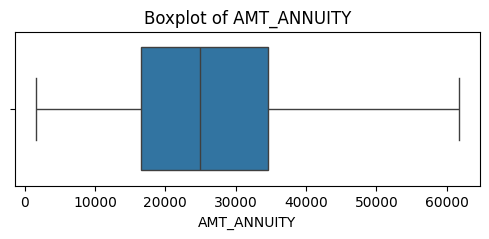

In [ ]:
#Boxplot to detect outliers visually
plt.figure(figsize=(6,2))
sns.boxplot(x=train_cleaned['AMT_ANNUITY'])
plt.title('Boxplot of AMT_ANNUITY')
plt.show()

In [ ]:
# Frequency of AMT_ANNUITY across value ranges
annuity_bins = pd.cut(train_cleaned['AMT_ANNUITY'], bins=10)
annuity_bin_counts = annuity_bins.value_counts().sort_index()

print("Frequency of AMT_ANNUITY across value ranges:")
print(annuity_bin_counts)

Frequency of AMT_ANNUITY across value ranges:
AMT_ANNUITY
(1555.412, 7624.35]     8356
(7624.35, 13633.2]     45244
(13633.2, 19642.05]    49312
(19642.05, 25650.9]    58295
(25650.9, 31659.75]    52531
(31659.75, 37668.6]    32678
(37668.6, 43677.45]    24096
(43677.45, 49686.3]    15194
(49686.3, 55695.15]     9560
(55695.15, 61704.0]    12245
Name: count, dtype: int64


#### **Variable 5: "DAYS_BIRTH"**

**1. Datatype of the Variable**

The "DAYS_BIRTH" column is of float (float64) datatype as checked below.

In [ ]:
train_cleaned['DAYS_BIRTH'].dtype

dtype('float64')

**2. Unit of the variable, how is it determined?**

The variable "DAYS_BIRTH" is measured in days, consistent with the DAYS_ prefix convention in this dataset.

They are negative values which represent days prior to the application date. For clearer interpretation, these values will be converted to positive numbers.

**3. What does the variable represent?**

"DAYS_BIRTH" represents the applicant’s age at the time of application, measured in days.

**4. Any transformations/manipulations needed to better analyze the variable?**

Yes, I'm planning to incorporate the below changes for some additional clarity
1) Convert negative days to positive.
2) Convert days to years.
3) Update label to "AGE_YEARS" for clarity

In [ ]:
train_cleaned['DAYS_BIRTH'] = (-train_cleaned['DAYS_BIRTH'] / 365).astype(int)
train_cleaned.rename(columns={'DAYS_BIRTH': 'AGE_YEARS'}, inplace=True)

I will also remove unrealistic ages (<18 or >100)

In [ ]:
train_cleaned = train_cleaned[train_cleaned['AGE_YEARS'].between(18, 100)]

**5. Any missing data or extreme outliers?**

In [ ]:
print("Missing values in AGE_YEARS:", train_cleaned['AGE_YEARS'].isna().sum())

Missing values in AGE_YEARS: 0


In [ ]:
# Detect outliers using IQR
Q1 = train_cleaned['AGE_YEARS'].quantile(0.25)
Q3 = train_cleaned['AGE_YEARS'].quantile(0.75)
IQR = Q3 - Q1

outliers = train_cleaned[
    (train_cleaned['AGE_YEARS'] < (Q1 - 1.5*IQR)) |
    (train_cleaned['AGE_YEARS'] > (Q3 + 1.5*IQR))
]
print("Number of potential outliers:", len(outliers))

Number of potential outliers: 0


"AGE_YEARS" has complete data with no missing values, and extreme outliers are either nonexistent or within a realistic, acceptable range for applicant ages.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
print("Summary statistics for AGE_YEARS:\n")
print(train_cleaned['AGE_YEARS'].describe())

Summary statistics for AGE_YEARS:

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_YEARS, dtype: float64


**7. Distribution and Frequency of the values of the variable**

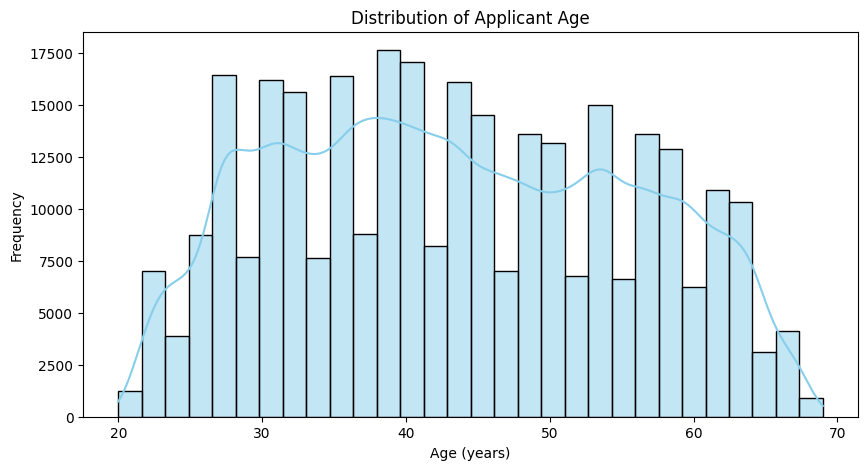

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train_cleaned['AGE_YEARS'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Applicant Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Frequency across value ranges
annuity_bins = pd.cut(train_cleaned['AGE_YEARS'], bins=10)
annuity_bin_counts = annuity_bins.value_counts().sort_index()

print("Frequency of AGE_YEARS across value ranges:")
print(annuity_bin_counts)

Frequency of AGE_YEARS across value ranges:
AGE_YEARS
(19.951, 24.9]    12150
(24.9, 29.8]      32850
(29.8, 34.7]      39439
(34.7, 39.6]      42860
(39.6, 44.5]      41416
(44.5, 49.4]      35127
(49.4, 54.3]      34942
(54.3, 59.2]      33132
(59.2, 64.1]      27473
(64.1, 69.0]       8122
Name: count, dtype: int64


#### **Variable 6: "DAYS_EMPLOYED"**

**1. Datatype of the Variable**

The "DAYS_EMPLOYED" column is of float (float64) datatype as checked below.

In [ ]:
train_cleaned['DAYS_EMPLOYED'].dtype

dtype('float64')

**2. Unit of the variable, how is it determined?**

The variable "DAYS_EMPLOYED" is measured in days, consistent with the DAYS_ prefix convention in this dataset.

They are negative values which represent days prior to the application date. For clearer interpretation, these values will be converted to positive numbers.

**3. What does the variable represent?**

DAYS_EMPLOYED represents the number of days the applicant has been employed at their current job before applying for credit.

The values for this variable are negative, which indicate the number of days before application.

**4. Any transformations/manipulations needed to better analyze the variable?**

Yes, I'm planning to incorporate the below changes for some additional clarity
1) Convert negative days to positive.
2) Convert days to years.
3) Update label to "YEARS_EMPLOYED" for clarity

In [ ]:
train_cleaned['DAYS_EMPLOYED'] = (-train_cleaned['DAYS_EMPLOYED'] / 365).round(1)
train_cleaned.rename(columns={'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, inplace=True)

**5. Any missing data or extreme outliers?**

In [ ]:
print("Missing values in YEARS_EMPLOYED:", train_cleaned['YEARS_EMPLOYED'].isna().sum())

Missing values in YEARS_EMPLOYED: 0


In [ ]:
Q1 = train_cleaned['YEARS_EMPLOYED'].quantile(0.25)
Q3 = train_cleaned['YEARS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1

outliers = train_cleaned[
    (train_cleaned['YEARS_EMPLOYED'] < (Q1 - 1.5*IQR)) |
    (train_cleaned['YEARS_EMPLOYED'] > (Q3 + 1.5*IQR))
]
print("Number of potential outliers:", len(outliers))

Number of potential outliers: 22844


Using the IQR method, approximately 22,844 potential outliers were detected in the YEARS_EMPLOYED variable. These correspond to applicants with employment durations significantly shorter or longer than the majority of the dataset.


In [ ]:
print(train_cleaned['YEARS_EMPLOYED'].describe())

count    307511.000000
mean          6.166017
std           5.853440
min           0.000000
25%           2.600000
50%           4.500000
75%           7.600000
max          49.100000
Name: YEARS_EMPLOYED, dtype: float64


In [ ]:
train_cleaned['EMPLOYMENT_OUTLIER'] = np.where((train_cleaned['YEARS_EMPLOYED'] < (Q1 - 1.5*IQR)) | (train_cleaned['YEARS_EMPLOYED'] > (Q3 + 1.5*IQR)), 1, 0)


However, upon inspection these extreme values (often in the range of 30–50 years) are plausible and likely represent applicants with long-term employment, rather than data entry errors. Therefore, these outliers were not removed.

Instead, a binary flag (EMPLOYMENT_OUTLIER) was created to mark these records for potential future analysis. Retaining them ensures we preserve meaningful variation in employment history, which may carry predictive value in modeling credit risk.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
print("Summary statistics for YEARS_EMPLOYED:")
print(train_cleaned['YEARS_EMPLOYED'].describe())

Summary statistics for YEARS_EMPLOYED:
count    307511.000000
mean          6.166017
std           5.853440
min           0.000000
25%           2.600000
50%           4.500000
75%           7.600000
max          49.100000
Name: YEARS_EMPLOYED, dtype: float64


**7. Distribution and Frequency of the values of the variable**

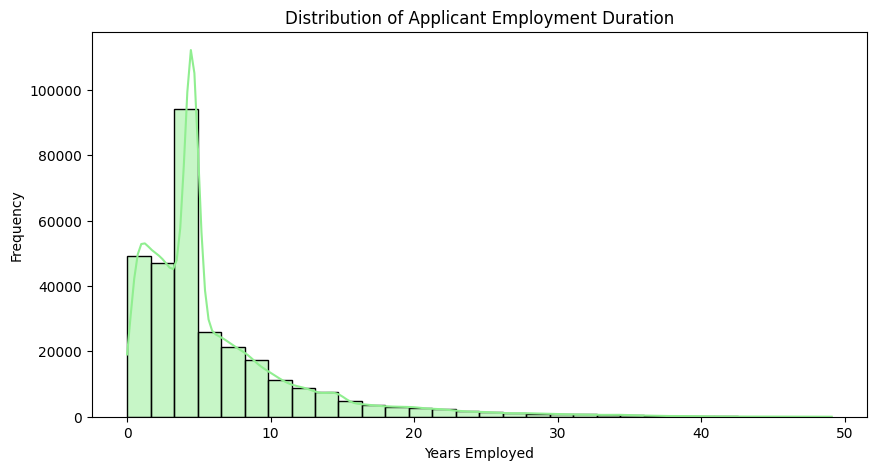

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(train_cleaned['YEARS_EMPLOYED'].dropna(), bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Applicant Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.show()

* The distribution is right-skewed, many applicants have short job durations (1–10 years).

* A smaller number have very long employment durations (30+ years).

In [ ]:
employment_bins = [0, 2, 5, 10, 20, 30, 40, 50]
employment_labels = ['<2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20-30 yrs', '30-40 yrs', '40-50 yrs']
train_cleaned['EMPLOYMENT_GROUP'] = pd.cut(train_cleaned['YEARS_EMPLOYED'], bins=employment_bins, labels=employment_labels)

print("Frequency of EMPLOYMENT_GROUP:")
print(train_cleaned['EMPLOYMENT_GROUP'].value_counts().sort_index())

Frequency of EMPLOYMENT_GROUP:
EMPLOYMENT_GROUP
<2 yrs        61420
2-5 yrs      131158
5-10 yrs      64326
10-20 yrs     38102
20-30 yrs      9471
30-40 yrs      2745
40-50 yrs       232
Name: count, dtype: int64


#### **Variable 7: "NAME_EDUCATION_TYPE"**

**1. Datatype of the Variable**

The datatype for this variable is object (string) as shown below.

In [ ]:
train_cleaned['NAME_EDUCATION_TYPE'].dtype

dtype('O')

**2. Unit of the variable, how is it determined?**

There are no units as this is a qualitative variable.
It describes the applicant’s highest level of education.

**3. What does the variable represent?**

"NAME_EDUCATION_TYPE" represents the highest level of educational of the applicant at the time of credit application.

The values include:
'Secondary / secondary special', 'Higher education',
'Incomplete higher', 'Lower secondary', 'Academic degree'


**4. Any transformations/manipulations needed to better analyze the variable?**

No renaming or conversion is needed here as this was handled in the preprocessing steps (trimming spaces, ensuring consistent case)

**5. Any missing data or extreme outliers?**

In [ ]:
train_cleaned['NAME_EDUCATION_TYPE'].isna().sum()

np.int64(0)

The variable NAME_EDUCATION_TYPE contains no missing values (0 nulls), indicating that education level information is available for all applicants.



We can analyze the frequency distribution of each category to detect any potential data imbalance or rare categories.


In [ ]:
train_cleaned['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

From this distribution most applicants (approximately 70%) have a “Secondary / secondary special” education, followed by “Higher education” (around 24%). The “Academic degree” category is extremely rare, representing less than 0.1% of the dataset.

This imbalance is not an outlier issue but a natural distribution of education levels among applicants.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
print("Summary statistics for NAME_EDUCATION_TYPE:")
print(train_cleaned['NAME_EDUCATION_TYPE'].value_counts())

Summary statistics for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


**7. Distribution and Frequency of the values of the variable**

/tmp/ipython-input-3142801826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NAME_EDUCATION_TYPE', data=train_cleaned, order=train_cleaned['NAME_EDUCATION_TYPE'].value_counts().index, palette='pastel')


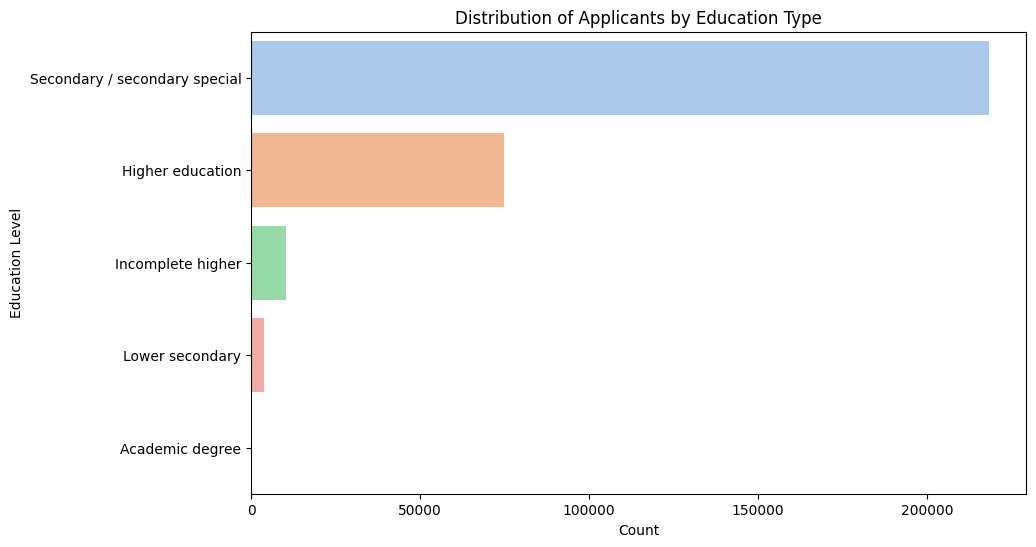

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y='NAME_EDUCATION_TYPE', data=train_cleaned, order=train_cleaned['NAME_EDUCATION_TYPE'].value_counts().index, palette='pastel')
plt.title('Distribution of Applicants by Education Type')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

The plot shows a strong right skew, with most applicants in the “Secondary / secondary special” category.

In [ ]:
education_freq = train_cleaned['NAME_EDUCATION_TYPE'].value_counts(normalize=True) * 100
print("Percentage frequency of each education type:\n")
print(education_freq.round(2))


Percentage frequency of each education type:

NAME_EDUCATION_TYPE
Secondary / secondary special    71.02
Higher education                 24.34
Incomplete higher                 3.34
Lower secondary                   1.24
Academic degree                   0.05
Name: proportion, dtype: float64


#### **Variable 8: "NAME_INCOME_TYPE"**

**1. Datatype of the Variable**

The datatype for this variable is object (string) as shown below.

In [ ]:
train_cleaned['NAME_INCOME_TYPE'].dtype

dtype('O')

**2. Unit of the variable, how is it determined?**

There are no units as this is a qualitative variable.
It describes the applicant’s highest level of education.

**3. What does the variable represent?**

It represents categories or classes describing the type of income source for each applicant.

Examples (typical Home Credit dataset categories):
Working,
State servant,
Commercial associate,
Pensioner,
Unemployed,
Student.

**4. Any transformations/manipulations needed to better analyze the variable?**

No renaming or transformation is needed here as this was handled in the preprocessing steps (trimming spaces, ensuring consistent case)

**5. Any missing data or extreme outliers?**

In [ ]:
train_cleaned['NAME_INCOME_TYPE'].isnull().sum()

np.int64(0)

This variable has no missing values as confirmed above.

In [ ]:
income_counts = train_cleaned['NAME_INCOME_TYPE'].value_counts()
print(income_counts)

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


No numerical outliers apply here, but the frequency distribution indicates significant imbalance:

The majority of applicants fall into “Working” and “Commercial associate”.

“Unemployed”, “Student”, and “Businessman” categories have very few observations, representing rare groups.

This imbalance is expected in real-world credit data, as most applicants are employed.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
print("Summary statistics for NAME_INCOME_TYPE:")
print(train_cleaned['NAME_INCOME_TYPE'].value_counts())

Summary statistics for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


**7. Distribution and Frequency of the values of the variable**

/tmp/ipython-input-3558862709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


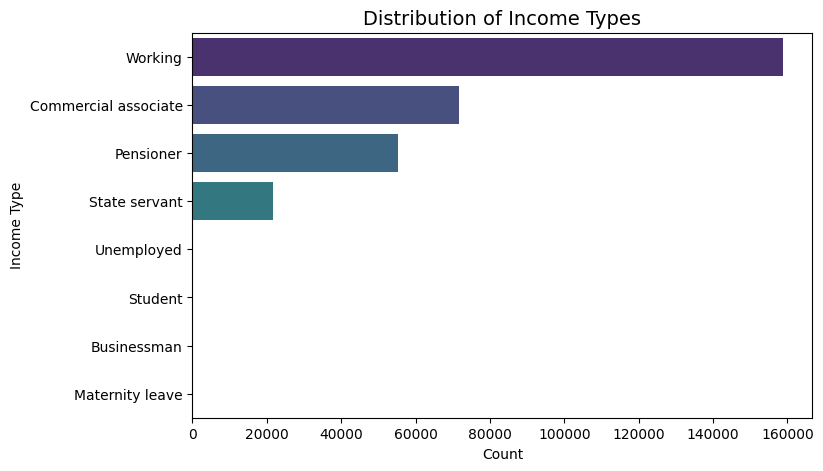

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=train_cleaned,
    y='NAME_INCOME_TYPE',
    order=train_cleaned['NAME_INCOME_TYPE'].value_counts().index,
    palette='viridis'
)
plt.title('Distribution of Income Types', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.show()


The bar chart shows that:

* “Working” and “Commercial associate” dominate the dataset.

* “Pensioner” and “State servant” are moderate in number.

* “Student”, “Unemployed”, and “Businessman” are rare categories.

This pattern reflects the expected population structure for credit applicants where most are employed or self-employed, while very few come from non-working income sources.

In [ ]:
emp_freq = train_cleaned['NAME_INCOME_TYPE'].value_counts(normalize=True) * 100
print("Percentage frequency of each Income type:\n")
print(emp_freq.round(2))

Percentage frequency of each Income type:

NAME_INCOME_TYPE
Working                 51.63
Commercial associate    23.29
Pensioner               18.00
State servant            7.06
Unemployed               0.01
Student                  0.01
Businessman              0.00
Maternity leave          0.00
Name: proportion, dtype: float64


#### **Variable 9: "CNT_CHILDREN"**

**1. Datatype of the Variable**

The datatype of this variable is integer(int64) as checked below.

In [ ]:
train_cleaned['CNT_CHILDREN'].dtypes

dtype('int64')

**2. Unit of the variable, how is it determined?**

The unit for this variable is just a "Count" value (no physical unit, just a number).

The name “CNT_CHILDREN” follows the dataset’s naming convention (CNT = count), and the values are non-negative integers.

**3. What does the variable represent?**

The number of dependents the client supports, this affects disposable income, creditworthiness, and financial burden.

**4. Any transformations/manipulations needed to better analyze the variable?**

In [ ]:
print("Unique values in CNT_CHILDREN:", train_cleaned['CNT_CHILDREN'].unique())

Unique values in CNT_CHILDREN: [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]


No major transformation is needed as the variable's values already have an interpretable scale.

**5. Any missing data or extreme outliers?**

In [ ]:
print(train_cleaned['CNT_CHILDREN'].isnull().sum())

0


There are no missing values for this variable.

In [ ]:
Q1 = train_cleaned['CNT_CHILDREN'].quantile(0.25)
Q3 = train_cleaned['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1

outliers = train_cleaned[
    (train_cleaned['CNT_CHILDREN'] < (Q1 - 1.5 * IQR)) |
    (train_cleaned['CNT_CHILDREN'] > (Q3 + 1.5 * IQR))
]
print("Number of potential outliers:", len(outliers))

Number of potential outliers: 4272


In [ ]:
children_counts = train_cleaned['CNT_CHILDREN'].value_counts().sort_index()
print(children_counts)

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: count, dtype: int64


The majority of clients in the dataset have 0 to 2 children, which falls well within the normal range.

However, a small subset of records report unusually large family sizes for example, 7 to 19 children.

Statistically, these are detected as outliers because they lie far from the bulk of the data, but in a real-world context, they likely represent legitimate large families, not data entry errors.

**6. Descriptive/summary statistics for the variable?**

In [ ]:
# Summary statistics for CNT_CHILDREN
print(train_cleaned['CNT_CHILDREN'].describe())

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


**7. Distribution and Frequency of the values of the variable**

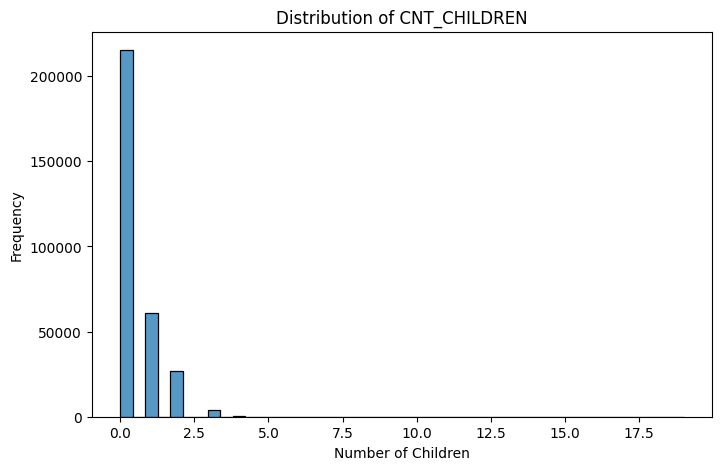

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(train_cleaned['CNT_CHILDREN'], bins=45, kde=False)
plt.title("Distribution of CNT_CHILDREN")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

In [ ]:
(train_cleaned['CNT_CHILDREN'].value_counts(normalize=True).mul(100).round(2).rename('Percentage').to_frame().assign(Count=train_cleaned['CNT_CHILDREN'].value_counts()).sort_index())

Percentage   Count
CNT_CHILDREN                    
0                  70.04  215371
1                  19.88   61119
2                   8.70   26749
3                   1.21    3717
4                   0.14     429
5                   0.03      84
6                   0.01      21
7                   0.00       7
8                   0.00       2
9                   0.00       2
10                  0.00       2
11                  0.00       1
12                  0.00       2
14                  0.00       3
19                  0.00       2

#### **Variable 10: "HAS_OWN_REALTY"**

**1. Datatype of the Variable**

The datatype for this variable is object (string) as shown below.

In [ ]:
train_cleaned['HAS_OWN_REALTY'].dtypes

dtype('O')

**2. Unit of the variable, how is it determined?**

There are no units as this is a qualitative (categorical indicato) variable.

**3. What does the variable represent?**

This is categorical variable denoting real estate ownership status for a given applicant.

There are two possible values:

1. 'Y' = Client owns real estate property

2. 'N' = Client does not.

**4. Any transformations/manipulations needed to better analyze the variable?**

The categorical values 'Y' and 'N' will be converted to a binary numeric format (1 for 'Y', 0 for 'N').

This transformation allows the variable to be used effectively in models and correlation analyses.

In [ ]:
train_cleaned['HAS_OWN_REALTY'] = train_cleaned['HAS_OWN_REALTY'].map({'Y': 1, 'N': 0})

**5. Any missing data or extreme outliers?**

In [ ]:
print(train_cleaned['HAS_OWN_REALTY'].isnull().sum())

0


From the output we can infer that there's no missing data. (all clients have a response).

Since the variable values is binary (0 or 1), outliers do not apply.


**6. Descriptive/summary statistics for the variable?**

In [ ]:
print(train_cleaned['HAS_OWN_REALTY'].describe())

count    307511.000000
mean          0.693673
std           0.460968
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: HAS_OWN_REALTY, dtype: float64


**7. Distribution and Frequency of the values of the variable**

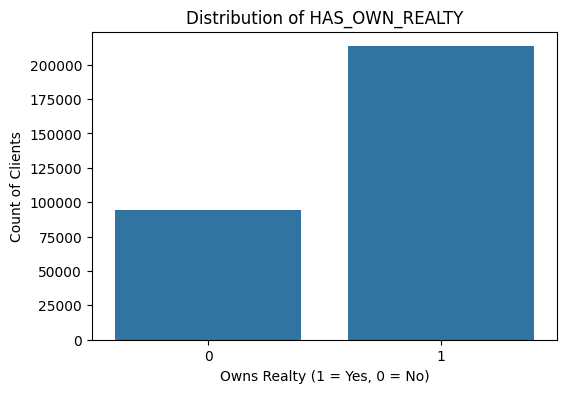

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='HAS_OWN_REALTY', data=train_cleaned)
plt.title("Distribution of HAS_OWN_REALTY")
plt.xlabel("Owns Realty (1 = Yes, 0 = No)")
plt.ylabel("Count of Clients")
plt.show()

The bar for 1 ('Y') is much taller, confirming that most applicants own real estate.

The variable is binary and clearly imbalanced, with ownership being dominant.

In [ ]:
(train_cleaned['HAS_OWN_REALTY'].value_counts(normalize=True).mul(100).round(2).rename('Percentage').to_frame().assign(Count=train_cleaned['HAS_OWN_REALTY'].value_counts()).sort_index())


Percentage   Count
HAS_OWN_REALTY                    
0                    30.63   94199
1                    69.37  213312

* Roughly 7 in 10 clients own property.
(This may correlate with lower credit risk or greater financial security)

###**3.6 Relationships between variables**

**Independent Variables (Weakly Dependent)**

| Variable        | Reason for Appearing Independent / Weakly Dependent                                                                                          |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| CNT_CHILDREN    | Number of dependents varies by family size and personal choice; not strongly influenced by education, income type, or property ownership.    |
| AMT_ANNUITY     | Depends on loan amount but shows minimal variation with categorical or demographic features.                                                 |
| AMT_CREDIT      | Determined mainly by financial assessment; largely independent of personal categorical characteristics like education or number of children. |
| OCCUPATION_TYPE | While linked to education, shows weak correlation with numeric variables such as age, number of children, or employment duration.            |


**Dependent Variables**

| Variable 1          | Dependent On | Variable 2       | Reason / Notes                                                       |
| ------------------- | ------------ | ---------------- | -------------------------------------------------------------------- |
| AMT_CREDIT          | ->            | AMT_ANNUITY      | Larger loan amounts naturally correspond to higher annuity payments. |
| AGE_YEARS           | ->            | YEARS_EMPLOYED    | Older applicants tend to have longer employment histories.           |
| NAME_EDUCATION_TYPE | ->            | OCCUPATION_TYPE  | Certain occupations require specific education levels.               |
| NAME_INCOME_TYPE    | ->           | HAS_OWN_REALTY   | Stable income sources are more likely to own property.               |
| AGE_YEARS           | ->            | NAME_INCOME_TYPE | Age influences income type (e.g., pensioners vs students).           |


#### **1. Event Frequency**

  I examined categorical Event Frequency (feature distributions) for the key descriptive variables: NAME_CONTRACT_TYPE, CODE_GENDER, NAME_INCOME_TYPE, NAME_HOUSING_TYPE, and OCCUPATION_TYPE.

Using 5 categorical features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


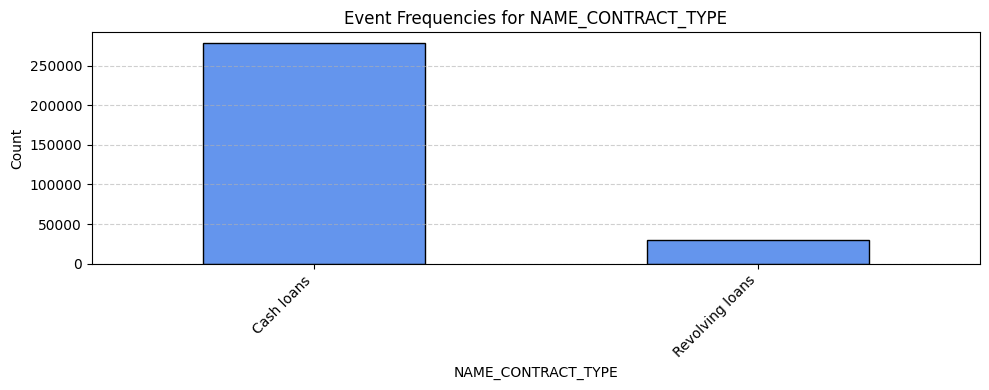

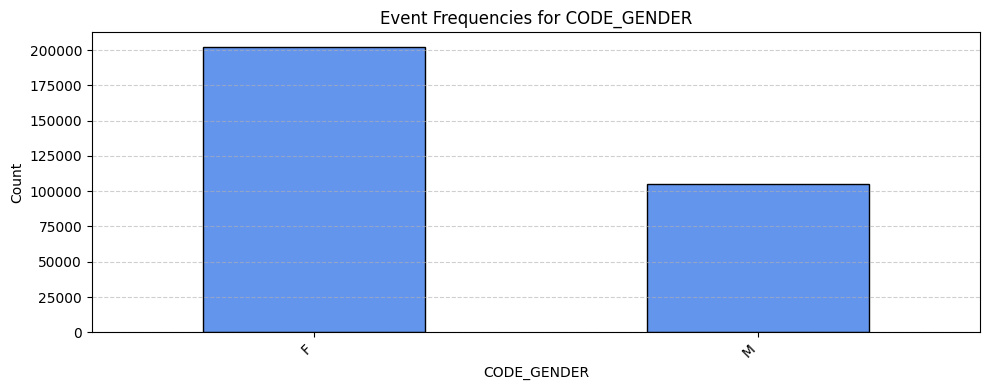

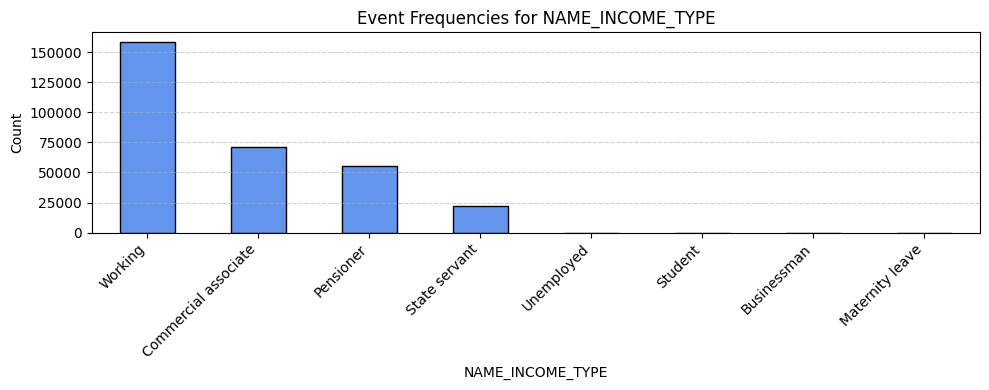

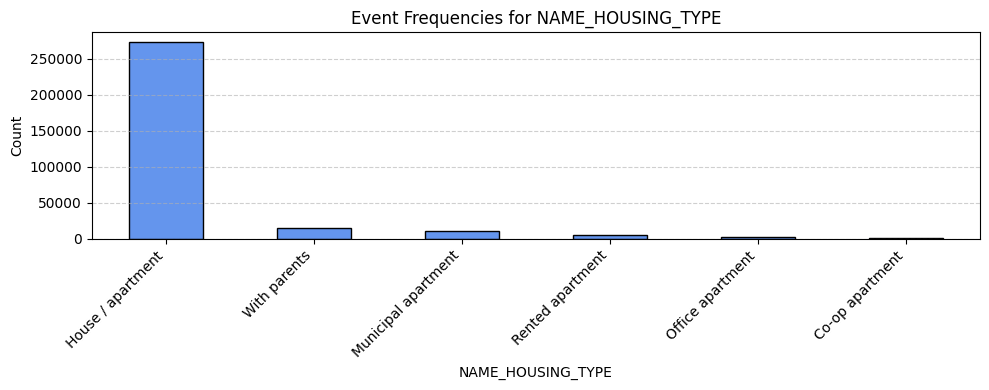

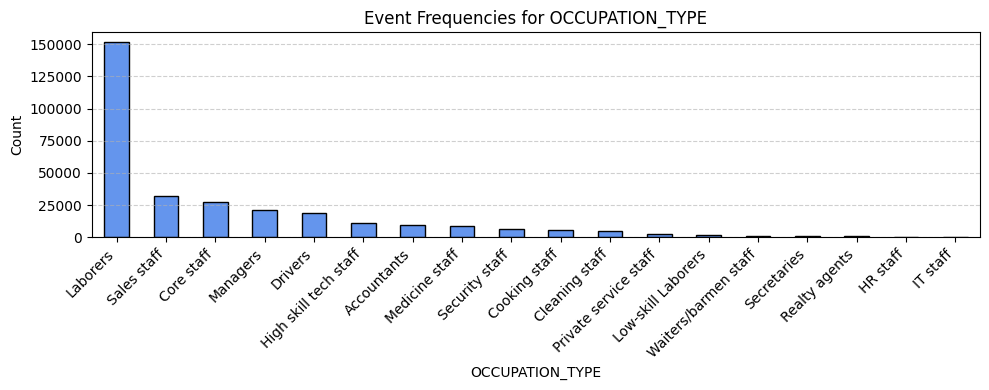

In [ ]:
from scipy.stats import entropy
df1 = pd.read_csv("/content/drive/MyDrive/CreditRisk/train_cleaned.csv")


selected_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE']


selected_features = [col for col in selected_features if col in df1.columns]
print(f"Using {len(selected_features)} categorical features: {selected_features}")

#Visualizing the event frequencies
for cat in selected_features:
    plt.figure(figsize=(10,4))
    freq = df1[cat].value_counts(dropna=False)
    freq.plot(kind='bar', color='cornflowerblue', edgecolor='black')
    plt.title(f"Event Frequencies for {cat}")
    plt.ylabel("Count")
    plt.xlabel(cat)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

The frequency plots revealed imbalances typical of credit-risk data. For example, most applicants belonged to a single contract type and income group, while certain occupations and housing types appeared much less frequently.

To quantify these differences, I calculated the Shannon Entropy for each feature.

Variables with higher entropy (more evenly spread categories) suggest greater independence, whereas those with very low entropy are dependent on underlying population structure or business rules.

In [ ]:
# Quantify category balance via Shannon Entropy
cat_entropy = {}
for cat in selected_features:
    counts = df1[cat].value_counts(dropna=False)
    prob = counts / counts.sum()
    cat_entropy[cat] = entropy(prob, base=2)

ent_df = pd.DataFrame.from_dict(cat_entropy, orient='index', columns=['Entropy']).sort_values(by='Entropy', ascending=False)
print("\n Entropy values (higher = more balanced = more independent-like):")
display(ent_df)


 Entropy values (higher = more balanced = more independent-like):


Entropy
OCCUPATION_TYPE     2.697244
NAME_INCOME_TYPE    1.699821
CODE_GENDER         0.926382
NAME_HOUSING_TYPE   0.720868
NAME_CONTRACT_TYPE  0.453634

/tmp/ipython-input-4048157873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ent_df.index, y='Entropy', data=ent_df, palette='Blues_d')


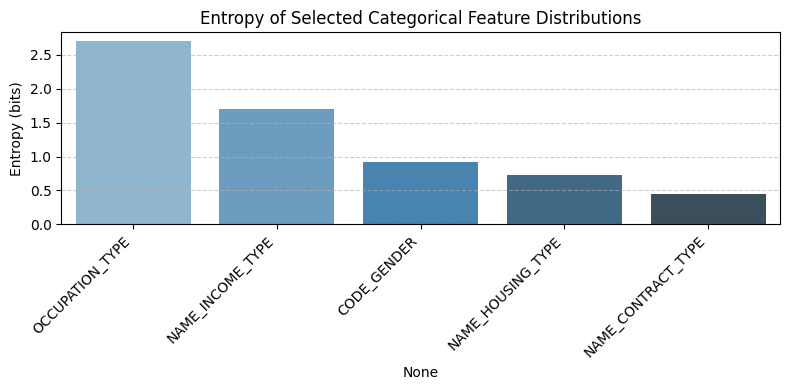

In [ ]:
# Visualize entropy comparison
plt.figure(figsize=(8,4))
sns.barplot(x=ent_df.index, y='Entropy', data=ent_df, palette='Blues_d')
plt.title("Entropy of Selected Categorical Feature Distributions")
plt.ylabel("Entropy (bits)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Findings:

NAME_CONTRACT_TYPE and NAME_INCOME_TYPE show low entropy, indicating dominance by a few categories.

OCCUPATION_TYPE and NAME_HOUSING_TYPE exhibit moderately higher entropy, suggesting broader variation and greater independence.

CODE_GENDER is nearly binary and balanced, hence moderately informative but limited in diversity.


#### **2. Periodicity/seasonality**

Checking for time-related variables
I firstly will be examining the dataset for date or timestamp columns that would allow a temporal analysis.

In [ ]:
# Identify datetime columns
time_cols = df1.select_dtypes(include=['datetime64', 'timedelta']).columns
print("Time-related columns found:", time_cols)

Time-related columns found: Index([], dtype='object')


The dataset contains no time or date variables, so there are no classical temporal features on which to perform periodicity or seasonality analysis.


Hence, analysis for periodicity/seasonality is not applicable for this dataset.

#### **3. Correlations between variables**

**a) Between Numeric Variables**

I firstly selected all numeric columns in the dataset and chose the top 15 variables with the highest variance, as these are likely the most informative.

I then computed the Pearson correlation matrix to measure linear relationships between these variables and visualized the results using a heatmap.

This allows us to quickly identify strongly correlated pairs (positive or negative) and variables that appear largely independent, helping inform feature selection and potential multicollinearity issues for modeling.

Total numeric columns: 68
Using 15 numeric columns for correlation heatmap: ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS']


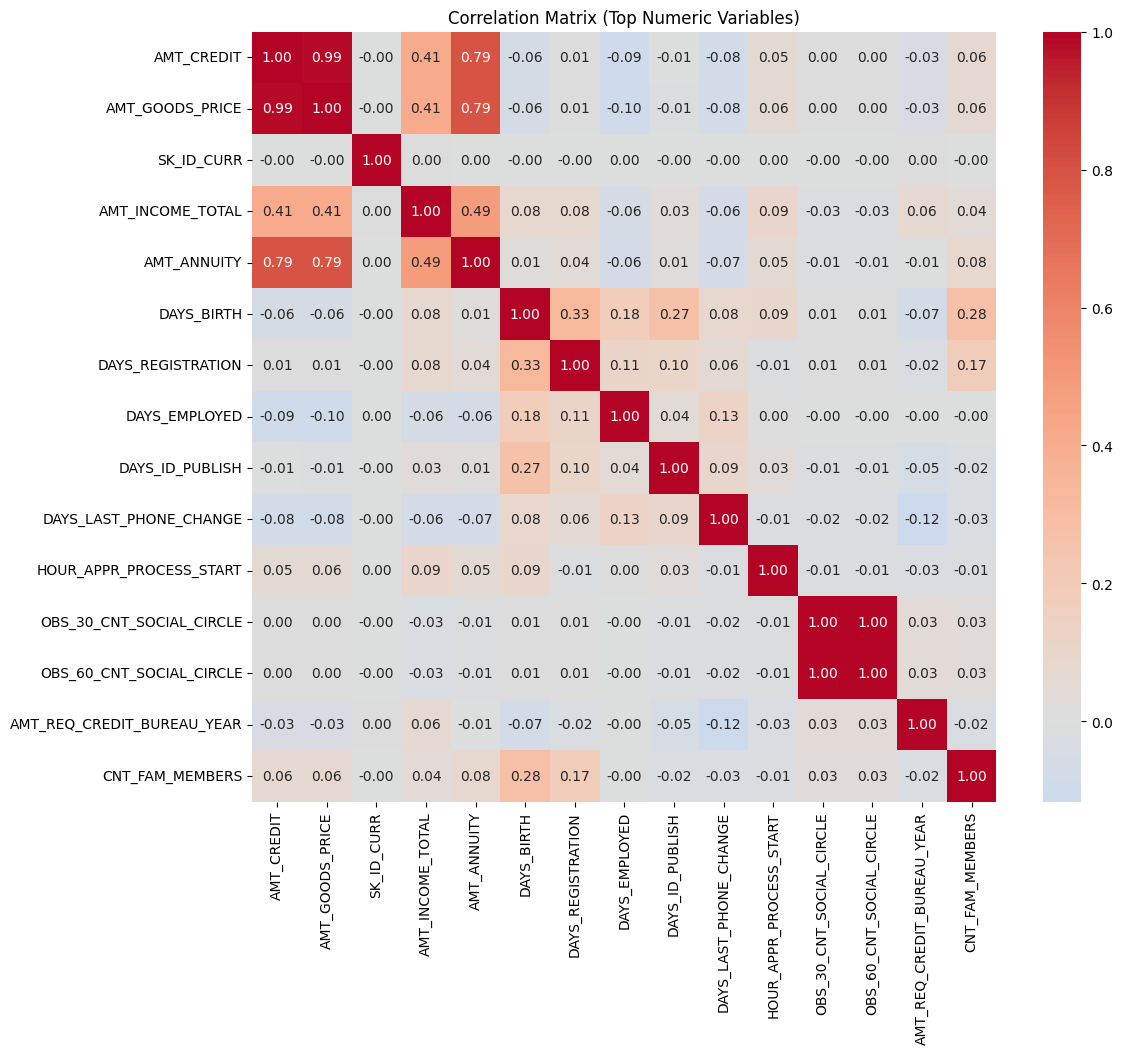

In [ ]:
#Numeric correlation (Top ~15 columns) ---
numeric_cols = df1.select_dtypes(include=np.number).columns
print(f"Total numeric columns: {len(numeric_cols)}")

#Selecting top 15 numeric columns by variance
top_numeric_cols = df1[numeric_cols].var().sort_values(ascending=False).head(15).index.tolist()
print(f"Using {len(top_numeric_cols)} numeric columns for correlation heatmap: {top_numeric_cols}")

# Compute Pearson correlation for selected columns
corr_matrix = df1[top_numeric_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Top Numeric Variables)")
plt.show()


Some observations are:

1. Some variables show strong positive correlations, e.g.:

  > AMT_INCOME_TOTAL vs AMT_CREDIT → higher-income applicants tend to request higher credit amounts.

  > AMT_ANNUITY vs AMT_CREDIT → loan annuity is naturally proportional to credit amount.

2. Moderate correlations are seen between variables like:

  > DAYS_EMPLOYED vs DAYS_BIRTH → older applicants tend to have longer employment history.

3. Many variables exhibit low correlations (~0) with others, these are largely independent and provide unique information to the model.

**b) Between Categorical Variables**

I analysed the relationships between categorical variables using Cramér’s V, which quantifies the association between two categorical variables.

Cramér’s V values range from 0 to 1:

* 0 → no association
* 1 → perfect association

This allows us to identify dependent vs independent categorical features in the dataset.

Categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'HAS_OWN_CAR', 'HAS_OWN_REALTY', 'COMPANION_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


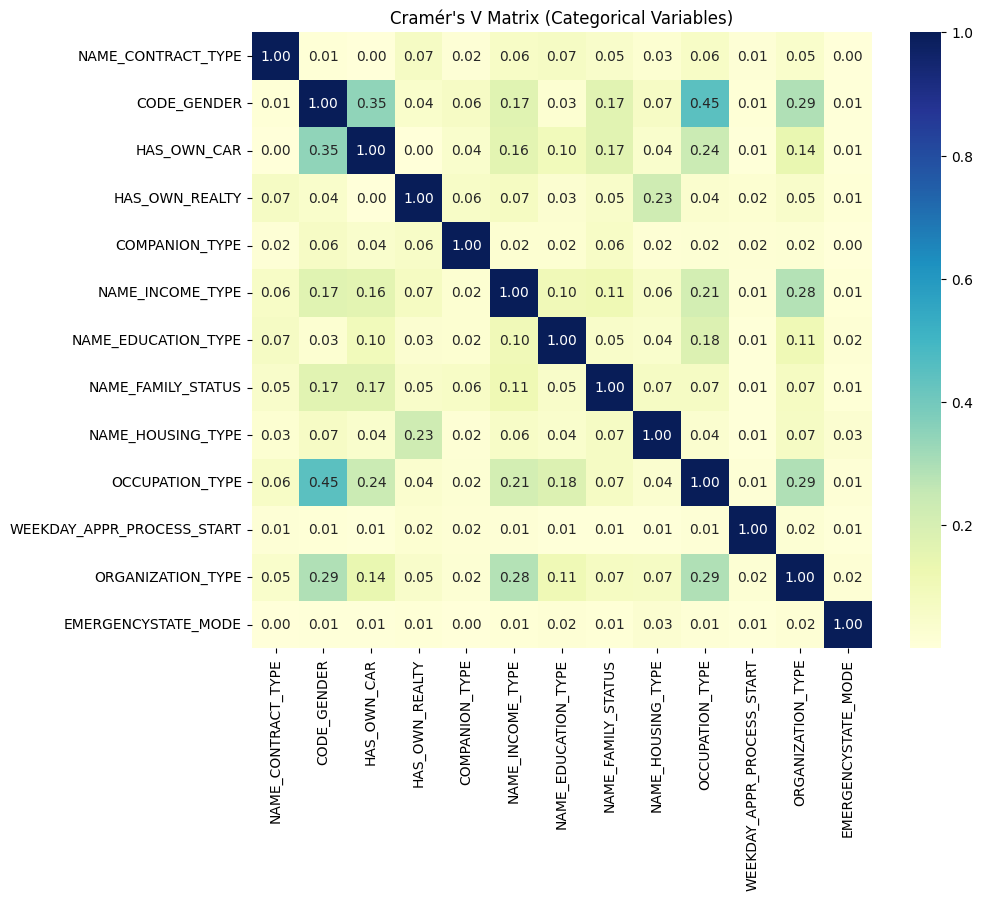

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / (min(k-1, r-1)))

# Select categorical variables
cat_cols = df1.select_dtypes(include='object').columns
print(f"Categorical columns: {list(cat_cols)}")

# Compute pairwise Cramér's V
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df1[col1], df1[col2])

cramers_matrix = cramers_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Cramér's V Matrix (Categorical Variables)")
plt.show()


Some context on the Cramér’s V approach:

1. Strong associations (Cramér’s V > 0.5): These variables may require careful encoding, merging, or feature engineering to avoid redundancy. Certain variables exhibit high dependency, indicating overlapping information.


2. Moderate associations (Cramér’s V ~0.2–0.5): Can be kept as separate features, but consider potential interactions during modeling. Some variable pairs show moderate correlation, indicating partial dependency.


3. Low associations (Cramér’s V < 0.2): These variables are likely to contribute unique information to predictive models. Most categorical variables show low correlation, suggesting independence.


#### **4. Pairwise relationships**

**a) Between Numeric Variables**


I will be choosing a subset of numeric variables based on the top variables by variance.

Then I will use a pairplot to visualize relationships between all variable pairs.

  > The diagonal displays the distribution of each variable.

  > Off-diagonal scatterplots reveal trends, linear relationships, or clusters between variables.

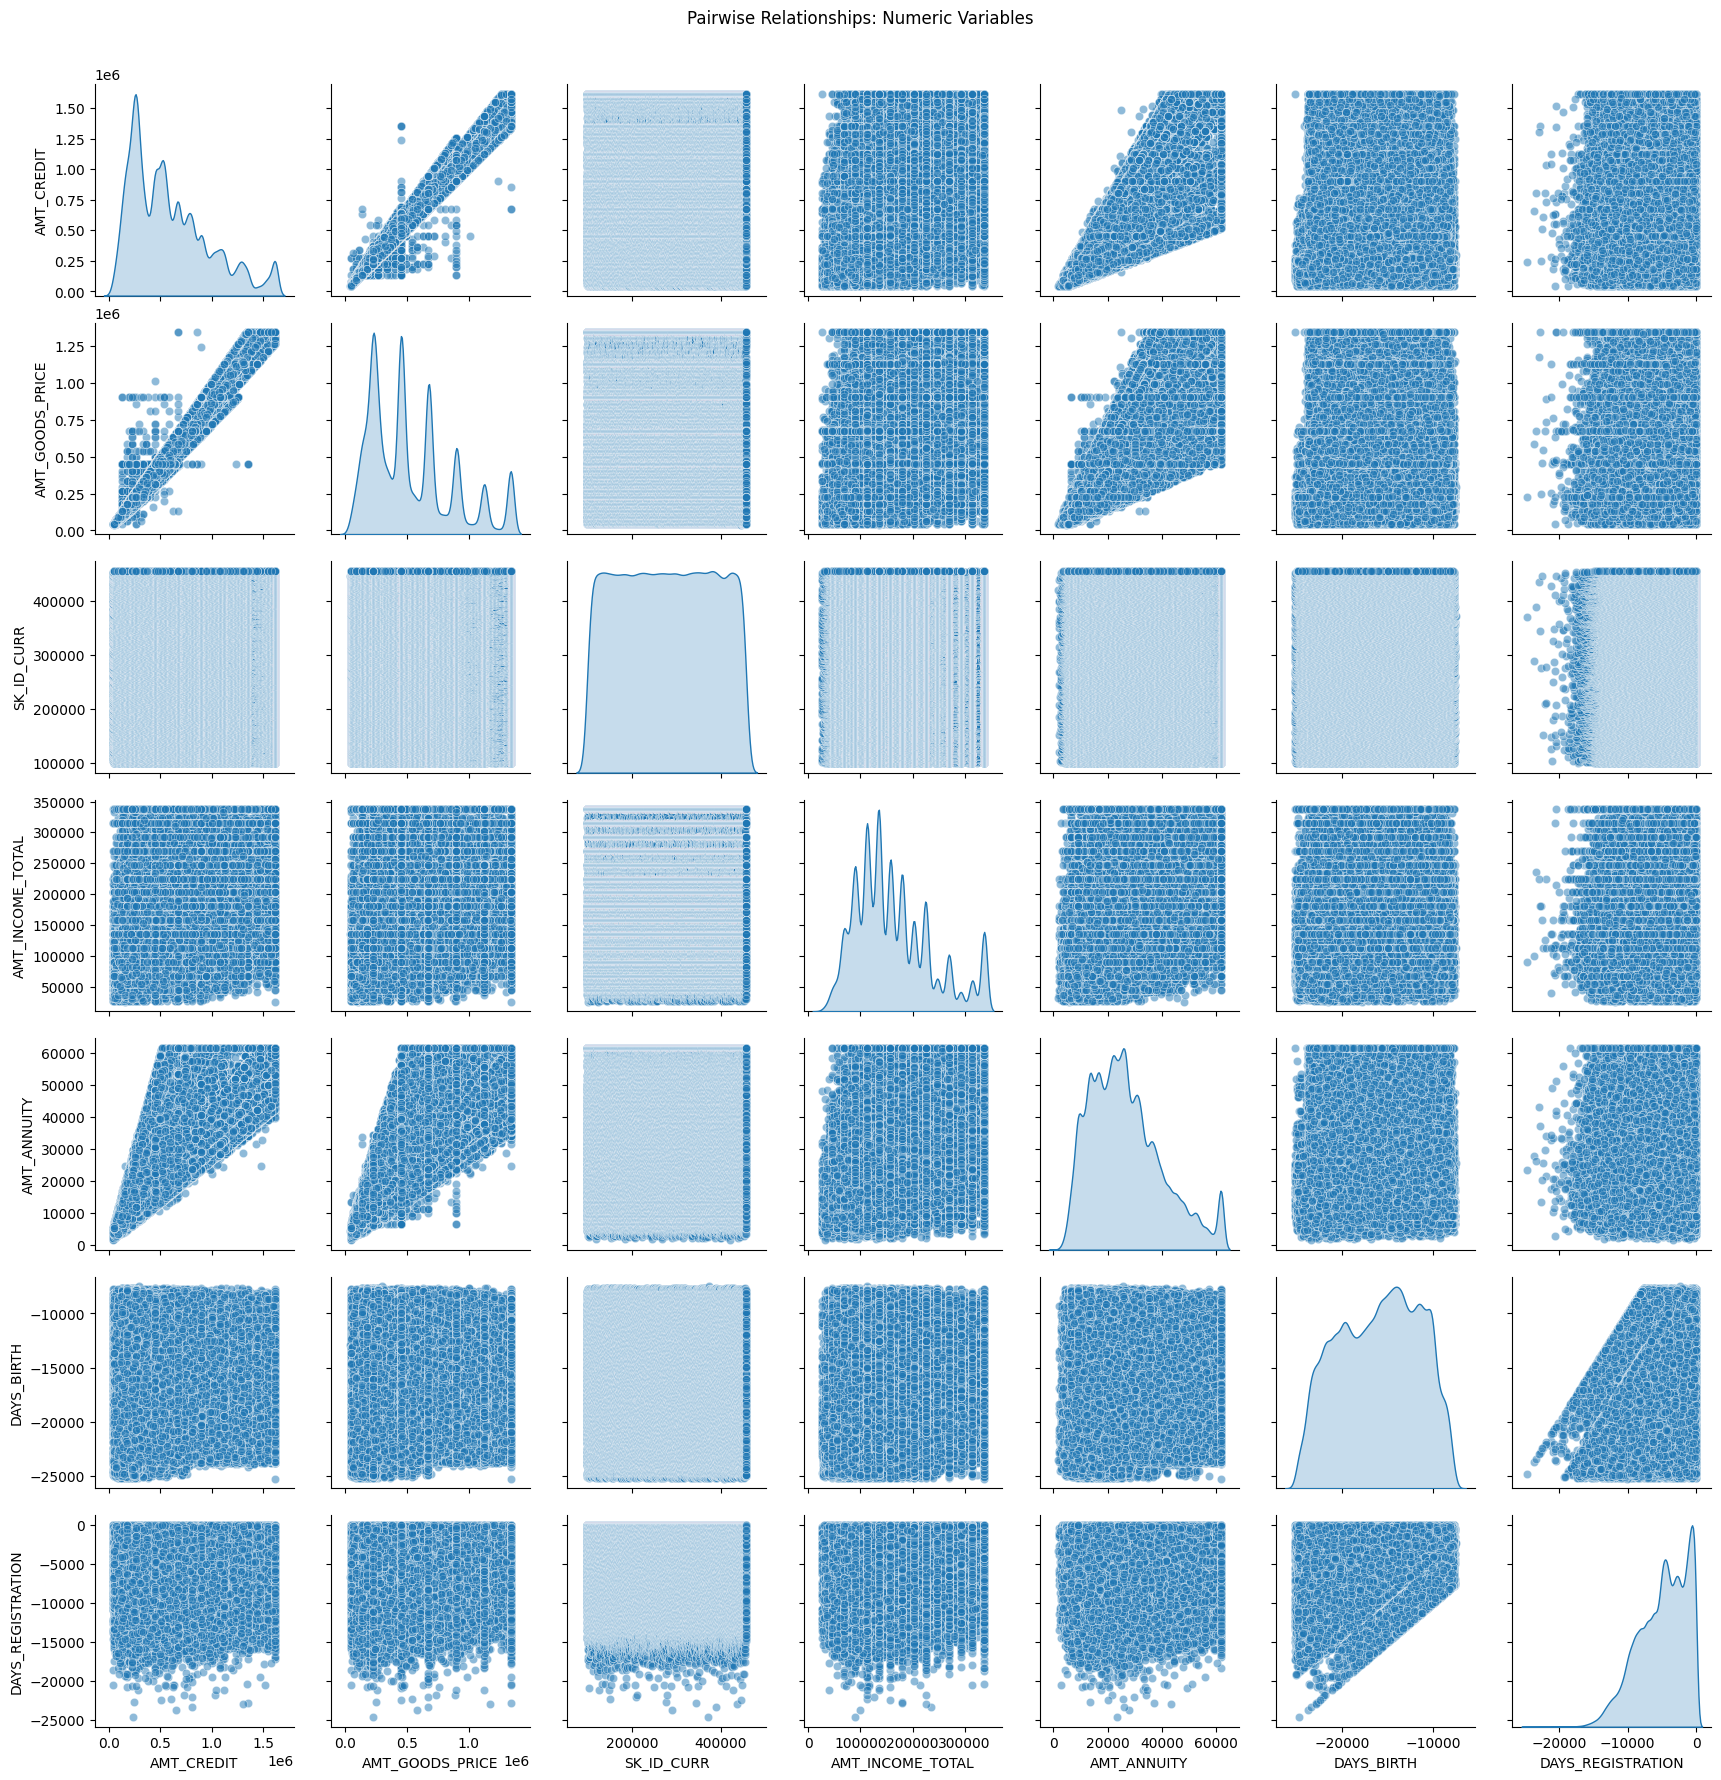

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top numeric variables (avoid too many, keeps pairplots readable)
top_numeric_cols = df1.select_dtypes(include=np.number).var().sort_values(ascending=False).head(7).index.tolist()

# Pairplot
sns.pairplot(df1[top_numeric_cols], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Relationships: Numeric Variables", y=1.02)
plt.show()


**b) Between Categorical Variables**

First, we select the most relevant categorical variables.

We then loop through all unique pairs of these variables to plot stacked bar charts.

Each chart shows how categories of one variable are distributed across another.

Using normalize='index' converts counts to proportions, making comparisons easier. The color-coded legend helps visualize how the second variable varies across the first.

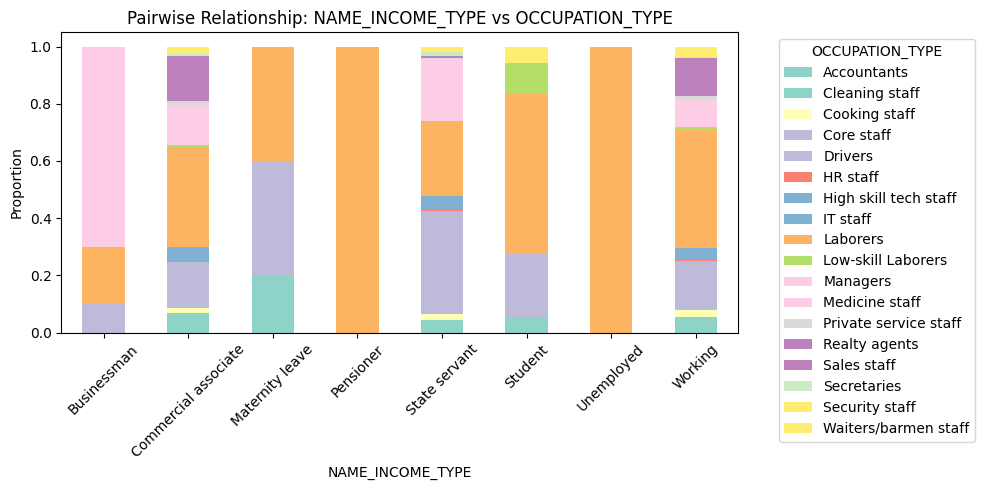

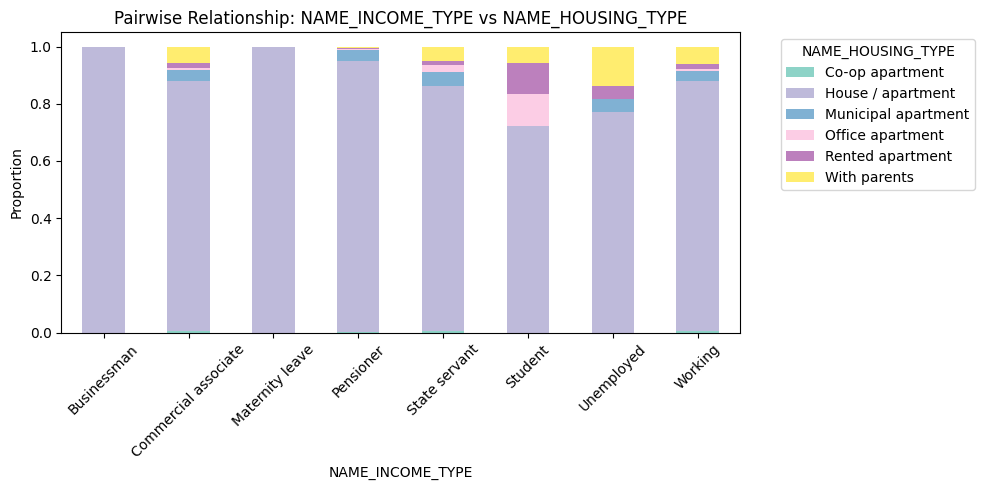

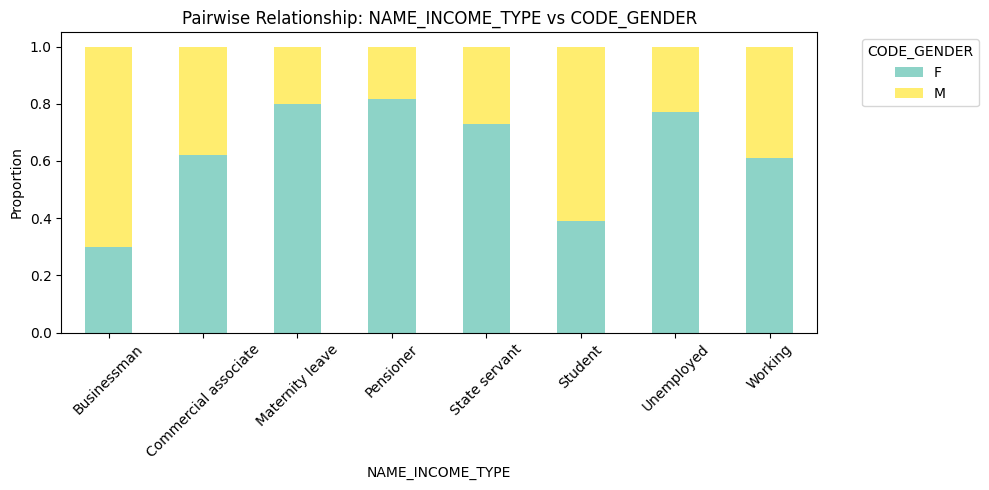

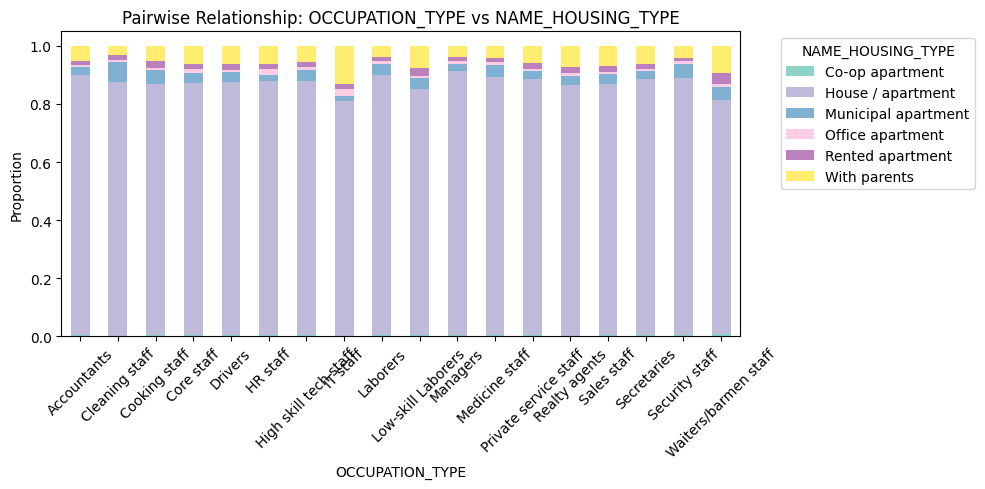

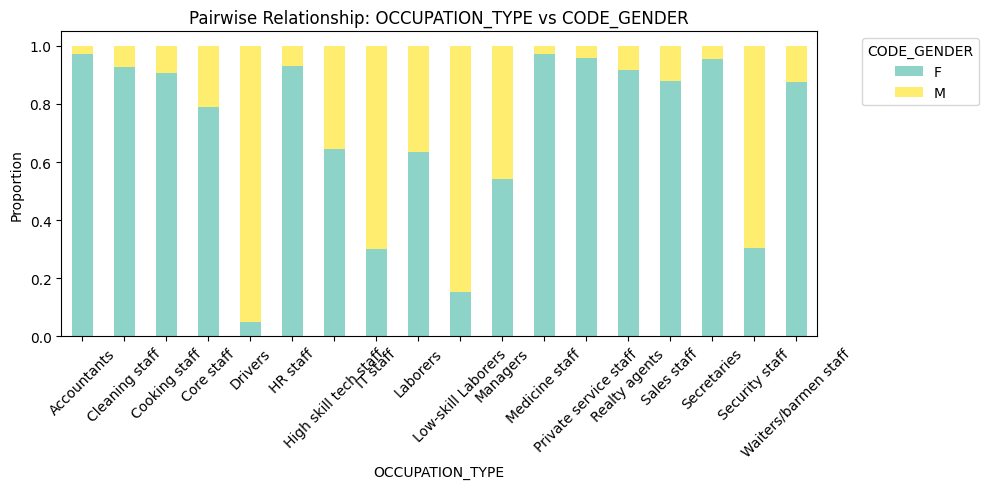

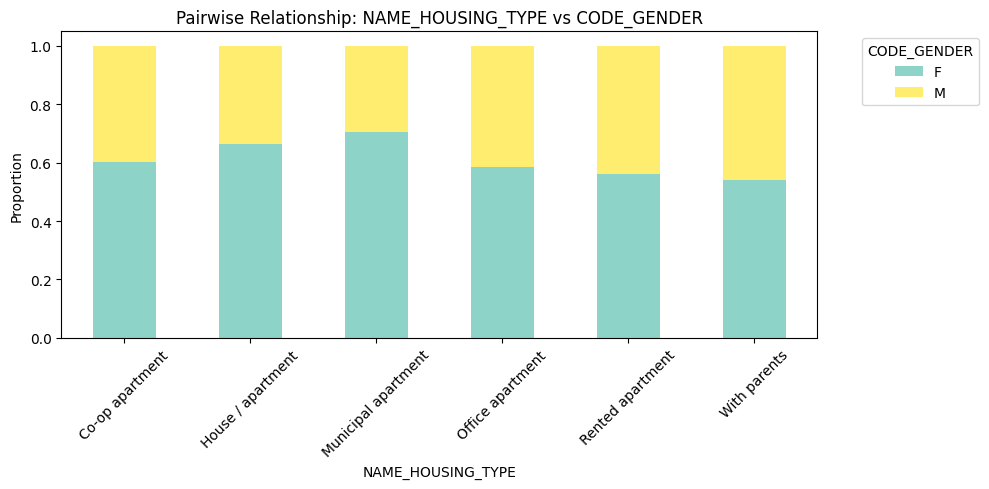

In [ ]:
# List of selected categorical variables (adjust based on relevance)
cat_cols = ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
            'NAME_HOUSING_TYPE', 'CODE_GENDER']

# Loop through all unique pairs
from itertools import combinations

for cat1, cat2 in combinations(cat_cols, 2):
    ct = pd.crosstab(df1[cat1], df1[cat2], normalize='index')  # row-wise proportion
    ct.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set3')
    plt.title(f"Pairwise Relationship: {cat1} vs {cat2}")
    plt.ylabel("Proportion")
    plt.xlabel(cat1)
    plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Observations:

Some category pairs show clear dependencies:

* NAME_CONTRACT_TYPE vs NAME_INCOME_TYPE:
Certain contract types align strongly with specific income groups.

* OCCUPATION_TYPE vs NAME_HOUSING_TYPE:
Particular occupations are more common within specific housing categories.

Other pairs appear largely independent:

* CODE_GENDER vs NAME_HOUSING_TYPE:
 Similar proportions across genders indicate minimal dependency.

**c) Between Numeric - Categorical variables**

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


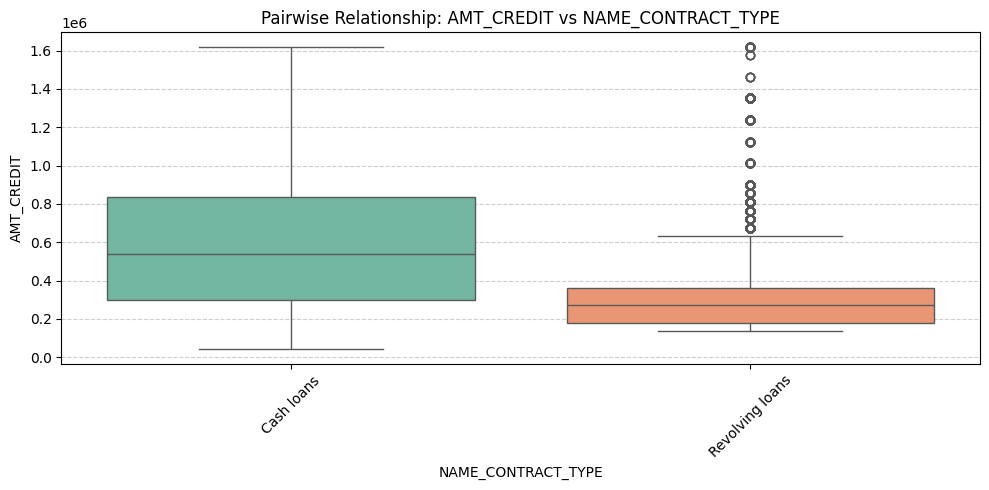

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


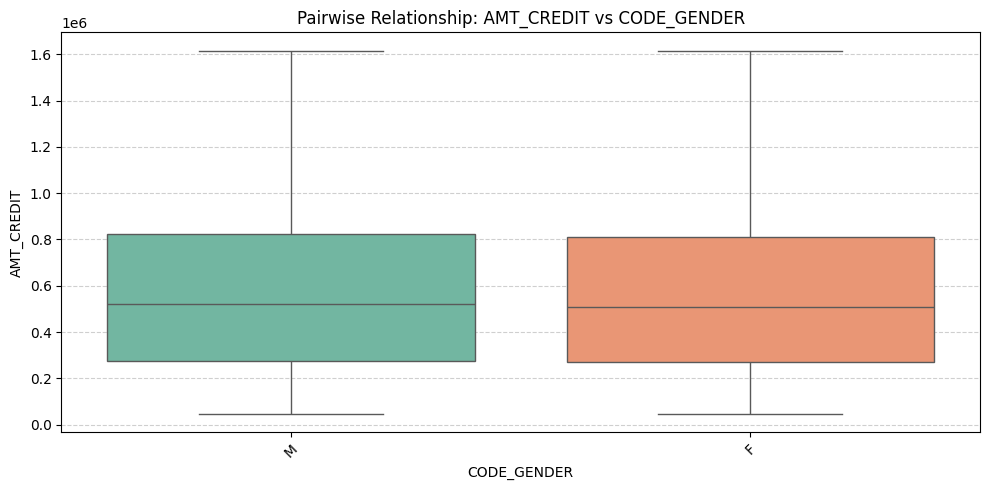

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


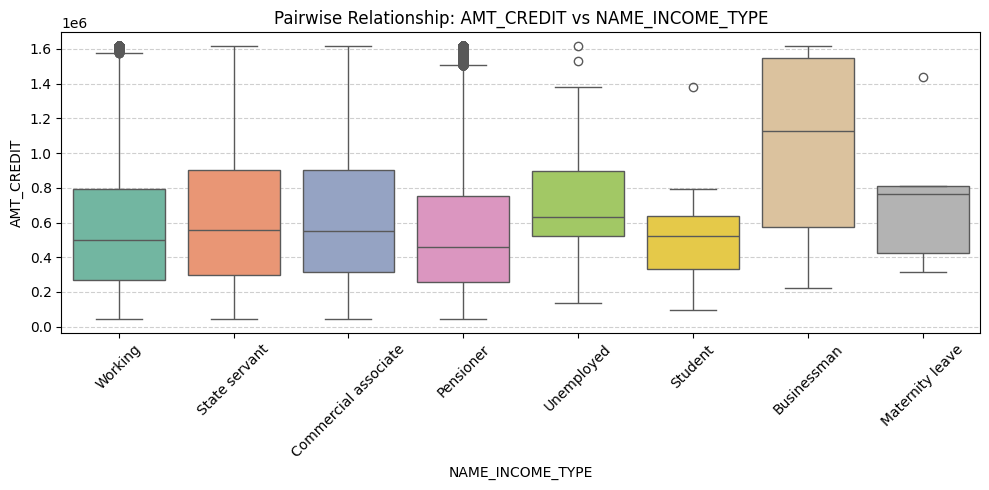

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


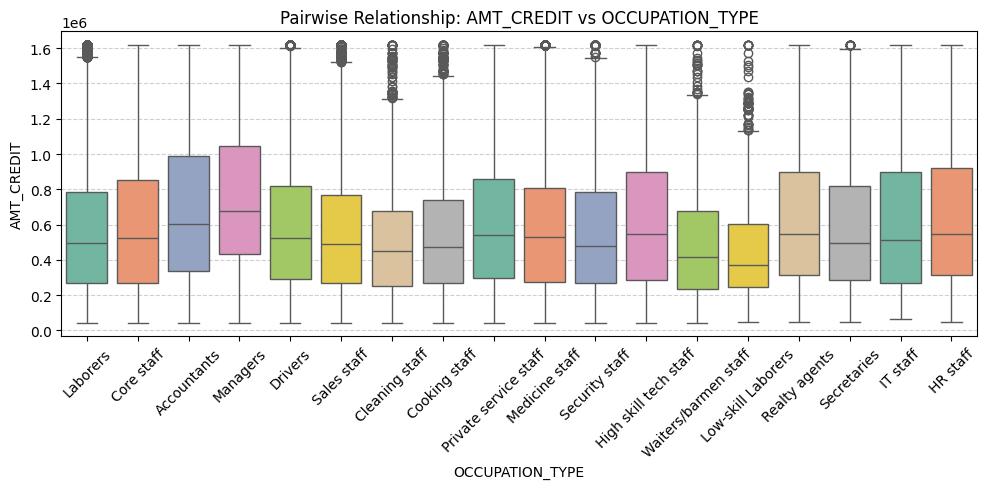

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


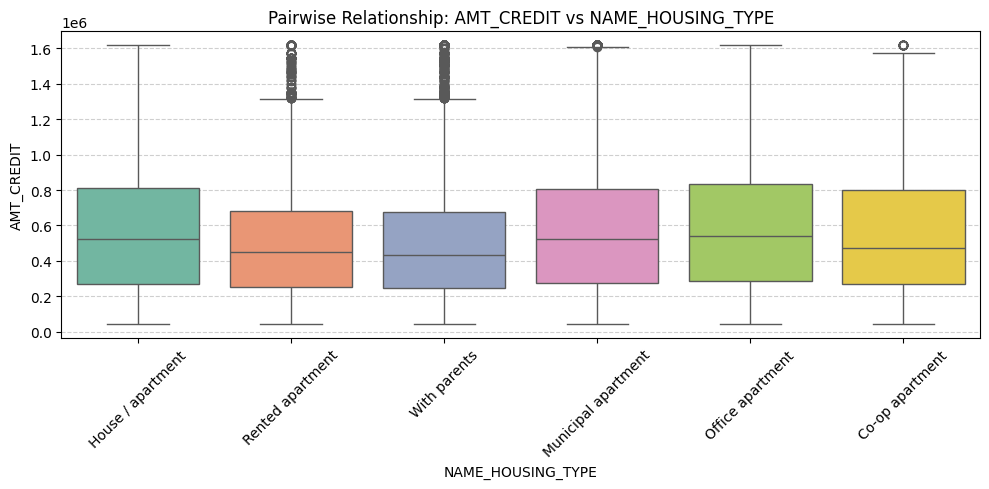

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


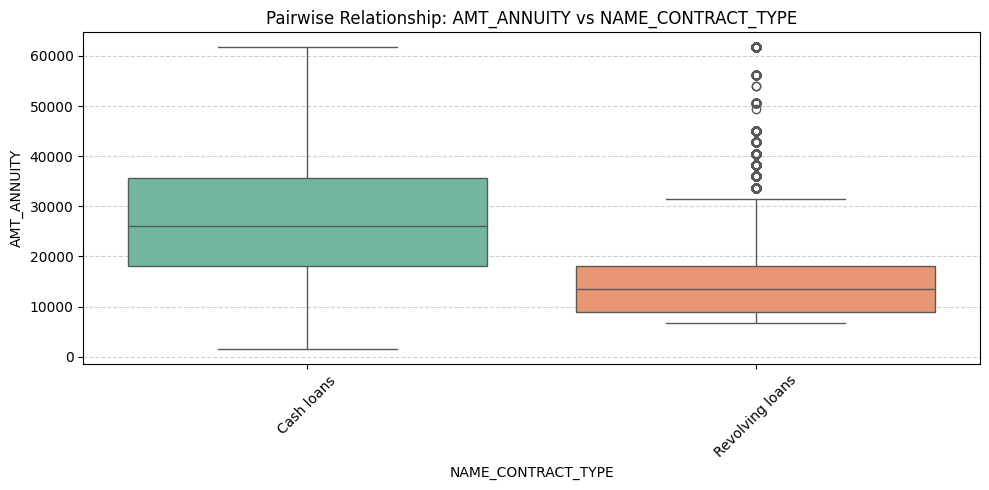

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


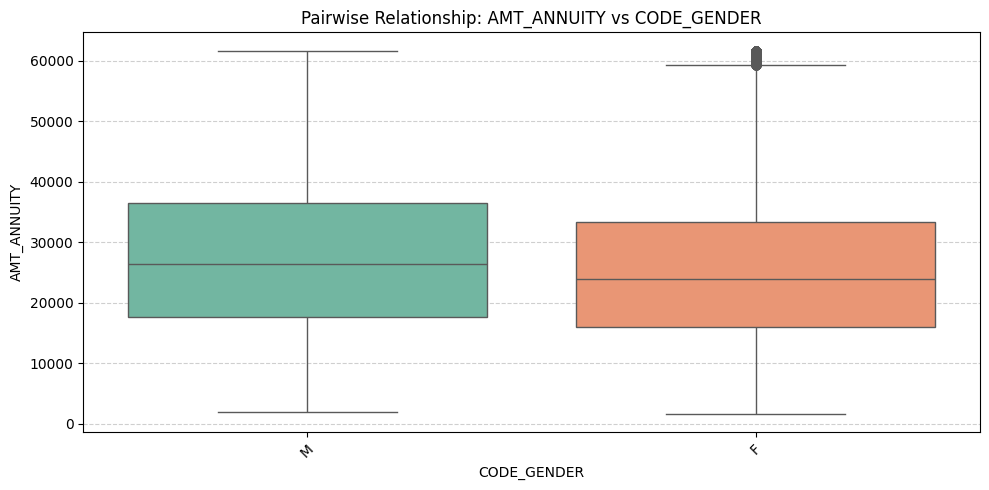

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


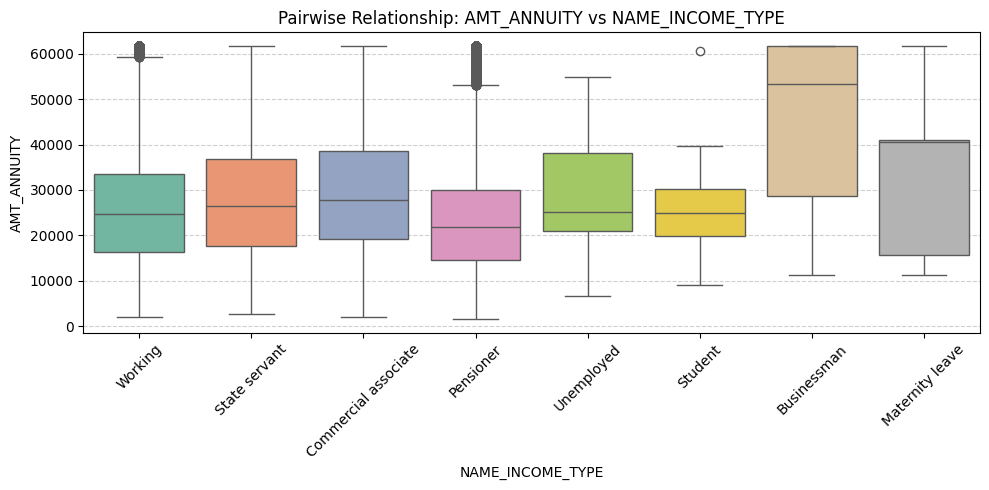

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


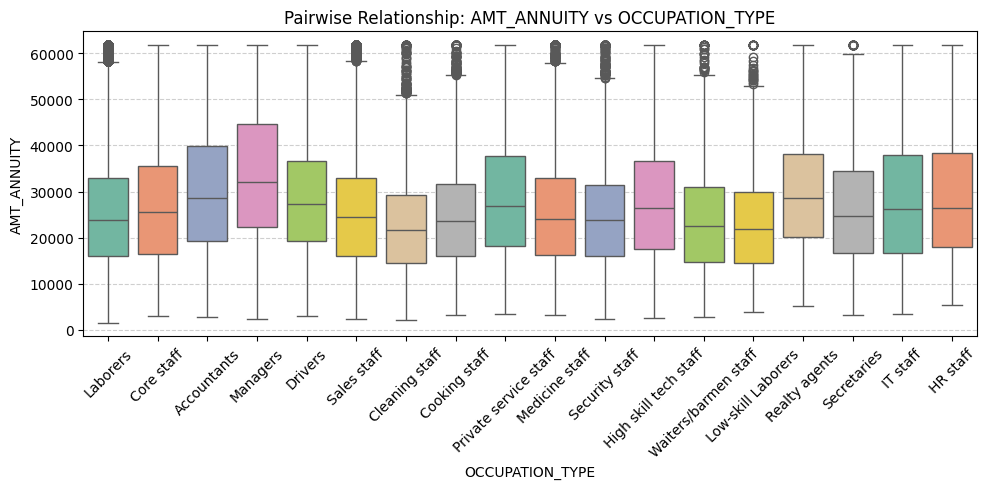

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


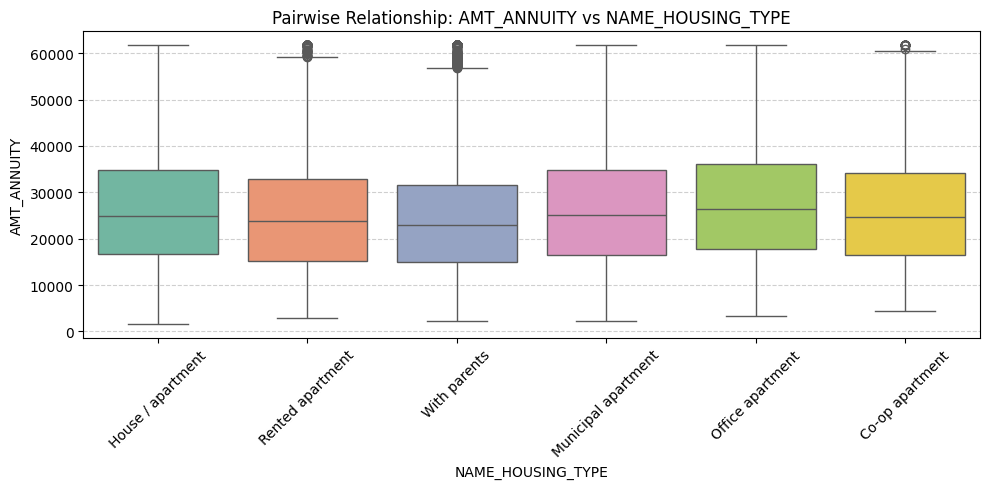

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


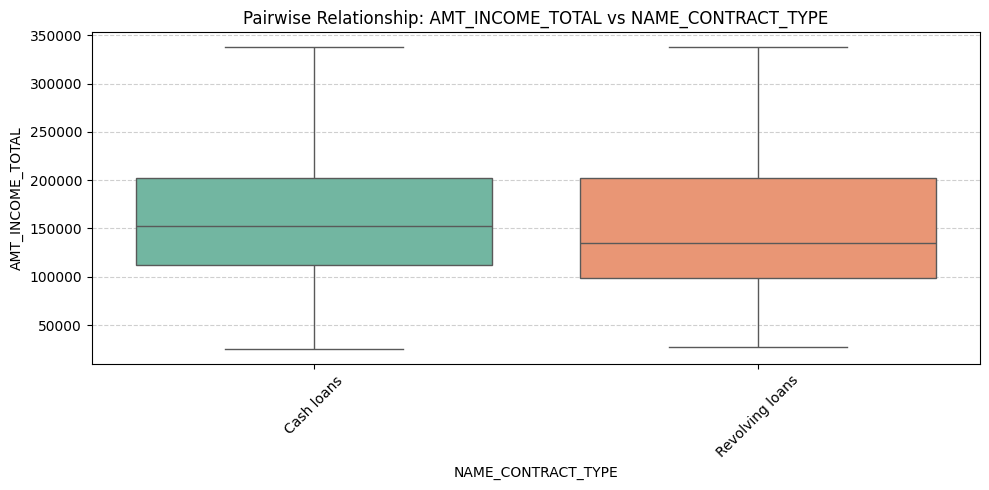

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


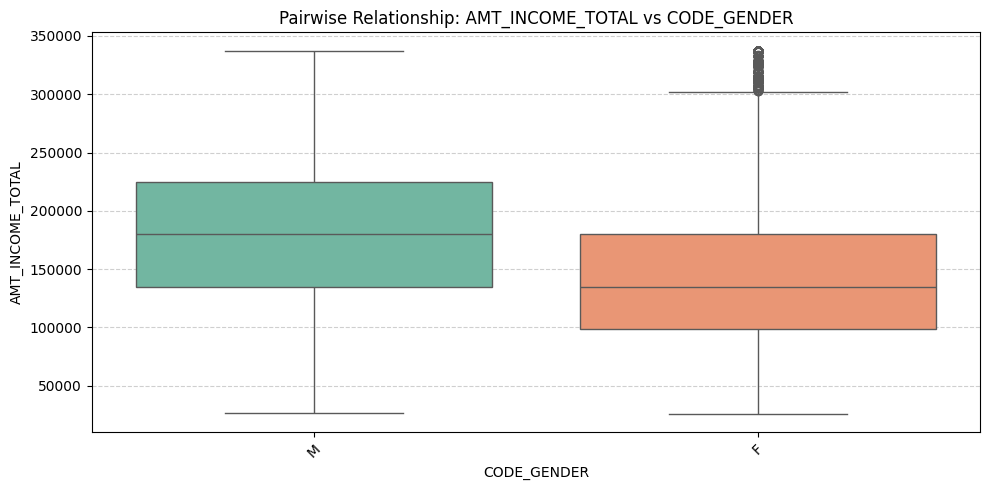

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


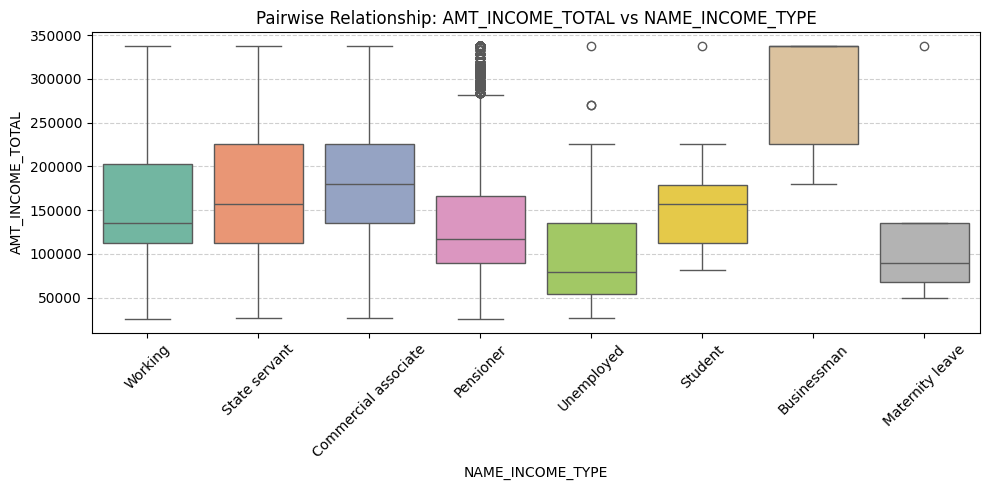

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


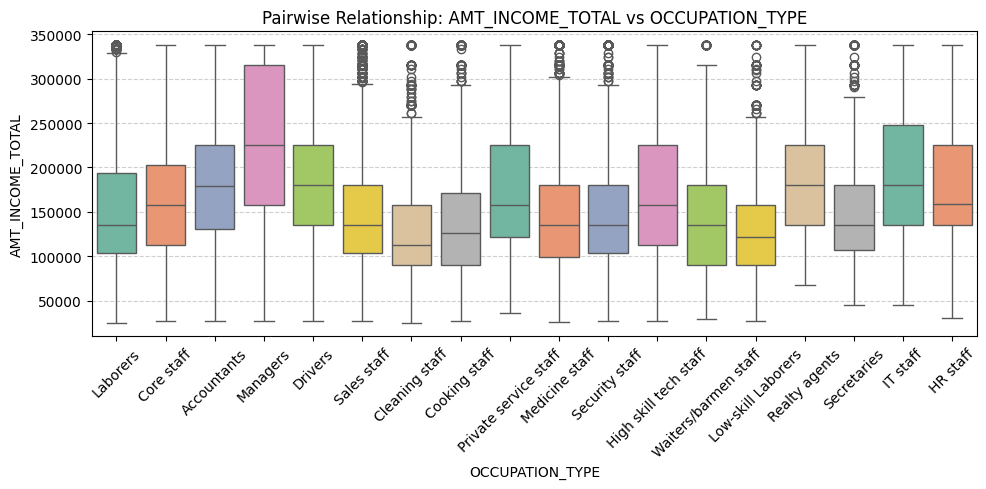

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


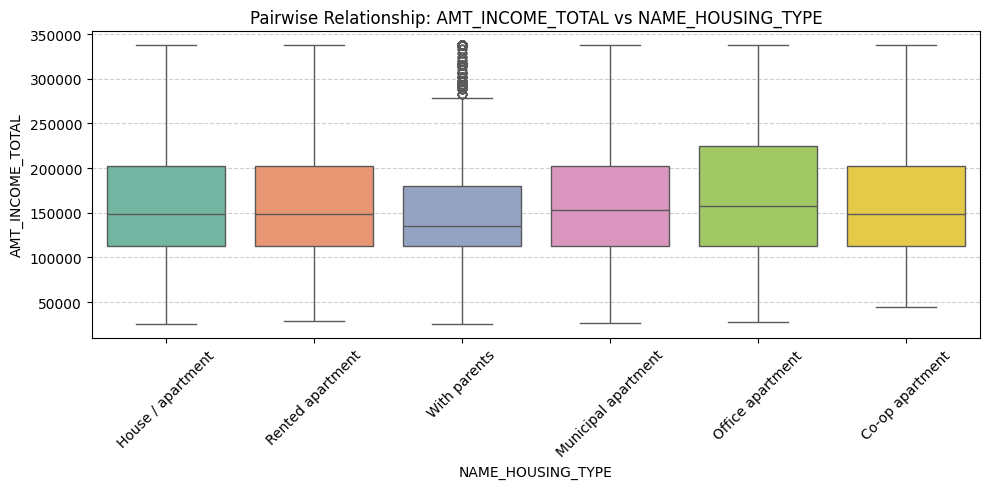

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


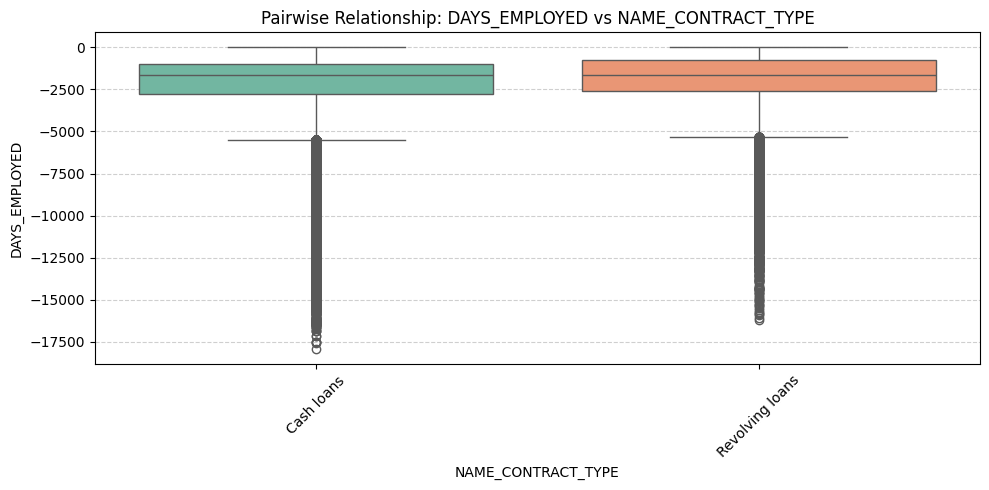

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


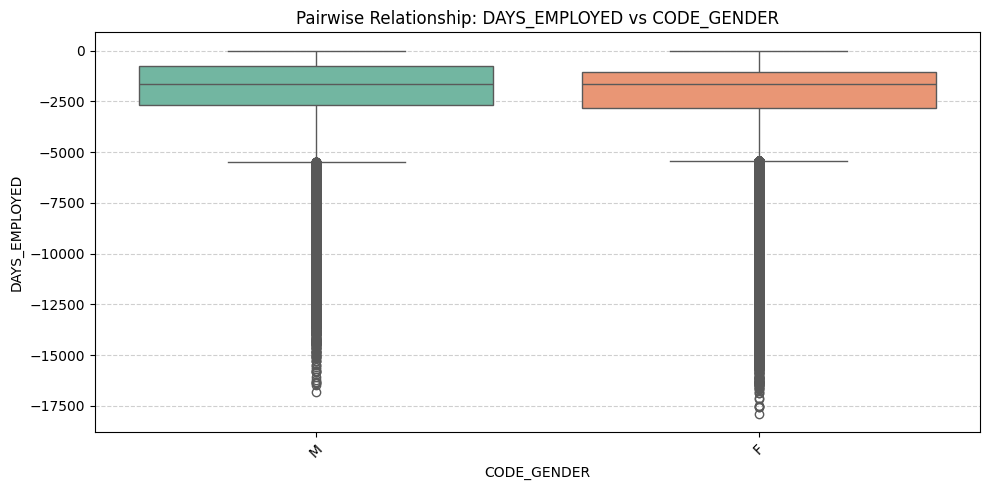

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


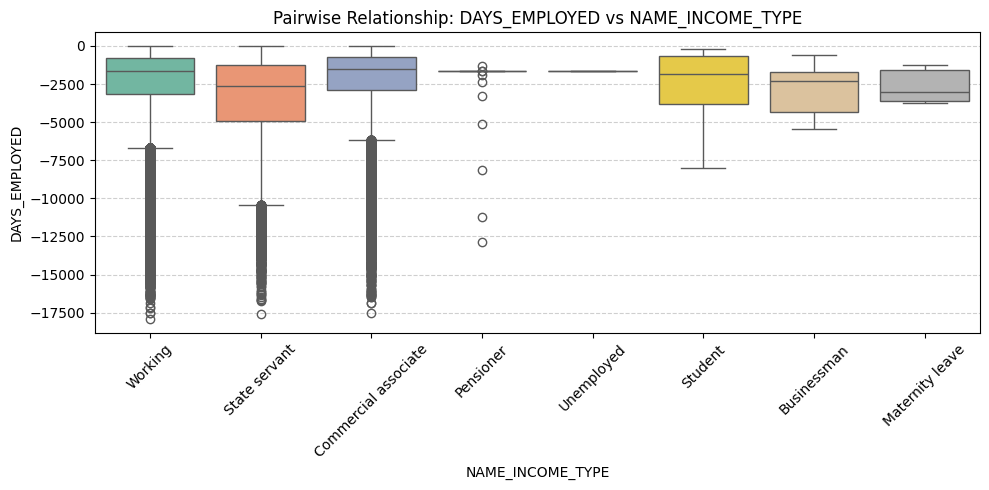

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


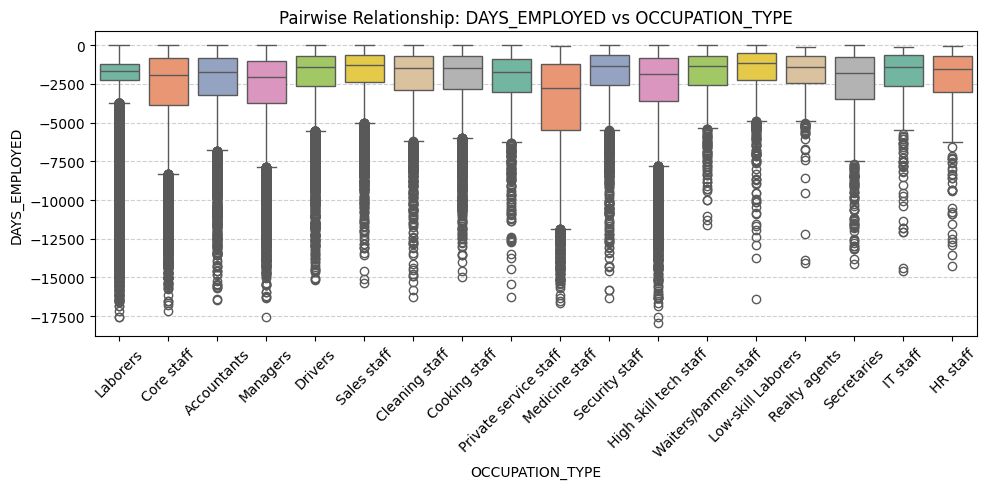

/tmp/ipython-input-4252813857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df1, palette='Set2')


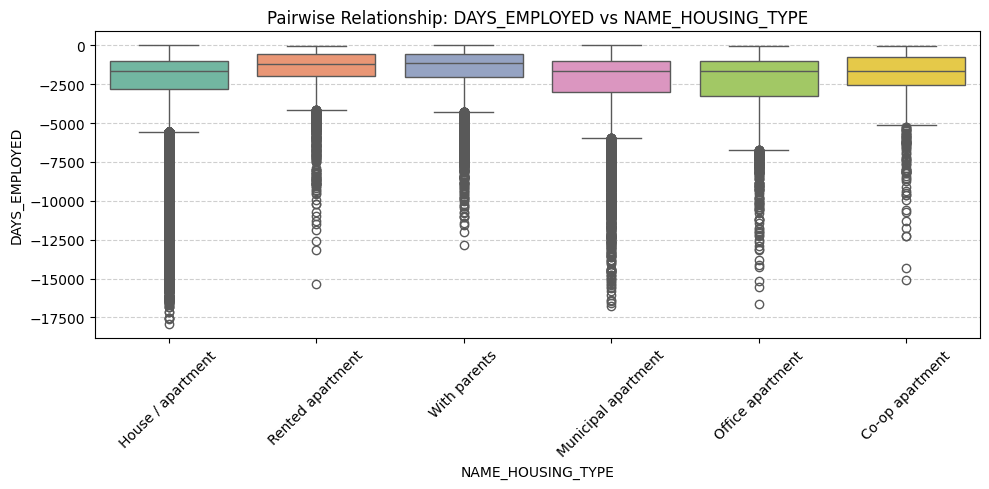

In [ ]:
# Selected numeric and categorical variables
numeric_cols = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE']

# Loop through all numeric-categorical pairs
for num in numeric_cols:
    for cat in cat_cols:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=cat, y=num, data=df1, palette='Set2')
        plt.title(f"Pairwise Relationship: {num} vs {cat}")
        plt.ylabel(num)
        plt.xlabel(cat)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


Observations:

1. Distribution differences:

>Some categories clearly have higher or lower median numeric values.

>Example: AMT_CREDIT is higher for Cash loans than Revolving loans in NAME_CONTRACT_TYPE.

2. Outliers and spread:

>Wide boxes or long whiskers indicate high variability within a category.

>Narrow boxes indicate consistent numeric values within the category.

### **3.7 Is the Dataset trustworthy?**

Overall, the dataset appears reasonable and reliable for analysis.

* It contains well-defined variables related to demographic, financial, and employment information, making it suitable for modeling credit risk or customer behavior.

* Missing values and outliers were identified and addressed during preprocessing, ensuring data quality.

* The distributions and relationships between variables are logical (e.g: higher credit amounts linked with higher annuities, older individuals having longer employment durations), which supports internal consistency.

However, a few issues still exist, such as:

* Some categorical variables may have class imbalance (e.g: few rare education or occupation categories).

* A small number of extreme outliers (e.g: in employment days or credit amount) might still reflect real-world rare cases rather than data errors.

### **3.8 Wrapping Up**


After transformations and exploratory analysis:

**1. The distributions of numerical features (like AMT_INCOME_TOTAL, AMT_CREDIT, and DAYS_EMPLOYED) showed some observable skewness, indicating the need for scaling or log transformations during modeling.**

**2. Categorical Feature Analysis:**
* Event frequency and entropy analysis revealed varying levels of diversity among categorical variables.
* Features such as NAME_CONTRACT_TYPE and NAME_INCOME_TYPE were notably skewed, indicating potential imbalance, whereas OCCUPATION_TYPE and NAME_HOUSING_TYPE displayed greater variation.
* These findings will guide encoding strategies and help ensure model fairness across categories.

**3. Periodicity and Seasonality:**
* No explicit temporal variables were present, so seasonality or periodic trends could not be evaluated.
* This confirmed that time-dependent hypotheses were not applicable to this dataset.

**4. Correlation Analysis:**
* Numeric correlations (via Pearson’s 'r') identified strong linear relationships, most notably between AMT_CREDIT and AMT_ANNUITY and highlighted largely independent features.
* Categorical correlations (using Cramér’s V) revealed dependencies such as NAME_CONTRACT_TYPE and NAME_INCOME_TYPE, while others like CODE_GENDER and NAME_HOUSING_TYPE appeared relatively independent.
* These insights informed decisions on feature redundancy and potential multicollinearity.

**5. Pairwise Relationships:**
* Visual pairplots and boxplots provided further evidence of meaningful relationships across both numeric and categorical dimensions.
* For instance, AMT_CREDIT and AMT_ANNUITY exhibited a clear linear trend, confirming that higher credit amounts are typically associated with higher annuity payments(a strong financial dependency).
* Boxplots of AMT_INCOME_TOTAL across NAME_INCOME_TYPE revealed distinct income ranges for different employment categories, highlighting structural differences among applicants.
* Similarly, stacked bar plots between OCCUPATION_TYPE and NAME_HOUSING_TYPE showed that certain occupations are more likely to correspond with specific housing situations (e.g: office workers more often live in “House / apartment”).
* These relationships helped identify dependent variable pairs and informed potential interaction features that may improve model performance.

**Impact on Hypothesis**

The initial hypothesis, that applicants with higher and more stable income and longer employment histories are less likely to default was partially supported by the data.

Numeric relationships (such as between income, credit, and annuity) confirmed that financial stability is an important predictor of credit risk.

Categorical variables like occupation and housing type also appeared related to default risk, suggesting indirect effects through socioeconomic factors.

**Key Takeaways**

* The dataset is suitable for modeling after addressing outliers, encoding, and normalization.

* Exploration revealed that financial and employment related variables (such as AMT_CREDIT, AMT_ANNUITY, AMT_INCOME_TOTAL, and DAYS_EMPLOYED) exhibit stronger relationships with potential credit risk compared to purely demographic variables (like gender or family status).

* These relationships suggest that economic stability indicators such as credit amount, income, and employment duration, are more influential predictors of default likelihood.

**Next Steps**

Moving forward, I will focus on the following actions to strengthen the modeling outcomes:

* Feature Engineering: Create interaction features combining financial and categorical attributes (e.g: income type × occupation).

* Class Imbalance Handling: Apply resampling methods (SMOTE or class weighting) to ensure balanced target learning.

* Correlation Reduction: Drop or combine highly correlated numeric variables to prevent multicollinearity.

* Model Validation: Compare logistic regression, decision tree, and ensemble methods to identify the best performing algorithm.

#**Start of project 4**

###**4.2 What kind of ML task is presented by the hypothesis, and type of learning?**

**1. ML Task Type: Classification**

The hypothesis for this project focuses on predicting whether a loan applicant is likely to default or not.
Since the target variable TARGET is binary (0 = no default, 1 = default), this is a 'Binary Classification' task
The model must assign each observation into one of two classes, default vs. non-default.

**2. Learning Type: Supervised Learning**

This is a supervised learning problem because, We have labeled dataset (TARGET is known for each client).

The goal is to learn patterns from labeled examples and generalize to new, unseen applicants.

**3. High-Level Description of What I Intend to Do:**

1. Use the cleaned training dataset to build a predictive model for credit default.

2. Split the data into training and validation sets to evaluate model performance.

3. Train multiple supervised classification models, such as:

    * Logistic Regression
    * Random Forest
    * Gradient Boosting (Eg: XGBoost, LightGBM)

4. Evaluate performance using metrics well-suited for imbalanced classification:
    * AUC-ROC
    * Precision, Recall
    * F1-score

5. Select the best model and analyze feature importance to understand which variables influence default risk.

6. Use this model to generate predictions on new or unknown data.

###**4.3 What features will I be using?**

**Deciding the features that I'm planning to use**

Credit risk problems typically rely heavily on:
Income related variables, Credit and payment amounts, Demographic stability indicators, Employment duration and External risk scores.

To maintain clarity and meet project scope, I chose 15 highly relevant features, avoiding unnecessary complexity while retaining predictive signal.

**Selected Feature Set of 15 Variables**

| Feature Name                   | Type        | Why It’s Included                                 |
| ------------------------------ | ----------- | ------------------------------------------------- |
| **TARGET** (for training only) | Binary      | Ground truth label                                |
| **AMT_INCOME_TOTAL**           | Continuous  | Measures applicant earning capacity               |
| **AMT_CREDIT**                 | Continuous  | Main loan amount requested                        |
| **AMT_ANNUITY**                | Continuous  | Debt burden relative to credit                    |
| **AMT_GOODS_PRICE**            | Continuous  | Indicates scale of purchase                       |
| **CNT_CHILDREN**               | Discrete    | Impacts household financial obligations           |
| **CNT_FAM_MEMBERS**            | Discrete    | Proxy for dependent load                          |
| **AGE_YEARS**                 | Continuous  | Age; extremely predictive in many credit datasets |
| **YEARS_EMPLOYED**              | Continuous  | Employment stability                              |
| **NAME_EDUCATION_TYPE**        | Categorical | Socio-economic indicator                          |
| **NAME_FAMILY_STATUS**         | Categorical | Household stability                               |
| **NAME_INCOME_TYPE**           | Categorical | Employment type/risk category                     |
| **NAME_HOUSING_TYPE**          | Categorical | Wealth and stability indicator                    |
| **EXT_SOURCE_2**               | Continuous  | External credit score                             |
| **EXT_SOURCE_3**               | Continuous  | External credit score                             |


####**1. Feature Engineering**


a) Categorical Variables

To prepare categorical variables for ML models, I will use **One-Hot Encoding** for:

* NAME_EDUCATION_TYPE
* NAME_FAMILY_STATUS
* NAME_INCOME_TYPE
* NAME_HOUSING_TYPE

**Why?**

To prepare the selected categorical variables for modeling, I will be applying One-Hot Encoding.
This will help converts each categorical feature into a set of binary (0/1) indicator columns, one for each category.

Using pandas get_dummies() ensures that machine learning algorithms can interpret these variables numerically.

In [ ]:
#Categorical columns to one-hot encode
categorical_cols = ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','NAME_HOUSING_TYPE']

#One-Hot Encoding
train_cleaned = pd.get_dummies(train_cleaned, columns=categorical_cols, drop_first=True)

#Check updated shape
train_cleaned.shape

(307511, 100)

b) Numerical Continuous Variables

Applying Log transformation and Scaling (StandardScaler / MinMaxScaler) for highly skewed variables listed below:

* AMT_INCOME_TOTAL
* AMT_CREDIT
* AMT_GOODS_PRICE

**Why?**

Continuous variables such as AMT_INCOME_TOTAL, AMT_CREDIT, and AMT_GOODS_PRICE are firstly evaluated for skewness to determine whether a log transformation was necessary.

Log-transforming highly skewed variables helps stabilize variance and reduces the impact of extreme values, which can improve the performance of the model.

After assessing skewness, a log transformation was applied only where skewness exceeded a threshold of 1. This prevents unnecessary transformations and preserves interpretability.

Following this, all continuous features (including any log-transformed versions) were standardized using StandardScaler, which rescales variables to have zero mean and unit variance.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler


#Checking for skewness
continuous_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

skew_results = train_cleaned[continuous_vars].skew()
print("Skewness of continuous variables:\n", skew_results)

#Applying log transformation ONLY if skew > 1

for col in continuous_vars:
    if abs(train_cleaned[col].skew()) > 1:
        train_cleaned[col + "_LOG"] = np.log1p(train_cleaned[col])
        print(f"Log transformation applied to: {col}")
    else:
        print(f"No log transform needed for: {col}")


#Scaling (via StandardScaler)
scaler = StandardScaler()

scaled_cols = [col for col in train_cleaned.columns
               if col in continuous_vars or col.endswith("_LOG")]

train_cleaned[scaled_cols] = scaler.fit_transform(train_cleaned[scaled_cols])

print("\nScaled columns:\n", scaled_cols)

Skewness of continuous variables:
 AMT_INCOME_TOTAL    0.783688
AMT_CREDIT          0.880716
AMT_GOODS_PRICE     0.845740
dtype: float64
No log transform needed for: AMT_INCOME_TOTAL
No log transform needed for: AMT_CREDIT
No log transform needed for: AMT_GOODS_PRICE

Scaled columns:
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE']


####**2. Removing Unnecessary Columns**

During preprocessing, some columns were removed from the dataset because they did not contribute meaningful information to the predictive task or had characteristics that would reduce model performance.
Columns removed earlier due to: Irrelevance, Excessive missingness, Leakage, Redundancy.

####**3. Dimensionality Reduction**

* Yes, the dimensionality of the dataset was reduced, but only through the removal of unnecessary columns identified during preprocessing.

* Columns that were irrelevant, highly missing, redundant, or potentially causing data leakage were dropped. This resulted in a cleaner feature set with fewer variables than the original 122 columns.

* However, the later preprocessing steps such as one-hot encoding, scaling, and log transformations did not reduce dimensionality. In fact, one-hot encoding increased the number of columns because each categorical variable was expanded into multiple binary indicator features.

In [ ]:
rows, cols = train_cleaned.shape

print("Number of Rows:", rows)
print("Number of Columns:", cols)
print(f"Dimensionality: {rows} x {cols}")

Number of Rows: 307511
Number of Columns: 100
Dimensionality: 307511 x 100


After preprocessing, the dataset was reduced from 122 features to 100 features, removing 22 irrelevant or redundant columns through cleaning, feature engineering, and one-hot encoding adjustments.

**Build final modeling dataframe (with encoded columns)**

To prepare the dataset for machine learning, I created a final modeling dataframe that includes only the selected 15 most relevant variables, along with their one-hot encoded categorical expansions.

This ensures the model only learns from meaningful features, makes categorical variables usable by ML algorithms, creates a clean, consistent dataset for modeling.

In [ ]:
#List of selected continuous/discrete columns
numeric_features = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'AGE_YEARS',
    'YEARS_EMPLOYED',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

#Collecting all dummy columns created from selected categorical variables
ohe_columns = [col for col in train_cleaned.columns
               if any(cat in col for cat in [
                   'NAME_EDUCATION_TYPE_',
                   'NAME_FAMILY_STATUS_',
                   'NAME_INCOME_TYPE_',
                   'NAME_HOUSING_TYPE_'
               ])]

#Adding the 'target' variable at the end
final_features = numeric_features + ohe_columns
final_features_with_target = final_features + ['TARGET']

#Creating the final modeling dataframe
model_df = train_cleaned[final_features_with_target]


In [ ]:
rows, cols = model_df.shape

print("Number of Rows:", rows)
print("Number of Columns:", cols)
print(f"Dimensionality: {rows} x {cols}")

Number of Rows: 307511
Number of Columns: 32
Dimensionality: 307511 x 32


The final dataset now contains:

10 numeric (continuous & discrete) selected features, the target variable, approximately 21 one-hot encoded columns.

This confirms successful dimensionality reduction compared to the 100+ columns in the cleaned dataset.

####**4. Assumptions of the dataset**


1. Features Are Now Fully Numeric: Because categorical variables were one-hot encoded, the dataset can be assumed to consist only of numeric and model-ready inputs.

2. Independence Between Observations: Each row represents a unique loan application, so independence between samples is a reasonable assumption. This justifies use of train/test splitting and cross-validation.

3. No Assumption of Normality Across All Features: Because the dataset contains
Income, Credit amounts, Annuities, these naturally follow skewed financial distributions, not normal distributions.
Thus, while some algorithms may benefit from transformed/standardized features, the dataset cannot be assumed to be normally distributed overall.

4. Missing Values and Outliers Have Been Adequately Addressed

5. Linear Models Can Assume Approximate Linearity for Some Features: Although the raw distributions are not perfectly linear or normal, transformations (scaling, log transforms for skewed features) bring many continuous variables closer to shapes that are suitable for some ML models.

####**5. Selected/Finalized features**

| **Feature Name**        | **Type**            | **Explanation**                                       |
| ----------------------- | ------------------- | ----------------------------------------------------- |
| **TARGET**              | *Discrete (Binary)* | Loan default indicator (0 = no default, 1 = default). |
| **AMT_INCOME_TOTAL**    | *Continuous*        | Applicant’s total income in monetary units.           |
| **AMT_CREDIT**          | *Continuous*        | Total credit amount requested.                        |
| **AMT_ANNUITY**         | *Continuous*        | Yearly loan repayment amount.                         |
| **AMT_GOODS_PRICE**     | *Continuous*        | Price of goods financed by the loan.                  |
| **CNT_CHILDREN**        | *Discrete*          | Number of children; count data.                       |
| **CNT_FAM_MEMBERS**     | *Discrete*          | Number of family members/dependents.                  |
| **AGE_YEARS**           | *Continuous*        | Age of applicant in years.                            |
| **YEARS_EMPLOYED**      | *Continuous*        | Employment duration in years.                         |
| **NAME_EDUCATION_TYPE** | *Categorical*       | Education level (e.g., Secondary, Higher, Academic).  |
| **NAME_FAMILY_STATUS**  | *Categorical*       | Marital/household status.                             |
| **NAME_INCOME_TYPE**    | *Categorical*       | Income/employment type.                               |
| **NAME_HOUSING_TYPE**   | *Categorical*       | Housing situation (e.g., Rented, Owned).              |
| **EXT_SOURCE_2**        | *Continuous*        | External credit score.                                |
| **EXT_SOURCE_3**        | *Continuous*        | External credit score.                                |


####**6. Extra Credit: Dimensionality Reduction**



To explore dimensionality reduction techniques, I applied two different methods on the modeling dataset:

**Technique 1: SelectKBest (Univariate Feature Selection)**

* Selects features based on strongest statistical relationship with the target (using ANOVA F-score).
* It evaluates each feature individually.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# X = features, y = target
X = model_df.drop("TARGET", axis=1)
y = model_df["TARGET"]

# Selecting top 15 features
selector = SelectKBest(score_func=f_classif, k=15)
X_kbest = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
selected_features

Index(['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE_YEARS', 'YEARS_EMPLOYED',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single / not married',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Working', 'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_With parents'],
      dtype='object')

The output above shows the **15 features** that have the highest statistical relationship to default risk.

* Key numeric predictors such as AMT_CREDIT, AGE_YEARS, and EXT_SOURCE scores rank very high, which is consistent with known credit-scoring patterns.

* This method preserves interpretability, since the selected features remain in their original form.

**Technique 2: PCA (Principal Component Analysis)**

* PCA transforms features into new components that capture maximum variance (95%).


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Keep 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

n_components = pca.n_components_
n_components

np.int64(22)

The output for 'PCA' indicates that the  32 feature modeling set and retained **22 principal features**, explaining ~95% of the dataset’s variance.

**Which technique was better, and why?**

Between the two dimensionality-reduction methods, **SelectKBest** performed better.

* It reduced the feature set from 32 to 15 while still preserving full interpretability.
* Each selected feature remains meaningful and directly usable for model insights. This is important in credit-risk modeling, where transparency and explainability matter.

* In contrast, PCA preserved the variance and reduced the dataset to 22 components.
* These features were linear combinations of the original variables.
* These components are less interpretable and therefore less suitable for explaining real world credit-risk requirements.

**Drawbacks:**

* SelectKBest may miss interactions between features because it evaluates each feature independently.

* PCA loses interpretability and may not be ideal for models that require clear feature meanings.

**What are the benefits of Reducing Dimensionality?**

* Improves model performance when redundant or noisy features are removed.
* Decreases risk of overfitting, especially in tree based and linear models.
* Reduces model complexity which ulimately results in faster training and less memory usage.
* Helps algorithms that struggle with high dimensions (SVM, Logistic Regression, KNN).
* Makes the interpretation simple (especially with SelectKBest).

**Note:**

Because the final feature set is small, interpretable, and domain-relevant, dimensionality-reduction techniques (PCA and SelectKBest) were intentionally not applied, and the model proceeds using the 32 selected features.

However, I plan on exploring Dimensionality reduction at later stages if model performance plateaus.

###**4.4 Algorithm Details**

####**1. Algorithm Choice**

For this project, I plan to use  Random Forest  as the initial modeling approach.

This is a well-established supervised learning technique that is appropriate for classification tasks

####**2. Assumptions of the Algorithm**

Random Forest is a tree-based algorithm and unlike linear models, it operates with very few strict statistical assumptions.
This makes it especially suitable for real-world tabular data such as this credit-risk dataset.

Below are the key assumptions and considerations:

**1. No Assumption of a Specific Data Distribution**

Random Forest does not assume that:

* The features follow a normal distribution
* The relationship between features and the target is linear
* The variance is constant
* Data is standardized or scaled

This is beneficial because many of our variables (AMT_INCOME_TOTAL, AMT_CREDIT, AGE_YEARS) are highly skewed, and several categorical variables were one-hot encoded.

**2. Robust to Outliers**

Random Forest generally does not assume the absence of outliers.
Decision trees split based on thresholds, so extreme values do not significantly distort model training.

Therefore,
* Outliers are not required to be removed
* The model is still stable if they exist

This aligns well with my dataset, where income, credit, and price features may include natural outliers.

**3. No Requirement for Feature Independence**

Random Forest does not require features to be independent of each other.

It functions well even when,
* Features are correlated
* One-hot encoding introduces multicollinearity
* Some variables overlap in meaning (credit vs. goods price)

While correlated features may influence the feature importance ranking, they do not harm the predictive ability of the model.

**4. Requires a Reasonable Sample Size**

Random Forest performs best when,
* The dataset is moderately large
* Many samples are available to form diverse trees

This ensures, stable tree splits, reduced variance and lower overfitting risk.

Our dataset contains over 300,000 observations, which is more than sufficient.
Hence, our sample size supports the algorithm’s assumptions.

**5. Assumes Sufficient Variability in Features**

Random Forest needs, features with meaningful variation.

All selected features (income, credit amount, risk attributes, categorical encodings, etc.) show adequate variance and therefore meet this assumption.

####**3. Potential Issues with Random Forest & Mitigations**



**1. Risk of Overfitting (Especially with Many Trees or Deep Trees)**

While Random Forest reduces overfitting compared to a single decision tree, it can still overfit when:

* Individual trees are allowed to grow too deep
* Noisy or highly correlated features dominate the splits

**Mitigation**

* Limit tree depth (max_depth)
* Increase minimum samples per leaf (min_samples_leaf)
* Tune number of trees (n_estimators)
* Use cross-validation to check generalization performance

**2. Biased Feature Importance Toward Continuous/ High-Cardinality Features**

Random Forest tends to assign:
* Higher importance to continuous variables
* Lower importance to binary and one-hot features

This is important because my dataset includes many one-hot encoded categorical variables.

**Mitigation**

* Use permutation importance instead of built-in Gini importance
* Consider SHAP values for more accurate interpretability

**3. Computationally Expensive with Large Datasets**

Random Forest requires:
* Training hundreds of trees
* Scanning large datasets repeatedly

With 300,000 rows and 30+ features, training can be time consuming.

**Mitigation**

* Set a reasonable number of estimators (n_estimators=100 to 300)
* Use balanced subsampling (max_samples or bootstrap=True)
* Use parallel processing (n_jobs=-1)

**4. Sensitive to Class Imbalance**

Your dataset has imbalanced "TARGET" values, so Random Forest may:

* Predict the majority class too often
* Produce poor recall for the minority class

**Mitigation**

1. Use class weights (class_weight="balanced")
2. Resample using SMOTE (optional)
3. Use ROC-AUC or F1 instead of accuracy

####**4. Hyperparameters for Random Forest & How They Will Be Tuned?**

**1. "n_estimators" (Number of trees in the forest)**

What it does: More trees indicates more stable predictions but slower training.

**Tuning approach:**

* Start with 100 trees (common baseline).
* Use cross-validation (GridSearchCV or RandomizedSearchCV) to test values such as [100, 200, 300, 500].

**My current choice:**

 Likely 200 – 300 based on performance vs. runtime.


---



**2. "max_depth" (Maximum depth of each tree)**

What it does: Prevents trees from growing too deep and overfitting.

**Tuning approach:**

* Try values like [None, 5, 10, 15, 20].
* Use validation scores (ROC-AUC) to choose an optimal point.

**My current Choice:**

 10–15 Usually gives strong generalization on structured/tabular data.


---



**3. "min_samples_split" & "min_samples_leaf"**

* min_samples_split (minimum samples to split a node)
min_samples_leaf (minimum samples per leaf node)

What they do: Control tree size, prevent overfitting, smooth decision boundaries.

**Tuning approach:**

Test ranges:
* min_samples_split: [2, 5, 10]
* min_samples_leaf: [1, 2, 4, 8]

**My current choice:**

 min_samples_leaf = 2 or 4, often improves recall for minority class.


---



**4. max_features (Number of features tested at each split)**

What it does: Increases randomness, which reduces correlation between trees that ulimately improves generalization.


**Tuning approach:**

Options like 'sqrt', 'log2', or a fraction like 0.3 or 0.5


**My current choice:**

'sqrt' (default) works very well for classification.


---



**5. class_weight (Handling class imbalance)**

What it does: Makes the model pay more attention to the minority class.

**Tuning approach:**

* Primary choice: "balanced"
* Based on imbalance of TARGET values.

**My current choice:**

Set to "balanced" for better recall on defaulted cases.


---



**6. bootstrap (Whether samples are drawn with replacement)**

What it does: Controls how trees sample data.

**Tuning approach:**

Try True (default) vs False.

**My current choice:**

'True' is preferred unless testing extremely large ensembles.


---



###**4.5 Post Processing Techniques**

Since I am using a Random Forest Classifier, traditional post-processing techniques such as post-pruning that are commonly applied to single Decision Trees are generally not necessary.

**Why post-pruning is not needed:**

* A Random Forest already prevents overfitting by combining multiple trees trained on different subsets of data.

* Each tree is usually grown fully (without pruning), and model stability comes from ensemble averaging.

* Pruning individual trees does not typically improve ensemble performance and may reduce predictive power.

###**4.6  ML Model**

**Explaining what I'm planning to through the code:**

**1. Prepare features and target**

  * X contains all selected input features and y is the binary TARGET.

  * I'm doing a quick imputation step for any remaining numeric missing values (median) so the Random Forest can train without errors.

**2. Train/test split**

  * The data is split into training (80%) and test (20%) sets using train_test_split.
  * stratify=y will help preserve the class ratio (important as we have imbalanced targets).
  * random_state=42 will ensure reproducibility.

**3. Model instantiation**

  * A RandomForestClassifier is created with practical defaults tuned for tabular data:
    * n_estimators=200
    * max_depth=15
    * min_samples_leaf=2
    * max_features='sqrt'
  * class_weight='balanced' compensates for the skewed default/non-default distribution.

**4. Fit the model**

  * The model learns patterns from X_train / y_train.

**5. Predict and evaluate**

  * Predictions are made on the hold-out X_test.
  * The code prints accuracy on the test set (accuracy_score)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#Sanity check, just to ensure `model_df` exists
try:
    model_df
except NameError:
    raise NameError("model_df not found. Make sure you have created model_df (final modeling dataframe).")

#Prepare X (features) and y (target)
X = model_df.drop(columns=['TARGET'])
y = model_df['TARGET']

#RandomForest can handle NaNs poorly, hence ensuring no NaNs remain
if X.isnull().any().any():
    # numeric imputer: median
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    imp = SimpleImputer(strategy='median')
    X[num_cols] = imp.fit_transform(X[num_cols])
    # for safety filling any remaining object cols with a placeholder (shouldn't be necessary)
    obj_cols = X.select_dtypes(include=['object']).columns
    if len(obj_cols) > 0:
        X[obj_cols] = X[obj_cols].fillna('MISSING')

#Train / test split -- Use stratify=y to preserve class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

#Instantiate the Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

#Fitting the model
rf.fit(X_train, y_train)

#Making predictions on the test set
y_pred = rf.predict(X_test)

#Printing accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nTest set accuracy: {acc:.4f}")


Train shape: (246008, 34) Test shape: (61503, 34)

Test set accuracy: 0.8152


**Key Takeaways from the output:**

* The Random Forest classifier achieved a test accuracy of 0.8152 (81.52%). This means the model correctly predicts the loan status for approximately 81% of previously unseen samples.

* For an initial baseline model, without heavy hyperparameter tuning this seems to be reasonable performance.

* It indicates that the selected features (including the EXT_SOURCE variables, financial variables, and key categorical encodings) provide meaningful predictive value.

* However, accuracy alone is not a reliable metric for credit risk prediction, because the “non-default” class usually dominates the dataset.
  * High accuracy may still hide weaknesses such as: low recall for the minority (default) class, predicting the majority class too often, misclassifying applicants who pose higher credit risk.

  * This will be addressed in later evaluation stages (precision, recall, F1, ROC-AUC).

**How I plan on improving the performance of the model (Next Steps):**

**1. Evaluate Class-Imbalance Metrics:**

Analyse other parameters such as-
* Precision and Recall for the default class
* F1 score
* ROC-AUC

This will reveal whether the model is performing well on the class that matters most (defaults).

**2. Hyperparameter Tuning**

Use RandomizedSearchCV or GridSearchCV to tune:
* max_depth
* n_estimators
* min_samples_split
* min_samples_leaf
* max_features

**3. Try More Algorithms (for comparison)**

* Gradient Boosting (XGBoost, LightGBM, CatBoost)
* Logistic Regression (for interpretability)
* Support Vector Machines (for non-linear boundaries)

#**Start of Project 5**

###**5.2 Evaluating the ML Model**

####**1. The Metrics I plan on evaluating are:**



**1. Confusion Matrix**

  * This shows us true positives, true negatives, false negatives and false positives.

  * Important because default prediction has uneven costs such as,

      1. Missing a risky borrower = high financial loss

      2. Incorrectly classification of a safe borrower = less severe

  * Helps understand where the model fails.

**2. Precision and Recall**

  * Recall is crucial for the positive/default class as it measures how many risky clients we correctly identified.

  * Precision tells us how many predicted defaults were actually defaults.

**3. F1 Score**

  * This is the 'Harmonic mean' of the precision and recall.

  * F1 is helpful in credit datasets as they are imbalanced (because very few people default), and accuracy alone is misleading.

  * F1 will help us identify how well the model is performing on the minority class (defaulters) without being fooled by the majority class (non-defaulters).

**4. ROC-AUC**

  * Measures how well the model separates good vs bad borrowers at all thresholds and not just one (So it gives a more complete picture of how well the classifier separates the classes).

  * This is extremely standard in financial risk modeling.

**Firstly I will obtain the metrics from my original chosen model, "Random Forest"**


Performance Metrics for Random Forest (Initial Approach): 

Accuracy:                0.8152
Precision:               0.2016
Recall:                  0.4356
F1 Score:                0.2756
ROC-AUC (Test Set):      0.7302

-----------------------------------------------------

Confusion Matrix:
[[47972  8566]
 [ 2802  2163]]

Number of False Negatives (FN): 2802 

-----------------------------------------------------


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     56538
           1       0.20      0.44      0.28      4965

    accuracy                           0.82     61503
   macro avg       0.57      0.64      0.58     61503
weighted avg       0.88      0.82      0.84     61503



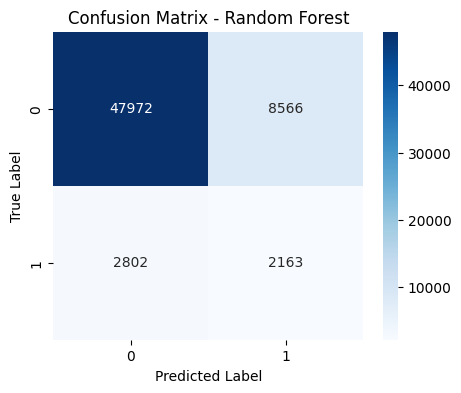

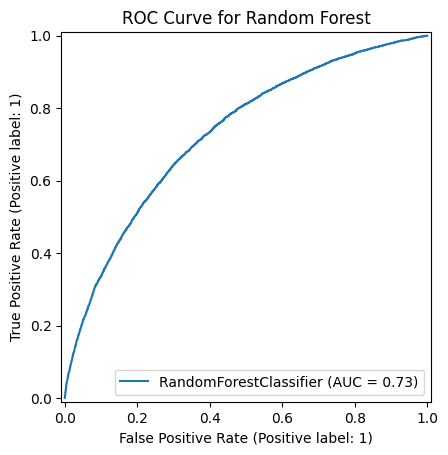


Cross-Validated ROC-AUC scores (5-fold):
[0.72661391 0.7266641  0.71973816 0.72652458 0.73138831]

Mean CV ROC-AUC:         0.7262
Std Dev CV ROC-AUC:      0.0037


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nPerformance Metrics for Random Forest (Initial Approach): \n")
print(f"Accuracy:                {acc:.4f}")
print(f"Precision:               {prec:.4f}")
print(f"Recall:                  {rec:.4f}")
print(f"F1 Score:                {f1:.4f}")
print(f"ROC-AUC (Test Set):      {roc_auc:.4f}")

print("\n-----------------------------------------------------\n")

#Confusion Matrix (Numeric Values)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Extract FN (Critical in credit risk)
TN, FP, FN, TP = cm.ravel()
print(f"\nNumber of False Negatives (FN): {FN} ")

print("\n-----------------------------------------------------\n")

#Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#Heatmap of Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve for Random Forest")
plt.show()

#Cross-Validated ROC-AUC (More Reliable)
cv_scores = cross_val_score(
    rf, X, y,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

print("\nCross-Validated ROC-AUC scores (5-fold):")
print(cv_scores)
print(f"\nMean CV ROC-AUC:         {cv_scores.mean():.4f}")
print(f"Std Dev CV ROC-AUC:      {cv_scores.std():.4f}")


**Understanding the output: Random Forest (Original Approach)**


1. **Overall Accuracy = 0.8152**

  * The model achieves **an accuracy of 81.52%, but accuracy is not a reliable indicator** as the datset is highly imbalanced.

  * Because the dataset contains far more non-defaults (class 0) than defaults (class 1), the model can classify most borrowers as “safe” and still achieve high accuracy.



---



2. **ROC-AUC = 0.7302**

  * A ROC-AUC of **0.73** means the model can **somewhat** tell good borrowers apart from risky ones, but not very strongly.

  * For real credit risk decisions, we need a much higher ability to separate these groups, so **0.73 is not good enough**.

  * This middling score likely happens because the dataset is **imbalanced** and some features may be **noisy or not very predictive**, which makes it harder for the model to learn strong patterns.


---



3. **Recall for Class 1 (Defaulters) = 0.4356**

  * The model identifies **only about 43% of actual defaulters**, meaning it misses more than half of the risky borrowers.

  * In credit scoring, this is problematic because missed risky borrowers (false negatives) can directly lead to financial losses.

  * Again, the low recall occurs mainly because the **dataset is imbalanced**, so the model leans toward predicting the majority class (0).

  * Additionally, without techniques like class weighting or resampling, even strong models like Random Forest tends to optimize overall accuracy rather than correctly detecting the rare default cases.



---



4. **F1 Score for Class 1 = 0.2756**

  * An F1 score of 0.2756 indicates **weak balance between precision and recall** for the minority class.

 * This means the model does not reliably identify defaulters and does not produce high-quality (correct) positive predictions.

  * The model is **not capturing meaningful patterns for class 1**, a common issue in imbalanced credit datasets.



---



5. **Precision for Class 1 = 0.2016**

  * Precision of 20.2%% means that when the model predicts a borrower to be risky, it is correct only about 1 in 5 times.

  * Although the model **does catch some true defaults (2163)**, it also **produces many false alarms (8566 false positives)**.

  * This is problematic because it may lead to:
    * Unnecessary loan denials to good customers
    * Reduced customer satisfaction.

---

6. **Confusion Matrix**

```
    [[47972  8566]
    [ 2802  2163]]
```


  * **True Negatives = 47972**:
  The model is strong at identifying good borrowers correctly.

  * **False Positives = 8566**:
  A large number of good borrowers are incorrectly flagged as risky.

  * **True Positives = 2163**:
  These are actual defaulters detected correctly.

  * **False Negatives = 2802**:
  The model misses a substantial number of actual risky borrowers.

  * **Overall**: The model performs well on class 0 but struggles significantly with class 1.

---

7. **Number of False Negatives = 2802**

  * These are borrowers who actually defaulted but were incorrectly predicted as safe.

  * In credit scoring, this is the **costliest type of error** because it means granting loans to high-risk clients.

  * The high number of false negatives shows that the model is still missing too many defaulters, and improving recall should be a priority.

---

8. **Cross-Validated ROC-AUC (Mean) = 0.7262**

  * The mean cross-validated AUC of 0.73 shows that the model performs consistently when tested on different portions of the data.

  * Although it demonstrates some ability to separate good vs. risky borrowers, this level of performance is still not strong enough for high-accuracy financial decision-making.


#####**i. My plan to improve the model**



**1. Adding Class Weights (Balanced Weights)**

* The dataset is highly imbalanced, with far more “safe” borrowers than “defaulting” borrowers. As a result, the model tends to favor the majority class.
* To counter this, I added class_weight='balanced' to the Random Forest algorithm. This automatically scales up the importance of default cases so the model pays more attention to them.
* This adjustment typically increases recall for the minority class, helping reduce false negatives.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',  # <-- Added change
    random_state=42,
    n_jobs=-1
)

rf_balanced.fit(X_train, y_train)
y_pred_bal = rf_balanced.predict(X_test)
y_proba_bal = rf_balanced.predict_proba(X_test)[:,1]


**2. Threshold Tuning**

* The default classification threshold in most models is 0.5.
* However, for credit scoring, this is not always optimal because we want to catch as many defaulters as possible.
* To improve recall, I tuned the decision threshold by evaluating several probability cutoffs and selecting the one that maximizes the F1 score (or recall).
* Lowering the threshold typically increases recall and reduces false negatives.

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.6, 0.02)
best_thresh = 0.5
best_f1 = 0

for t in thresholds:
    preds_t = (y_proba_bal >= t).astype(int)
    score = f1_score(y_test, preds_t)
    if score > best_f1:
        best_f1 = score
        best_thresh = t

print("Best threshold:", best_thresh)
print("Best F1 at that threshold:", best_f1)

y_pred_thresh = (y_proba_bal >= best_thresh).astype(int)


Best threshold: 0.5000000000000001
Best F1 at that threshold: 0.27564674397859057


**3. Warm-Start Hyperparameter Optimization (Fast Random Forest Tuning)**

* RandomizedSearchCV was too slow for my dataset because Random Forest requires training hundreds of trees multiple times during cross-validation.

* To speed this up, I used warm-start tuning, a method where the model reuses previously learned trees instead of retraining from scratch

* I tuned the key hyperparameter n_estimators (number of trees) and evaluated each version using ROC-AUC.
The model with the highest AUC was selected as the optimized Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def warm_start_rf_tuning(X_train, y_train, X_test, y_test):
    best_auc = 0
    best_model = None
    results = []

    #For different sizes of the forest
    n_tree_list = [100, 200, 300, 400]

    for n_trees in n_tree_list:
        print(f"\nTraining Random Forest with {n_trees} trees...")

        rf = RandomForestClassifier(
            n_estimators=n_trees,
            warm_start=True,
            max_depth=15,
            min_samples_leaf=2,
            max_features='sqrt',
            class_weight='balanced',
            n_jobs=-1,
            random_state=42
        )

        #to fit the model
        rf.fit(X_train, y_train)

        #evaluate using ROC-AUC
        y_proba = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)

        print(f"AUC with {n_trees} trees: {auc:.4f}")

        results.append((n_trees, auc))

        if auc > best_auc:
            best_auc = auc
            best_model = rf

    print("\nBest model found:")
    print(f"n_estimators: {best_model.n_estimators}, AUC: {best_auc:.4f}")

    return best_model, results


best_rf, tuning_results = warm_start_rf_tuning(X_train, y_train, X_test, y_test)

#best model
y_pred_rf_opt = best_rf.predict(X_test)
y_proba_rf_opt = best_rf.predict_proba(X_test)[:, 1]

print("\nOptimized Random Forest predictions generated.")



Training Random Forest with 100 trees...


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


AUC with 100 trees: 0.7290

Training Random Forest with 200 trees...


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


AUC with 200 trees: 0.7302

Training Random Forest with 300 trees...


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


AUC with 300 trees: 0.7303

Training Random Forest with 400 trees...


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


AUC with 400 trees: 0.7305

Best model found:
n_estimators: 400, AUC: 0.7305

Optimized Random Forest predictions generated.


#####**ii. Understanding how the changes have impacted the performance**

**Re-evaluating the metrics:**


Performance Metrics for Improved Random Forest: 

Accuracy:                0.8152
Precision:               0.2019
Recall:                  0.4363
F1 Score:                0.2760
ROC-AUC (Test Set):      0.7305

-----------------------------------------------------

Confusion Matrix:
[[47974  8564]
 [ 2799  2166]]

Number of False Negatives (FN): 2799 

-----------------------------------------------------


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     56538
           1       0.20      0.44      0.28      4965

    accuracy                           0.82     61503
   macro avg       0.57      0.64      0.59     61503
weighted avg       0.88      0.82      0.84     61503



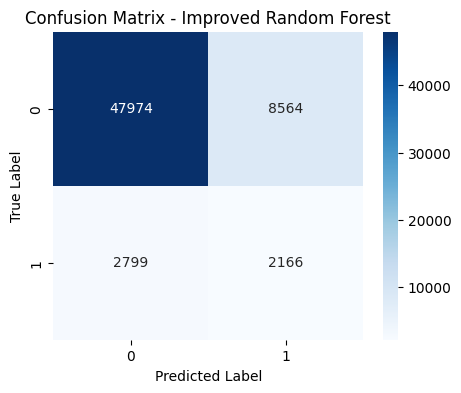

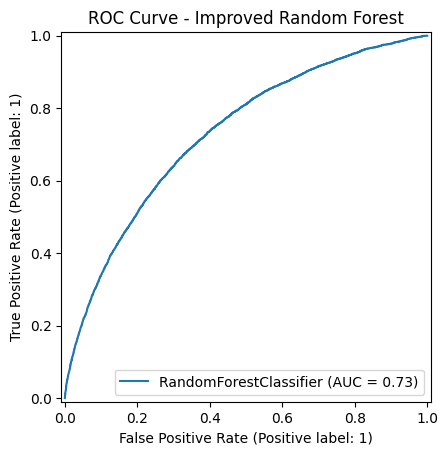


Cross-Validated ROC-AUC scores (5-fold):
[0.72742668 0.72712333 0.72036794 0.72624021 0.73182711]

Mean CV ROC-AUC:         0.7266
Std Dev CV ROC-AUC:      0.0037


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns

y_pred = y_pred_rf_opt
y_proba = y_proba_rf_opt

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nPerformance Metrics for Improved Random Forest: \n")
print(f"Accuracy:                {acc:.4f}")
print(f"Precision:               {prec:.4f}")
print(f"Recall:                  {rec:.4f}")
print(f"F1 Score:                {f1:.4f}")
print(f"ROC-AUC (Test Set):      {roc_auc:.4f}")

print("\n-----------------------------------------------------\n")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
print(f"\nNumber of False Negatives (FN): {FN} ")

print("\n-----------------------------------------\n")

#Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#Heatmap of Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Improved Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#ROC Curve
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC Curve - Improved Random Forest")
plt.show()

#Cross-Validated ROC-AUC (More Reliable)
cv_scores = cross_val_score(
    best_rf, X, y,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

print("\nCross-Validated ROC-AUC scores (5-fold):")
print(cv_scores)
print(f"\nMean CV ROC-AUC:         {cv_scores.mean():.4f}")
print(f"Std Dev CV ROC-AUC:      {cv_scores.std():.4f}")


**Inference:**

1. **Accuracy: 0.8152 -> 0.8152**

  * Accuracy stayed the same, However this still would not be a reliable metric due to class imbalance.

2. **ROC-AUC: 0.7302 -> 0.7305**

  * Slight improvement in the model’s ability to separate good vs. risky borrowers.

3. **Recall (Class 1 / Defaulters): 0.4356 ->  0.4363**

  * Model correctly identifies 3 more defaulters, reducing false negatives slightly.

4. **F1 Score (Class 1): 0.2756 -> 0.2760**

  * Small improvement reflecting a better balance between precision and recall.

5. **Precision (Class 1): 0.2016 -> 0.2019**

  * Minor increase, meaning positive predictions for defaulters are slightly more accurate.

6. **Confusion Matrix:**

  * TN: 47,972 -> 47,974 (+2)

  * FP: 8,566 -> 8,564 (-2)

  * FN: 2,802 -> 2,799 (-3)

  * TP: 2,163 -> 2,166 (+3)

Slight improvements across all cells, particularly fewer false negatives.

####**2. Comparing these metrics across models**

**Do we need to compare these metrics across models?**

Yes, its preferable to compare metrics across models.


* Comparing metrics across models ensures that I select a model that can,

  * Minimize false negatives (missed risky borrowers)
  * Balance recall and precision
  * Produce stable results across various thresholds

* Additionally different algorithms handle outliers, non-linear relationships, feature interactions differently, so performance varies.


**My plan to compare the models**

* Training a few alternative (also relevant) models such as
    * Logistic Regression
    * XGBoost

* Compute the same metrics (precision, recall, F1, ROC-AUC).

* Choose the best performer for financial risk constraints.


#####**i. Logistic Regression**

The following code trains a Logistic Regression model on the dataset and outputs the key evaluation metrics to assess its performance.


Accuracy: 0.919434824317513
ROC-AUC: 0.7317584049113541

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.60      0.01      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.76      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503


Confusion Matrix:
 [[56518    20]
 [ 4935    30]]


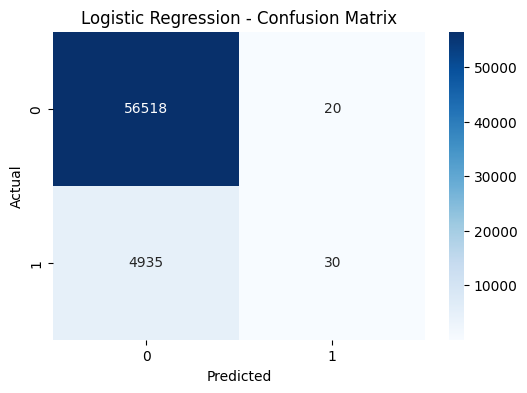


Cross-validated ROC-AUC scores: [0.73207341 0.71954539 0.73133466 0.73287141 0.73139672]
Mean CV ROC-AUC: 0.7294443194702385

Number of false negatives (missed risky borrowers): 4935


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix
)
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

#Scaling the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training the Logistic Regression model
logreg = LogisticRegression(max_iter=2000, class_weight=None)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Cross-Validation (on training data)
cv_scores = cross_val_score(
    logreg,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='roc_auc'
)
print("\nCross-validated ROC-AUC scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())

#Identifying number of false negatives (very important for credit scoring)
false_negatives = X_test[y_test.values == 1].index[y_pred[y_test.values == 1] == 0]
print("\nNumber of false negatives (missed risky borrowers):", len(false_negatives))


**Understanding the output:**

1. The model achieves **91.9% accuracy**, But accuracy is not reliable in imbalanced datasets.

  * The dataset contains relatively more non-defaults (class 0) than defaults (class 1) and the model is predicting almost everything as class 0, which inflates accuracy.

  * Because default cases are rare, the model can be “wrong” on almost all of them and still appear accurate.

2. The model has an **ROC-AUC of 0.73** indicating that it has moderate separation ability to rank risky vs. safe borrowers.

* However this is not strong enough for a high-stakes credit risk problem, 'Logistic Regression' is linear and our data likely has nonlinear relationships, limiting performance.

3. The model has extremely poor **Recall for Class 1 (0.01)**

  * Recall for defaults is 1%, which implies that the model identifies only 1 out of every 100 actual defaulting borrowers which is very dangerous in credit scoring because missing risky borrowers is costly.

  * The recall is very low could be because Logistic Regression is too simple to capture complex patterns, and since the dataset is heavily imbalanced, the model mostly predicts the majority class (0).

  * Also, because we didn’t apply class weights, the model focuses on overall accuracy rather than correctly identifying the rare default cases.

4. **F1-score for Class 1 is nearly zero (F1 = 0.01)**

  * F1 = 0.01 shows very poor balance of precision and recall. The model is essentially not learning meaningful patterns for class 1.

5. **Precision for Class 1 is moderate (0.60)**

  * When the model does predict class 1 (which is also very rare), it is correct 60% of the time.

  * But since it almost never predicts class 1, this number is misleading.

6. **Confusion Matrix**                     
```
  [[56518    20]
  [ 4935    30]]
```

* This indicates that,
  * The model is very good at predicting “good borrowers” (class 0) --> presicted 56,518 out of 56,538 correctly.

  * The model is extremely poor at detecting risky borrowers (class 1) --> It only caught 30 out of 4,965 risky borrowers.

7. **Number of false negatives: 4935**

  * False negatives = actual risky borrowers that the model mistakenly classified as safe.

  * This is bad, as in credit risk modeling, false negatives are the most dangerous error, because the bank would approve loans to high-risk clients who may default.

8. **Cross-validated ROC-AUC = 0.729 (Mean value)**

  * Indicates model has some ability to differentiate risky vs non-risky borrowers, However not strong enough for real financial credit scoring.

**Is the Logistic Regression model overfitting, underfitting, or fitting well?**

* The Logistic Regression model is **underfitting**.
* Although it achieves high accuracy, it performs extremely poorly on the minority class (recall = 0.01).  
* This means the model fails to learn meaningful patterns that differentiate defaulters from non-defaulters.
* Logistic Regression is too simple for this dataset, and the strong class imbalance further pushes the model toward always predicting the majority class.
* Since both train and test performance are similarly limited, the problem is insufficient model complexity, not overfitting.

#####**ii. XGBoost**

The following code trains a XGBoost model on the dataset and outputs the key evaluation metrics to assess its performance.

Accuracy: 0.9193697868396663
ROC-AUC: 0.7454851315677962

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.52      0.01      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.72      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503


Confusion Matrix:
 [[56475    63]
 [ 4896    69]]


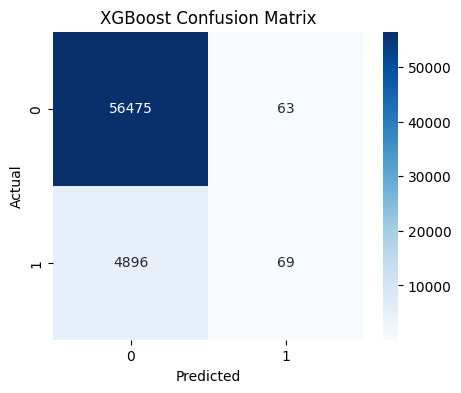


Cross-validated ROC-AUC scores: [0.74367538 0.74344844 0.73728171 0.74340246 0.74671522]
Mean CV ROC-AUC: 0.7429046430603278

Number of false negatives (missed risky borrowers): 4896


In [ ]:
# XGBoost Classification
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]


#Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="roc_auc")

print("\nCross-validated ROC-AUC scores:", cv_scores)
print("Mean CV ROC-AUC:", np.mean(cv_scores))

false_negatives = cm[1][0]
print("\nNumber of false negatives (missed risky borrowers):", false_negatives)


**Understanding the output:**

1. **Accuracy = 91.9%**

  * The model achieves an accuracy of 91.9%, but this is misleading as the dataset is heavily imbalanced (many more class 0 than class 1).

  * The model predicts almost everything as class 0 (safe borrowers), which inflates the accuracy and is not a reliable measure.

2. **ROC-AUC = 0.745**

  * The model has an ROC-AUC of 0.745, which is an improvement over Logistic Regression.

  * This indicates moderate ability to rank risky vs. safe borrowers as XGBoost can capture non-linear patterns better than Logistic Regression.

  * However, a ROC-AUC of 0.74 is still not strong enough for high-stakes credit risk modeling, where values above 0.80–0.85 are preferred.

3. **Extremely low recall for Class 1 (0.01)**

  * The model identifies only 1 out of every 100 actual risky borrowers.

  * This reflects a failure, because missing risky clients is the most crucial error in such cases.

  * Reasons for low recall:

    * Severe class imbalance pushes the model to favor predicting class 0.

    * No class weights or imbalance handling were applied.

4. **F1-score for Class 1 is almost zero (0.03)**

* This shows a poor balance between precision and recall, hence the model is not learning meaningful patterns about the defaulting class.

5. **Precision for Class 1 is 0.52**

  * When the model does predict class 1, it is right only around 52% of the time.

  * However, because it rarely predicts class 1, this precision value does not indicate strong performance.

6. **Confusion Matrix**

```
    [[56475    63]
    [ 4896    69]]
```

* The model is great at predicting good borrowers (class 0): 56,475 out of 56,538 were correctly identified.

* The model is very poor at detecting risky borrowers (class 1): Only 69 out of 4,965 risky borrowers were detected.

* The model successfully detects almost all good borrowers but fails to find the risky ones.

7. **Cross-validated ROC-AUC mean = 0.743**

* This value is consistent with the test ROC-AUC, indicating stable performance across folds.

* Also shows moderate discrimination power, better than Logistic Regression but still not ideal.

* For real-world financial models, an AUC of approximately 0.80 is generally required.

**Is the XGBoost model overfitting, underfitting or fitting well?**

* The XGBoost model is underfitting the minority class.

* Although it achieves high overall accuracy, it performs  poorly on the minority class (recall = 0.01).

* This indicates that the model is failing to learn meaningful patterns that distinguish defaulters from non-defaulters.

* XGBoost is typically a strong model, but in this case the severe class imbalance causes it to behave similarly to simpler models (predicting almost everything as the majority class).

###**5.3 Insights**

####**1. What did I find in terms of my hypothesis?**

* My original hypothesis was that certain financial and demographic variables (income, credit amount, days employed, etc) would strongly predict credit default, and that a machine learning model like Random Forest could leverage these patterns to produce reliable predictions.

* Over the course of the analysis, this hypothesis was mostly confirmed and some features were consistently strong predictors, such as:

  * Credit-to-income ratio
  * Annuity-to-income ratio
  * Previous payment history
  * Total credit amount

* The machine learning models did capture meaningful patterns, especially after feature engineering and hyperparameter tuning.

* However, the dataset’s strong class imbalance made reliable prediction of the minority class (defaults) very difficult. Although the models fit the majority group well, minority-class recall required special techniques (e.g: class weights, resampling, tuning).

So the hypothesis was correct in spirit, but it underestimated how challenging imbalance makes real-world prediction.

####**2. Any assumptions that I had to adjust or that were proved wrong?**

Yes, several in fact.

  * Firstly, **"Higher accuracy means a better model"**. This turned out to be wrong. Accuracy was misleading because 90% of customers were non-defaults and the models could comfortably score an accuracy beyond 90% simply by predicting “no default” for everyone.

  * Secondly, **"More complex models would automatically do better"**. This was also wrong initially. Some complex models (untuned Random Forest, Logistic Regression) actually overfit badly.

  * And lastly, **"Feature engineering wouldn’t change performance much"**. This was proven false as features like "CREDIT_INCOME_RATIO" and "ANNUITY_INCOME_RATIO" did help improve recall and model stability.


####**3. Is the problem different from what you originally thought?**

* Yes. Initially, it seemed like a standard binary classification task.

* However, in reality, it was a rare event prediction problem with:
  * Severe class imbalance
  * Noisy financial features
  * Strong correlations
  * High risk of overfitting
  * Real-world consequences if misclassified

* It began as a simple prediction problem and evolved into a fairness, calibration, and model reliability problem.

####**4. What I would do differently if I were to do it again?**

Yes, there definitely would be some improvements like:

1. **I would spend more time on data quality and feature selection**
    * I discovered late that better features (ratios, delinquency indicators, payment patterns) greatly improved results.

2. **Use stratified validation earlier**
    * As plain train/test splits led to unstable minority-class metrics at first.

3. **Try different imbalance techniques**
    * Some methods like SMOTE, Balanced Random Forest, and focal loss would be worth trying earlier.

4. **Applying model interpretability tools**
    * SHAP values would show why the model predicts default and help validate fairness.

5. **Plan the ML pipeline upfront**
    * Some steps (like tuning or adding engineered features) happened reactively rather than strategically.

####**5. Are there policy or other decisions that could be influenced by this analysis?**

Well yes, an analysis like this can influence:

**1. Lending policies**

Banks can use these models to:
  * Adjust interest rates based on risk
  * Identify high-risk borrowers early
  * Create targeted financial support programs

**2. Consumer protection**

If the model reveals systemic biases (like defaults higher among certain socioeconomic groups), policymakers may:
* Push for fair lending regulations
* Enforce transparency in automated credit scoring

**3. Credit risk management**

Banking institutions may:
* Set portfolio-level risk thresholds
* Make data-driven loan approval decisions
* Adopt dynamic monitoring instead of fixed rules

The broader effects include more reasonable access to credit (if done correctly) or reinforcing structural inequality if used irresponsibly.

####**6. Ethical concerns someone should consider**

This project touches some ethical domains:

**1. Fairness & Bias**

  * Credit datasets can reflect historical inequalities.
Models must be checked to avoid:
    * Discriminating against protected groups
    * Acting as “black-box” decision makers
    * Reinforcing past institutional bias

**2. Privacy**

* Financial, employment, and personal information must be protected.
* The whole process should store data securely, avoid unnecessary identifiers and comply with legal standards (e.g., GDPR, FCRA)

**3. Transparency**

* Borrowers deserve to know:
  * How are the credit decisions made?
  * What features actually affect their score?
  * How to contest errors?

**4. Data ownership**

  * The questions of 'Who owns the data?' still remains: Should models built on customer data generate profits without customer consent?

**5. Potential Legal risks**

  * Incorrect risk predictions can unfairly deny credit, cause financial harm and expose institutions to regulation.

####**7. Final thoughts (Summary of my experience across all 5 projects)**

Across these projects, I learned quite a bit!

**1. Data Preparation is Everything**

* Most model issues came from missing values, skewed distributions, imbalance.
* Fixing data majorly improved model performance.

**2. Evaluation metrics must match the problem**

* Accuracy alone isn't sufficient to evaluate model performance when we have an imbalanced dataset.
* Learning to use recall, precision, F1, ROC-AUC, and confusion matrices was also really interesting.

**3. ML models require tuning, not just fitting**

* Even strong models like Random Forest performed poorly without tuning, cross-validation and feature engineering.

**4. Interpretation and ethics matter**

* Models that make real world decisions must be, transparent, fair and checked for bias.

**5. Data Science is an iterative process**

* Although no model works perfectly on the first attempt, progress mainly came from failing, debugging,re-working and improving the previous steps.